In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

new_dataset=[]

def sp(n_doping_conc, i_doping_conc, p_doping_conc): #Removed n_thickness in the arguments.
    #for loop to that can iterate 5 times and call our function. Multiplying the parameters by the for loop index i. 
    global new_dataset #To be accesses outside of the function
    # But 1st we must call the function atleast once
    nt=[]
    it=[]
    pt=[]
    n_mean=200
    n_SD=50
    i_mean=10
    i_SD=5
    p_mean=200
    p_SD=50
    count=0
    for i in range(1,2001):
        count=count+1 # To keep a track on the number of simulations. 
        print('count= %s'%(count))
        n_thickness=round(np.random.uniform(n_mean-n_SD,n_mean+n_SD+1),3)# Uniform Distribution # using round function to include random decimal points when 3 numbers after decimal point.
        if n_thickness<0:
            n_thickness=50
        else: 
            n_thickness=n_thickness
            
        i_thickness=round(np.random.uniform(i_mean-i_SD,i_mean+i_SD+1),3)
        if i_thickness<0:
            i_thickness=2
        else: 
            i_thickness=i_thickness
            
        p_thickness=round(np.random.uniform(p_mean-p_SD,p_mean+p_SD+1),3)
        if p_thickness<0:
            p_thickness=50
        else: 
            p_thickness=p_thickness
        
        
        
        # Randomize for all thwe layers
        # Set the if condition 
        # Create the dataframe using the pandas
        # Application of neural networks
        
        
        
        folder_path='/home/012431692/sFolder/'
        
        n_thick=n_thickness
        i_thick=i_thickness
        p_thick=p_thickness
        n_dop_conc=n_doping_conc
        i_dop_conc=i_doping_conc
        p_dop_conc=p_doping_conc
        #Just for the file names
        n=int(n_thick*1000) 
        i=int(i_thick*1000)
        p=int(p_thick*1000)
         
        x=open(folder_path+'sp_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'w') #To create different files for different inputs.
        x.write('set n_thickness %s'%(n_thick))
        x.write('\n')
        x.write('set i_thickness %s'%(i_thick))
        x.write('\n')
        x.write('set p_thickness %s'%(p_thick))
        x.write('\n')
        x.write('set n_doping_conc %s'%(n_dop_conc))
        x.write('\n')
        x.write('set i_doping_conc %s'%(i_dop_conc))
        x.write('\n')
        x.write('set p_doping_conc %s'%(p_dop_conc))
        x.write('\n')
        x.write('line x location= [expr 0-%s-%s]<nm> spacing= 1<nm> spacing.method=regular'%(i_thick,p_thick))
        x.write('\n')
        x.write('line x location= 0<nm> spacing.method=regular  spacing= 1<nm> tag=SiTop')
        x.write('\n')
        x.write('line x location= %s<nm> spacing= 1<nm> spacing.method=regular  tag= SiBottom'%(n_thick))
        x.write('\n')
        x.write('region Silicon xlo= SiTop xhi= SiBottom')
        x.write('\n')
        x.write('init concentration= %s<cm-3> field= Arsenic'%(n_dop_conc))
        x.write('\n')
        x.write('deposit thickness= %s<nm> Silicon fields.values= "Boron= %s<cm-3>"'%(i_thick,i_dop_conc))
        x.write('\n')
        x.write('deposit thickness= %s<nm> Silicon fields.values= "Boron= %s<cm-3>"'%(p_thick,p_dop_conc))
        x.write('\n')
        x.write('diffuse temperature= 500<C> time=1.0e-6<min>')
        x.write('\n')
        x.write('refinebox clear')
        x.write('\n')
        x.write('refinebox !keep.lines')
        x.write('\n')
        x.write('line clear')
        x.write('\n')
        x.write('refinebox min= -%s max= (%s+%s) xrefine= {0.002 0.002 0.002}'%(n_thick, i_thick, p_thick))
        x.write('\n')
        x.write('grid remesh')
        x.write('\n')
        x.write('contact bottom name= cathode')
        x.write('\n')
        x.write('contact box Silicon xlo= [expr -%s -%s - 1]<nm> xhi= [expr -%s -%s]<nm> name= Anode'%(i_thick,p_thick,i_thick,p_thick))
        x.write('\n')
        x.write('struct smesh= %sdevice_%s_%s_%s_%s_%s_%s'%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc)) #Name given to the device according to the given input.
        x.close()
        y=open('/home/012431692/sFolder/sp_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'r') #To open the closed file.
        z=subprocess.call('sprocess -n /home/012431692/sFolder/sp_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc), shell=True) #Saving the sprocess output in a variable 'z'.

        if z==0:
            
            # Device Simulation
            ds=open(folder_path+'ds_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'w')
            ds.write('File {')
            ds.write('\n')
            ds.write('* Input Files')
            ds.write('\n')
            ds.write('Grid      = "%sdevice_%s_%s_%s_%s_%s_%s_fps.tdr"'%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
            ds.write('\n')
            ds.write('* Output Files')
            ds.write('\n')
            ds.write('Current = "%snmos_%s_%s_%s_%s_%s_%s"'%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
            ds.write('\n')
            ds.write('Plot    = "%snmos_%s_%s_%s_%s_%s_%s"'%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
            ds.write('\n')
            ds.write('Output  = "%snmos_%s_%s_%s_%s_%s_%s"'%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
            ds.write('\n')
            ds.write('}')
            ds.write('\n')
            ds.write('Electrode {')
            ds.write('\n')
            ds.write('{ Name="cathode"        Voltage=0.0 }')
            ds.write('\n')
            ds.write('{ Name="Anode"          Voltage=0.0 }')
            ds.write('\n')
            ds.write('}')
            ds.write('\n')
            ds.write('Physics {')
            ds.write('\n')
            ds.write('Fermi')
            ds.write('\n')
            ds.write('EffectiveIntrinsicDensity( OldSlotboom )  ')
            ds.write('\n')
            ds.write('Mobility(')
            ds.write('\n')
            ds.write('DopingDep')
            ds.write('\n')
            ds.write('eHighFieldsaturation( GradQuasiFermi )')
            ds.write('\n')
            ds.write('hHighFieldsaturation( GradQuasiFermi )')
            ds.write('\n')
            ds.write(')')
            ds.write('\n')
            ds.write('Recombination(')
            ds.write('\n')
            ds.write('SRH( DopingDep TempDependence )')
            ds.write('\n')
            ds.write('Band2Band(model = NonlocalPath)')
            ds.write('\n')
            ds.write(')')
            ds.write('\n')
            ds.write('DefaultParametersFromFile')
            ds.write('\n')
            ds.write('}')
            ds.write('\n')
            ds.write('Plot {')
            ds.write('\n')
            ds.write('eDensity hDensity eCurrent hCurrent dopingConcentration')
            ds.write('\n')
            ds.write('}')
            ds.write('\n')
            ds.write('Math {')
            ds.write('\n')
            ds.write('*-- Parallelization on multi-CPU machine --*')
            ds.write('\n')
            ds.write('exitonfailure ')
            ds.write('\n')
            ds.write('Number_Of_Threads=1   * change the number of threads to > 1 to make ')
            ds.write('\n')
            ds.write(' * parallelization possible. First ensure your machine ')
            ds.write('\n')
            ds.write('* has shared-memory multi-CPU configuration.')
            ds.write('\n')
            ds.write('*-- Numeric/Solver Controls --*')
            ds.write('\n')
            ds.write('Extrapolate           * switches on solution extrapolation along a bias ramp')
            ds.write('\n')
            ds.write('extendedprecision')
            ds.write('\n')
            ds.write('Derivatives           * considers mobility derivatives in Jacobian')
            ds.write('\n')
            ds.write('Iterations=15          * maximum-allowed number of Newton iterations (3D)')
            ds.write('\n')
            ds.write('RelErrControl         * switches on the relative error control for solution')
            ds.write('\n')
            ds.write('* variables (on by default)')
            ds.write('\n')
            ds.write('Digits=5              * relative error control value. Iterations stop if ')
            ds.write('\n')
            ds.write('* dx/x < 10^(-Digits)')
            ds.write('\n')
            ds.write('Method=Super            * use the iterative linear solver with default parameter ')
            ds.write('\n')
            ds.write('NotDamped=100         * number of Newton iterations over which the RHS-norm ')
            ds.write('\n')
            ds.write('* is allowed to increase')
            ds.write('\n')
            ds.write('Transient=BE          * switches on BE transient method')
            ds.write('\n')
            ds.write('}')
            ds.write('\n')
            ds.write('Solve {')
            ds.write('\n')
            ds.write('*- Buildup of initial solution:') 
            ds.write('\n')
            ds.write('NewCurrentFilePrefix="junk"')
            ds.write('\n')
            ds.write('Coupled(Iterations=100){ Poisson }') 
            ds.write('\n')
            ds.write('Coupled{ Poisson Electron Hole }')
            ds.write('\n')
            ds.write('*- Bias drain to target bias')
            ds.write('\n')
            ds.write('Quasistationary(') 
            ds.write('\n')
            ds.write('InitialStep=0.01 MinStep=1e-7 MaxStep=0.2')
            ds.write('\n')
            ds.write('Goal{ Name="Anode" Voltage= -2 }') 
            ds.write('\n')
            ds.write('){ Coupled{ Poisson Electron Hole }}') #Anode Ramping
            ds.write('\n')
            ds.write('*- Gate voltage sweep')
            ds.write('\n')
            ds.write('NewCurrentFilePrefix=""')
            ds.write('\n')
            ds.write('Quasistationary(') 
            ds.write('\n')
            ds.write('InitialStep=1e-3 MinStep=1e-7 MaxStep=0.05 Increment=1.41 Decrement=2.')
            ds.write('\n')
            ds.write('Goal{ Name="Anode" Voltage= 2 }') 
            ds.write('\n')
            ds.write('){ Coupled{ Poisson Electron Hole }CurrentPlot(Time=(Range=(0,1)Intervals=101))}')
            ds.write('\n')
            ds.write('}') 
            ds.close()
            ds_x=open('/home/012431692/sFolder/ds_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'r')
            q=subprocess.call('sdevice /home/012431692/sFolder/ds_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc), shell=True)
            print(q)
            if q==0:
                

                # svisual code script
                # csv automation

                sv=open('/home/012431692/sFolder/plt_Folder/svisual_script_%s_%s_%s_%s_%s_%s.tcl'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'w')


                sv.write('load_file /home/012431692/sFolder/nmos_%s_%s_%s_%s_%s_%s_des.plt'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                sv.write('\n')
                sv.write('create_plot -1d')
                sv.write('\n')
                sv.write('select_plots {Plot_1}')
                sv.write('\n')
                sv.write('#-> Plot_1')
                sv.write('\n')
                sv.write('#-> Plot_1')
                sv.write('\n')
                sv.write('#-> nmos_%s_%s_%s_%s_%s_%s_des.plt'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                sv.write('\n')
                sv.write('create_curve -plot Plot_1 -dataset {nmos_%s_%s_%s_%s_%s_%s_des} -axisX {Anode InnerVoltage} -axisY {Anode TotalCurrent}'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                sv.write('\n')
                sv.write('#-> Curve_1')
                sv.write('\n')
                sv.write('set_axis_prop -plot Plot_1 -axis y -type log')
                sv.write('\n')
                sv.write('export_curves {Curve_1} -plot Plot_1 -filename /home/012431692/sFolder/csv_data_files/data_%s_%s_%s_%s_%s_%s.csv -format csv -overwrite'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                sv.close()
                
                sv_x=open('/home/012431692/sFolder/plt_Folder/svisual_script_%s_%s_%s_%s_%s_%s.tcl'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc),'r')
                subprocess.call('svisual -b -s /home/012431692/sFolder/plt_Folder/svisual_script_%s_%s_%s_%s_%s_%s.tcl'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc), shell=True)
                
                
                import pandas as pd
               
                data=pd.read_csv('/home/012431692/sFolder/csv_data_files/data_%s_%s_%s_%s_%s_%s.csv'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                data=data.transpose()
                data=data.drop(['Anode TotalCurrent(nmos_%s_%s_%s_%s_%s_%s_des) X'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc)],axis=0)
                new_dataset.append(data) #Apppendind the generated data to the dataset list after every cycle
                
                
                nt.append((n_thick))# Appending the n_thick values to the nt list 
                it.append((i_thick))
                pt.append((p_thick))
            else:
                # Removing the files with failures
                import os
                os.remove('/home/012431692/sFolder/sp_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                os.remove(folder_path+'ds_file_%s_%s_%s_%s_%s_%s.cmd'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                os.remove("%sdevice_%s_%s_%s_%s_%s_%s_fps.tdr"%(folder_path,n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
                os.remove('/home/012431692/sFolder/nmos_%s_%s_%s_%s_%s_%s_des.plt'%(n,i,p, n_dop_conc, i_dop_conc, p_dop_conc))
    #nt=np.array(nt).astype(np.float)
    #it=np.array(it).astype(np.float)
    #pt=np.array(pt).astype(np.float)
                
    print('n_thickness values are:%s '%(nt))
    print('i_thickness values are:%s '%(it))
    print('p_thickness values are:%s '%(pt)) 
    
    new_dataset=pd.concat(dataset)
    new_dataset=new_dataset.assign(n_thickness=nt)
    new_dataset=new_dataset.assign(i_thickness=it)
    new_dataset=new_dataset.assign(p_thickness=pt)
    new_dataset.to_csv('new_dataset.csv', index=False) #Saving the dataset variable as a csv file
    ## (1)return dataset  
    




In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure # To get larger images
dataset=pd.read_csv('dataset.csv')
dataset=dataset.drop(dataset.index[347], axis=0) #Removing the row 347 as it is acting like an outlier
# Data for only -2 voltage
s1=dataset.iloc[:,0]
# Data for (-2,-1) voltages
s2=dataset.iloc[:,0:26]
# Data for (-1,0) voltages
s3=dataset.iloc[:,25:52]
# Data for (-2,0) voltages
s4=dataset.iloc[:,0:52]
# Data for (0,1) voltages
s5= dataset.iloc[:,51:77]
# Data for (1,2) voltages
s6= dataset.iloc[:,76:102]
# Data for (0,2) voltages
s7=dataset.iloc[:,51:102]
# Data for (-2,2)
s8=dataset.iloc[:,0:102]
# Only thicknesses columns
thickness_col=dataset.iloc[:,102:105]

# Traininig of first 1000 datapoints

In [63]:
#There are total of 1853 datapoints
#Training first 1000 datapoints 
data1000=dataset.head(1000)
data1000_x=np.log(abs(data1000.iloc[:,0:102]))
data1000_y=data1000.iloc[:,103]

#Rest 853 datapoints are used for testing
data853=dataset.tail(300)
data853_x=np.log(abs(data853.iloc[:,0:102]))
data853_y=data853.iloc[:,103]




R2 score on train set= 0.99
MSE on train set= 0.06
R2 score = 0.99
MSE = 0.05


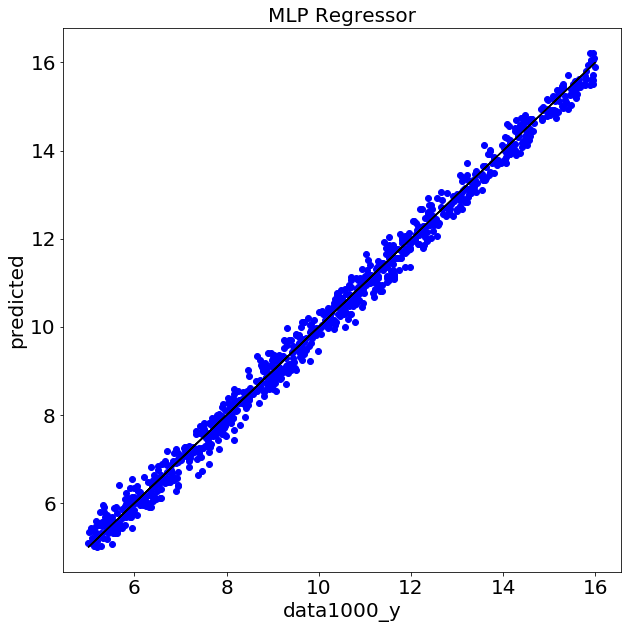

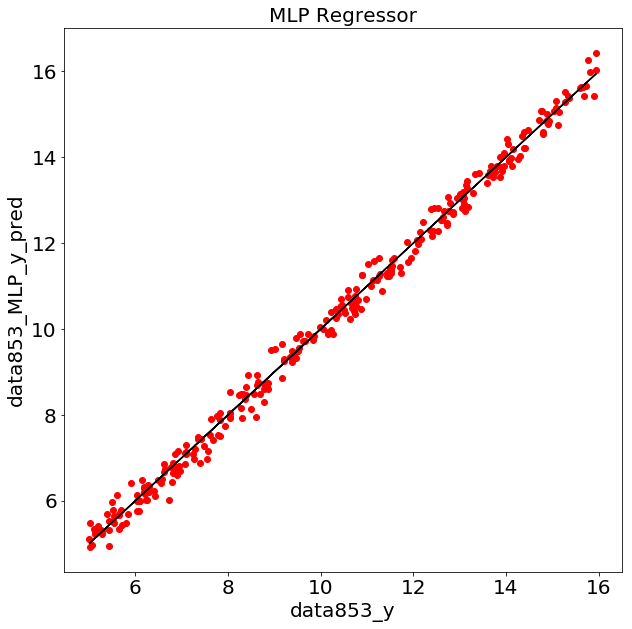

In [64]:
#Training with MLPRegressor


from sklearn.neural_network import MLPRegressor
data1000_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
data1000_MLP_regressor.fit(data1000_x,data1000_y)
# Predicting output for x_test 
data853_MLP_y_pred = data1000_MLP_regressor.predict(data853_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data1000_y, data1000_MLP_regressor.predict(data1000_x)))
print('MSE on train set= %.2f' %mean_squared_error(data1000_y, data1000_MLP_regressor.predict(data1000_x)))
print('R2 score = %.2f' %r2_score(data853_y, data853_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(data853_y, data853_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data1000_y',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(data1000_y,data1000_MLP_regressor.predict(data1000_x), color='b')
plt.plot(data1000_y,data1000_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data853_y',fontsize=20)
plt.ylabel('data853_MLP_y_pred',fontsize=20)
plt.scatter(data853_y,data1000_MLP_regressor.predict(data853_x), color='r')
plt.plot(data853_y,data853_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.03
R2 score on test set= 1.00
MSE on test set= 0.04


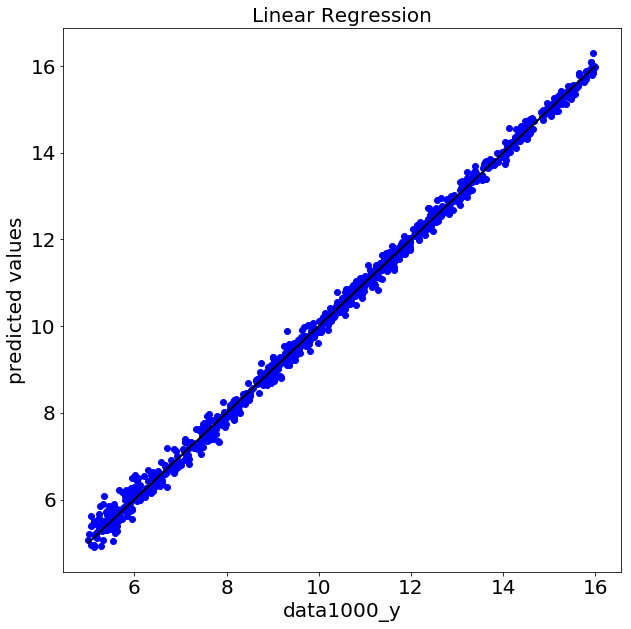

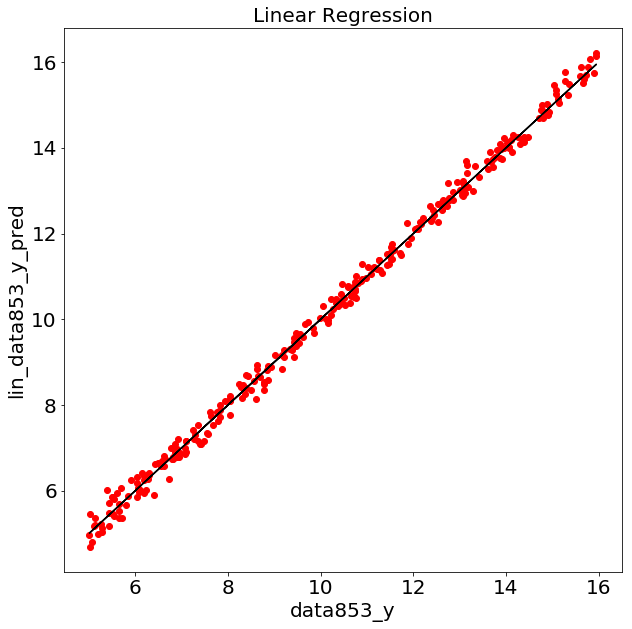

In [65]:
# Linear Regression on first 1000 datapoints

from sklearn.linear_model import LinearRegression
data1000_lin_regressor=LinearRegression()
data1000_lin_regressor.fit(data1000_x,data1000_y)
#Predicting y_test
lin_data853_y_pred=data1000_lin_regressor.predict(data853_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data1000_y, data1000_lin_regressor.predict(data1000_x)))
print('MSE on train set= %.2f' %mean_squared_error(data1000_y, data1000_lin_regressor.predict(data1000_x)))
print('R2 score on test set= %.2f' %r2_score(data853_y, lin_data853_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(data853_y, lin_data853_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data1000_y', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(data1000_y,data1000_lin_regressor.predict(data1000_x), color='b')
plt.plot(data1000_y,data1000_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data853_y',fontsize=20)
plt.ylabel('lin_data853_y_pred',fontsize=20)
plt.scatter(data853_y,lin_data853_y_pred, color='r')
plt.plot(data853_y,data853_y,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


# Training with first 500 datapoints

In [66]:
#Training first 500 datapoints 
data500=dataset.head(500)
data500_x=np.log(abs(data500.iloc[:,0:102]))
data500_y=data500.iloc[:,103]

#Rest 853 datapoints are used for testing
data1353=dataset.tail(300)
data1353_x=np.log(abs(data1353.iloc[:,0:102]))
data1353_y=data1353.iloc[:,103]


R2 score on train set= 0.99
MSE on train set= 0.06
R2 score = 0.99
MSE = 0.06


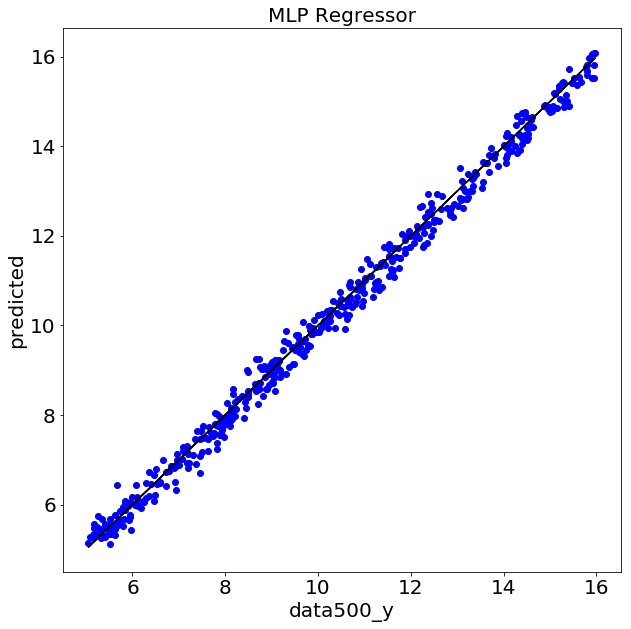

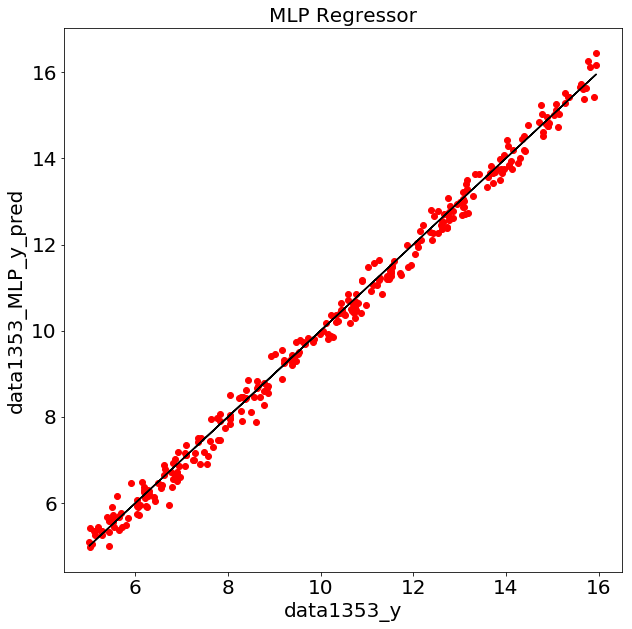

In [67]:

#Training with MLPRegressor


from sklearn.neural_network import MLPRegressor
data500_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
data500_MLP_regressor.fit(data500_x,data500_y)
# Predicting output for x_test 
data1353_MLP_y_pred = data500_MLP_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data500_y, data500_MLP_regressor.predict(data500_x)))
print('MSE on train set= %.2f' %mean_squared_error(data500_y, data500_MLP_regressor.predict(data500_x)))
print('R2 score = %.2f' %r2_score(data1353_y, data1353_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(data1353_y, data1353_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data500_y',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(data500_y,data500_MLP_regressor.predict(data500_x), color='b')
plt.plot(data500_y,data500_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('data1353_MLP_y_pred',fontsize=20)
plt.scatter(data1353_y,data500_MLP_regressor.predict(data1353_x), color='r')
plt.plot(data1353_y,data1353_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.02
R2 score on test set= 0.99
MSE on test set= 0.06


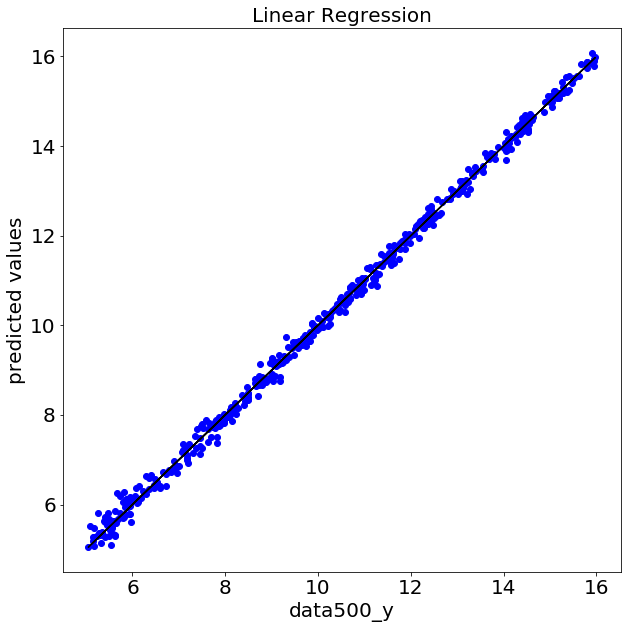

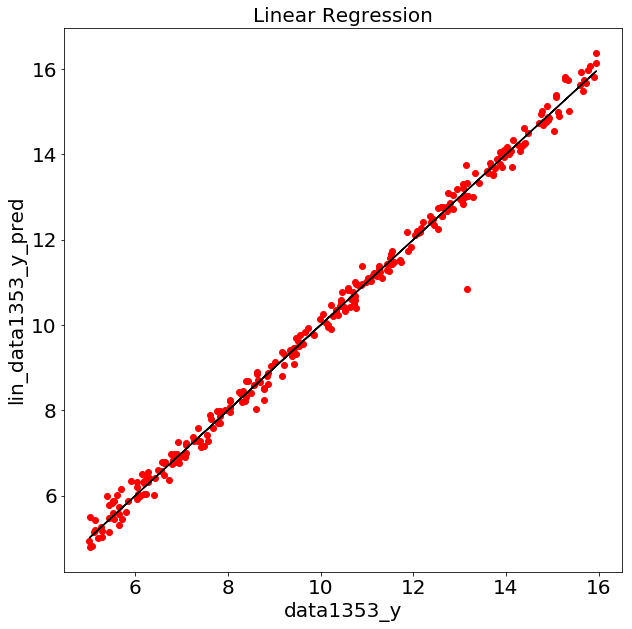

In [68]:
# Linear Regression on first 500 datapoints

from sklearn.linear_model import LinearRegression
data500_lin_regressor=LinearRegression()
data500_lin_regressor.fit(data500_x,data500_y)
#Predicting y_test
lin_data1353_y_pred=data500_lin_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data500_y, data500_lin_regressor.predict(data500_x)))
print('MSE on train set= %.2f' %mean_squared_error(data500_y, data500_lin_regressor.predict(data500_x)))
print('R2 score on test set= %.2f' %r2_score(data1353_y, lin_data1353_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(data1353_y, lin_data1353_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data500_y', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(data500_y,data500_lin_regressor.predict(data500_x), color='b')
plt.plot(data500_y,data500_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('lin_data1353_y_pred',fontsize=20)
plt.scatter(data1353_y,lin_data1353_y_pred, color='r')
plt.plot(data1353_y,data1353_y,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training using first 100 datapoints

In [88]:
#Training first 100 datapoints 
data100=dataset.head(100)
data100_x=np.log(abs(data100.iloc[:,0:102]))
data100_y=data100.iloc[:,103]

#Rest 853 datapoints are used for testing
data1353=dataset.tail(300)
data1353_x=np.log(abs(data1353.iloc[:,0:102]))
data1353_y=data1353.iloc[:,103]

R2 score on train set= 0.99
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.06


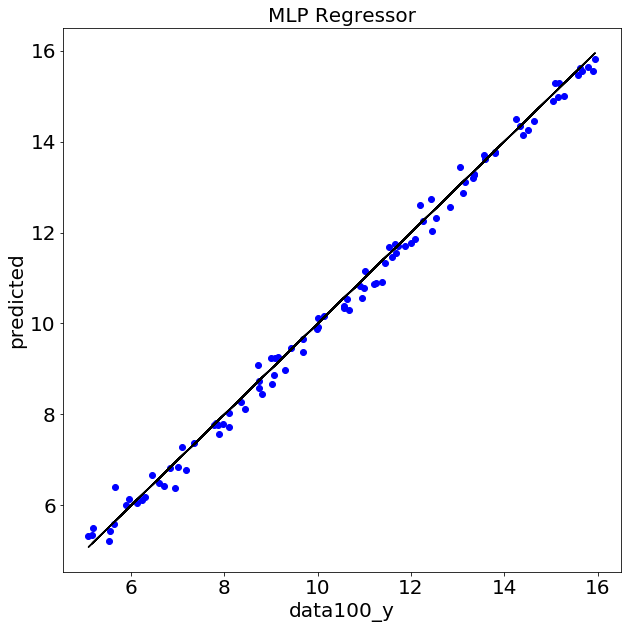

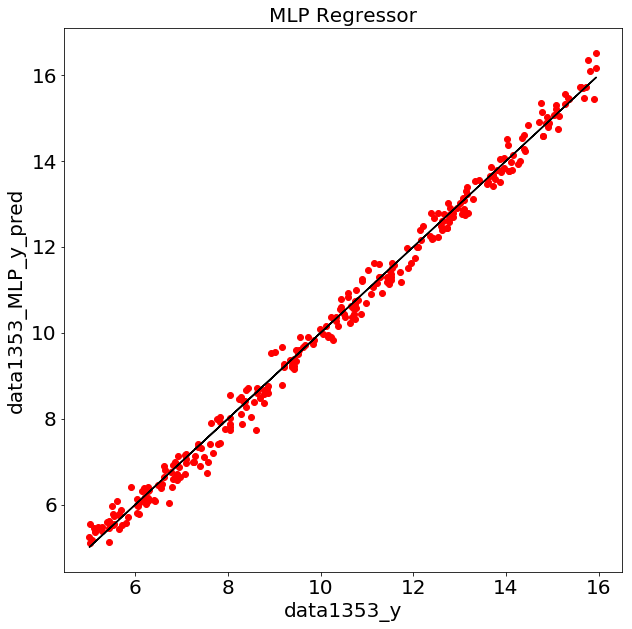

In [89]:
#Training with MLPRegressor

from sklearn.neural_network import MLPRegressor
data100_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
data100_MLP_regressor.fit(data100_x,data100_y)
# Predicting output for x_test 
data1353_MLP_y_pred = data500_MLP_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data100_y, data100_MLP_regressor.predict(data100_x)))
print('MSE on train set= %.2f' %mean_squared_error(data100_y, data100_MLP_regressor.predict(data100_x)))
print('R2 score = %.2f' %r2_score(data1353_y, data1353_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(data1353_y, data1353_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data100_y',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(data100_y,data100_MLP_regressor.predict(data100_x), color='b')
plt.plot(data100_y,data100_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('data1353_MLP_y_pred',fontsize=20)
plt.scatter(data1353_y,data100_MLP_regressor.predict(data1353_x), color='r')
plt.plot(data1353_y,data1353_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


R2 score on train set= 1.00
MSE on train set= 0.00
R2 score on test set= 0.79
MSE on test set= 2.07


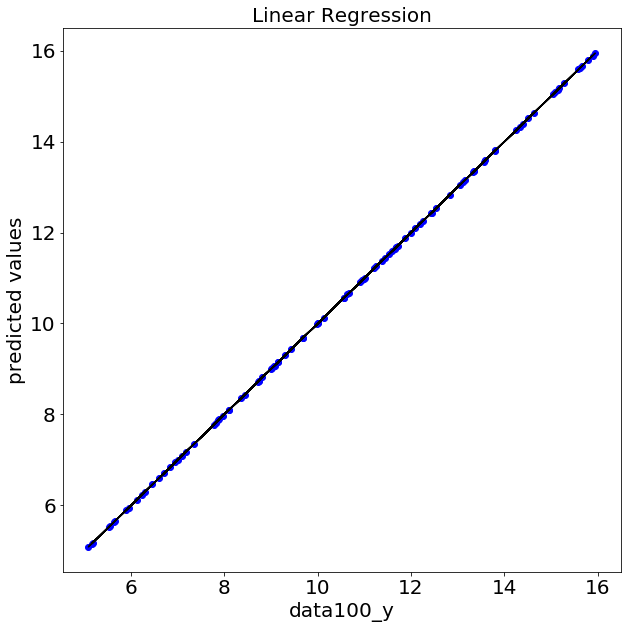

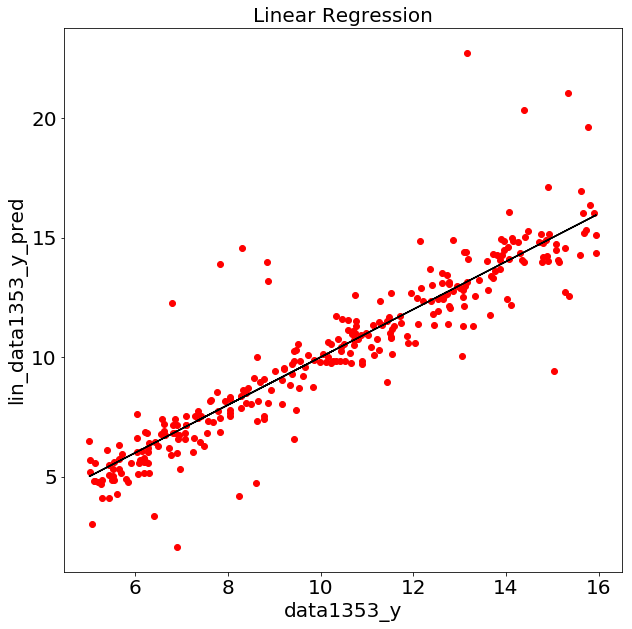

In [90]:
# Linear Regression on first 100 datapoints

from sklearn.linear_model import LinearRegression
data100_lin_regressor=LinearRegression()
data100_lin_regressor.fit(data100_x,data100_y)
#Predicting y_test
lin_data1353_y_pred=data100_lin_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data100_y, data100_lin_regressor.predict(data100_x)))
print('MSE on train set= %.2f' %mean_squared_error(data100_y, data100_lin_regressor.predict(data100_x)))
print('R2 score on test set= %.2f' %r2_score(data1353_y, lin_data1353_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(data1353_y, lin_data1353_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data100_y', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(data100_y,data100_lin_regressor.predict(data100_x), color='b')
plt.plot(data100_y,data100_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('lin_data1353_y_pred',fontsize=20)
plt.scatter(data1353_y,lin_data1353_y_pred, color='r')
plt.plot(data1353_y,data1353_y,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training using first 200 datapoints

In [82]:

#Training first 200 datapoints 
data200=dataset.head(200)
data200_x=np.log(abs(data200.iloc[:,0:102]))
data200_y=data200.iloc[:,103]

#Rest 853 datapoints are used for testing
data1353=dataset.tail(300)
data1353_x=np.log(abs(data1353.iloc[:,0:102]))
data1353_y=data1353.iloc[:,103]

R2 score on train set= 0.99
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.06


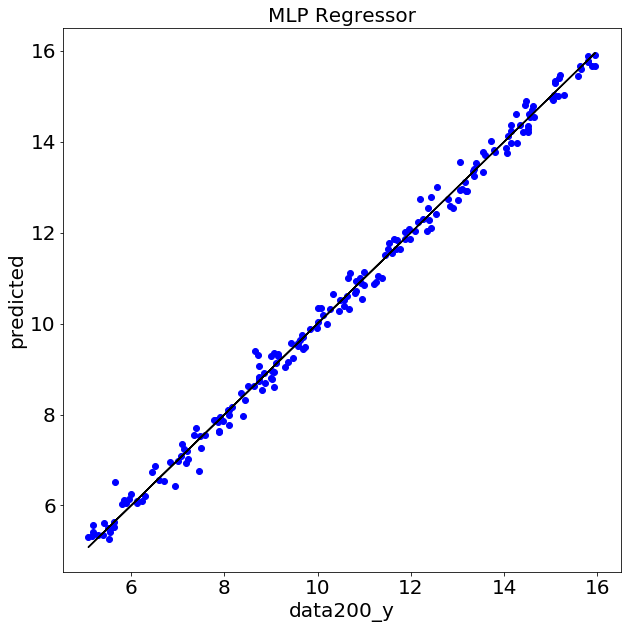

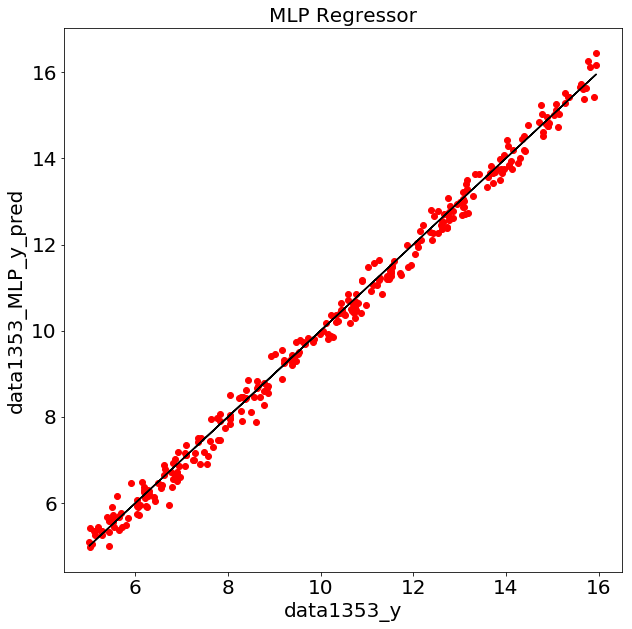

In [83]:


#Training with MLPRegressor
from sklearn.neural_network import MLPRegressor
data200_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
data200_MLP_regressor.fit(data200_x,data200_y)
# Predicting output for x_test 
data1353_MLP_y_pred = data200_MLP_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data200_y, data200_MLP_regressor.predict(data200_x)))
print('MSE on train set= %.2f' %mean_squared_error(data200_y, data200_MLP_regressor.predict(data200_x)))
print('R2 score = %.2f' %r2_score(data1353_y, data1353_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(data1353_y, data1353_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data200_y',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(data200_y,data200_MLP_regressor.predict(data200_x), color='b')
plt.plot(data200_y,data200_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('data1353_MLP_y_pred',fontsize=20)
plt.scatter(data1353_y,data500_MLP_regressor.predict(data1353_x), color='r')
plt.plot(data1353_y,data1353_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score on test set= 0.99
MSE on test set= 0.08


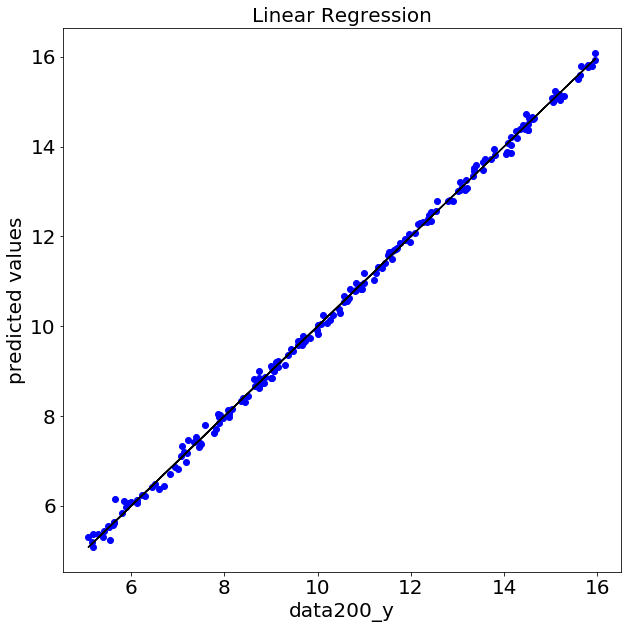

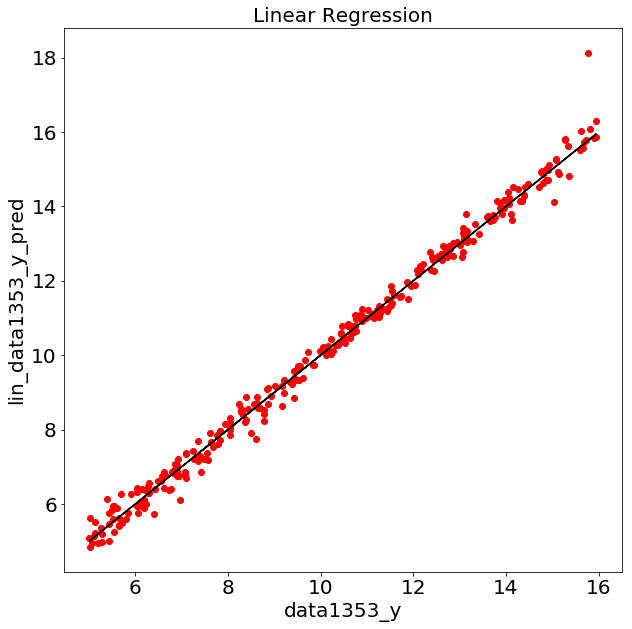

In [84]:
# Linear Regression on first 200 datapoints

from sklearn.linear_model import LinearRegression
data200_lin_regressor=LinearRegression()
data200_lin_regressor.fit(data200_x,data200_y)
#Predicting y_test
lin_data1353_y_pred=data200_lin_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data200_y, data200_lin_regressor.predict(data200_x)))
print('MSE on train set= %.2f' %mean_squared_error(data200_y, data200_lin_regressor.predict(data200_x)))
print('R2 score on test set= %.2f' %r2_score(data1353_y, lin_data1353_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(data1353_y, lin_data1353_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data200_y', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(data200_y,data200_lin_regressor.predict(data200_x), color='b')
plt.plot(data200_y,data200_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('lin_data1353_y_pred',fontsize=20)
plt.scatter(data1353_y,lin_data1353_y_pred, color='r')
plt.plot(data1353_y,data1353_y,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# TRaining with first 50 data points

In [85]:
#Training first 50 datapoints 
data50=dataset.head(50)
data50_x=np.log(abs(data50.iloc[:,0:102]))
data50_y=data50.iloc[:,103]

#Rest 853 datapoints are used for testing
data1353=dataset.tail(300)
data1353_x=np.log(abs(data1353.iloc[:,0:102]))
data1353_y=data1353.iloc[:,103]


R2 score on train set= 0.99
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.08


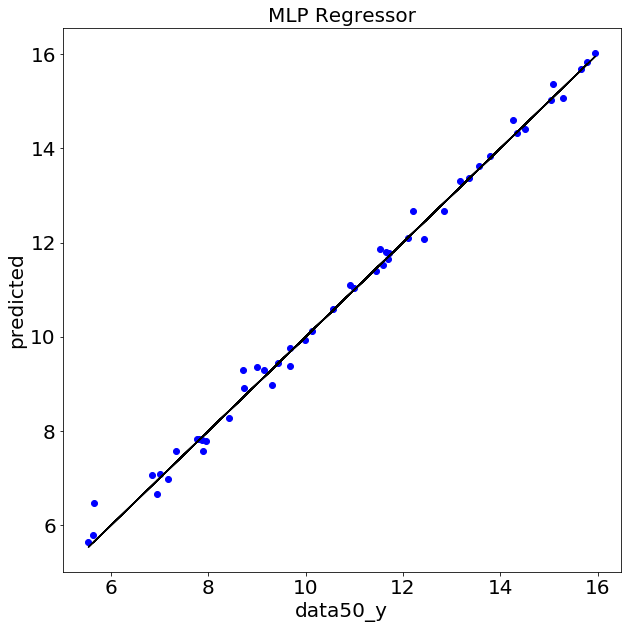

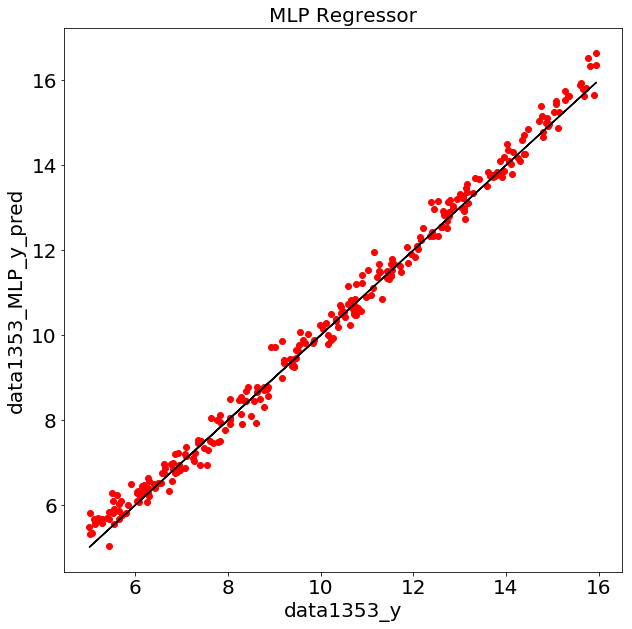

In [86]:
#Training with MLPRegressor
from sklearn.neural_network import MLPRegressor
data50_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
data50_MLP_regressor.fit(data50_x,data50_y)
# Predicting output for x_test 
data1353_MLP_y_pred = data50_MLP_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data50_y, data50_MLP_regressor.predict(data50_x)))
print('MSE on train set= %.2f' %mean_squared_error(data50_y, data50_MLP_regressor.predict(data50_x)))
print('R2 score = %.2f' %r2_score(data1353_y, data1353_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(data1353_y, data1353_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data50_y',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(data50_y,data50_MLP_regressor.predict(data50_x), color='b')
plt.plot(data50_y,data50_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('data1353_MLP_y_pred',fontsize=20)
plt.scatter(data1353_y,data50_MLP_regressor.predict(data1353_x), color='r')
plt.plot(data1353_y,data1353_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


R2 score on train set= 1.00
MSE on train set= 0.00
R2 score on test set= 0.18
MSE on test set= 8.09


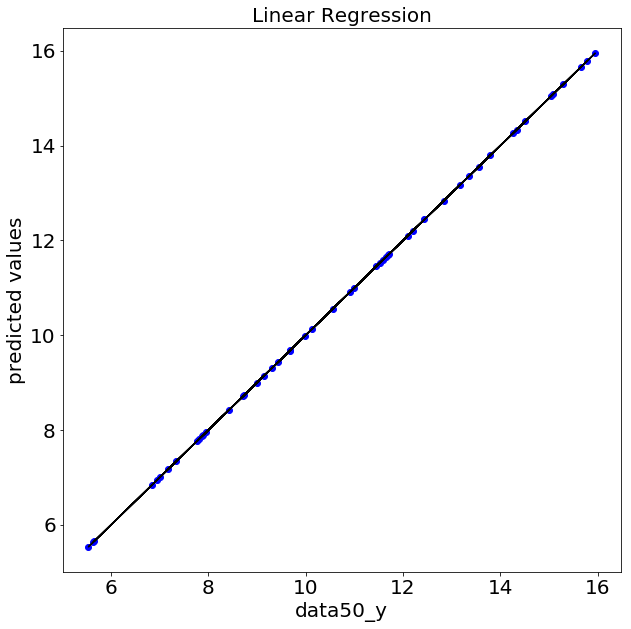

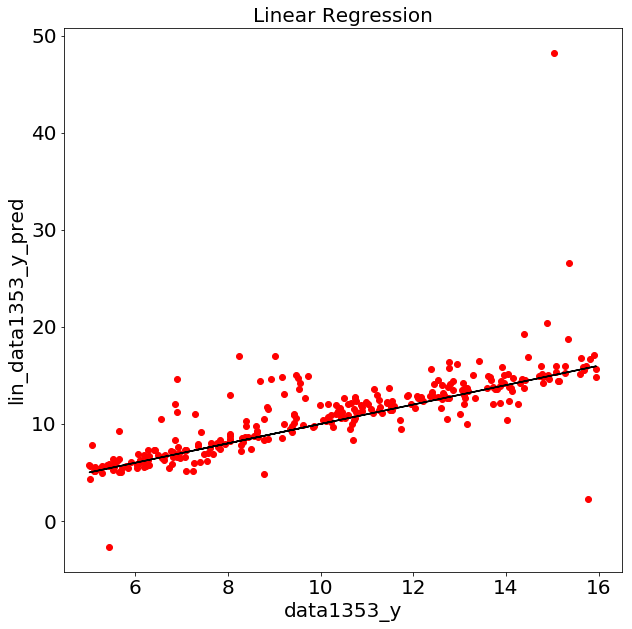

In [87]:
# Linear Regression on first 50 datapoints

from sklearn.linear_model import LinearRegression
data50_lin_regressor=LinearRegression()
data50_lin_regressor.fit(data50_x,data50_y)
#Predicting y_test
lin_data1353_y_pred=data50_lin_regressor.predict(data1353_x)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(data50_y, data50_lin_regressor.predict(data50_x)))
print('MSE on train set= %.2f' %mean_squared_error(data50_y, data50_lin_regressor.predict(data50_x)))
print('R2 score on test set= %.2f' %r2_score(data1353_y, lin_data1353_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(data1353_y, lin_data1353_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data50_y', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(data50_y,data50_lin_regressor.predict(data50_x), color='b')
plt.plot(data50_y,data50_y, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('data1353_y',fontsize=20)
plt.ylabel('lin_data1353_y_pred',fontsize=20)
plt.scatter(data1353_y,lin_data1353_y_pred, color='r')
plt.plot(data1353_y,data1353_y,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# TRAINING FOR I-TYPE 

In [2]:

# axis=1 to make sure that no duplicate items are created and columns added to columns but not as rows.
i1=pd.concat([s1,thickness_col['i_thickness']], axis=1)
i2=pd.concat([s2,thickness_col['i_thickness']], axis=1)
i3=pd.concat([s3,thickness_col['i_thickness']], axis=1)
i4=pd.concat([s4,thickness_col['i_thickness']], axis=1)
i5=pd.concat([s5,thickness_col['i_thickness']], axis=1)
i6=pd.concat([s6,thickness_col['i_thickness']], axis=1)
i7=pd.concat([s7,thickness_col['i_thickness']], axis=1)
i8=pd.concat([s8,thickness_col['i_thickness']], axis=1)


In [3]:
# For (-2,2) voltages

# Creating Matrix of features and dependent variables
i8_x=np.log(abs(i8.iloc[:,i8.columns != 'i_thickness']))
i8_y=i8.iloc[:,-1:]# Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i8_x_train, i8_x_test, i8_y_train, i8_y_test = train_test_split(i8_x,i8_y,test_size=0.2, random_state=0)


/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.99
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.05


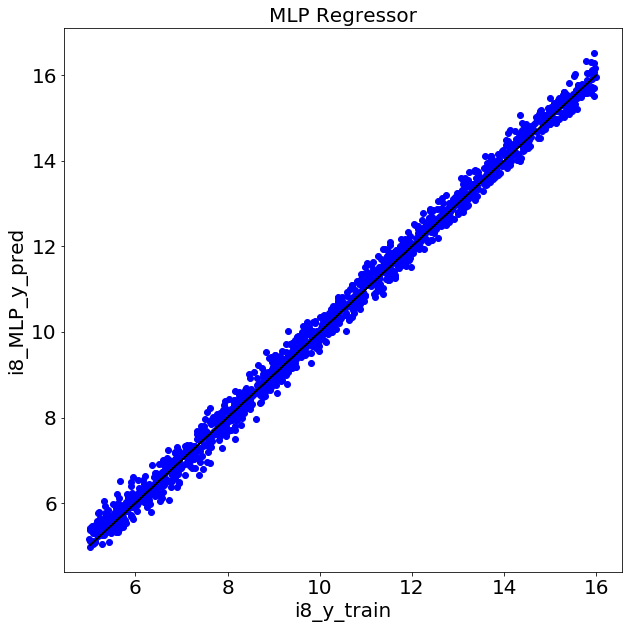

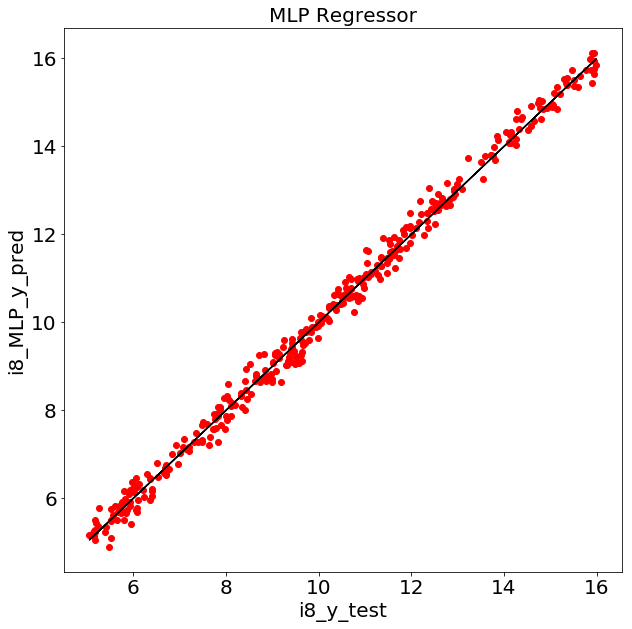

In [4]:
from sklearn.neural_network import MLPRegressor
i8_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i8_MLP_regressor.fit(i8_x_train,i8_y_train)
# Predicting output for x_test 
i8_MLP_y_pred = i8_MLP_regressor.predict(i8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i8_y_train, i8_MLP_regressor.predict(i8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i8_y_train, i8_MLP_regressor.predict(i8_x_train)))
print('R2 score = %.2f' %r2_score(i8_y_test, i8_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i8_y_test, i8_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i8_y_train',fontsize=20)
plt.ylabel('i8_MLP_y_pred',fontsize=20)
plt.scatter(i8_y_train,i8_MLP_regressor.predict(i8_x_train), color='b')
plt.plot(i8_y_train,i8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i8_y_test',fontsize=20)
plt.ylabel('i8_MLP_y_pred',fontsize=20)
plt.scatter(i8_y_test,i8_MLP_regressor.predict(i8_x_test), color='r')
plt.plot(i8_y_test,i8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [5]:
import pandas as pd
new_data=pd.read_csv("new_dataset.csv")


In [6]:
new_data_x=np.log(abs(new_data.iloc[:,0:102]))
new_data_y=new_data.iloc[:,103]

In [7]:

predictions=i8_MLP_regressor.predict(new_data_x)

R2 score on train set= 0.94
MSE on train set= 2.21


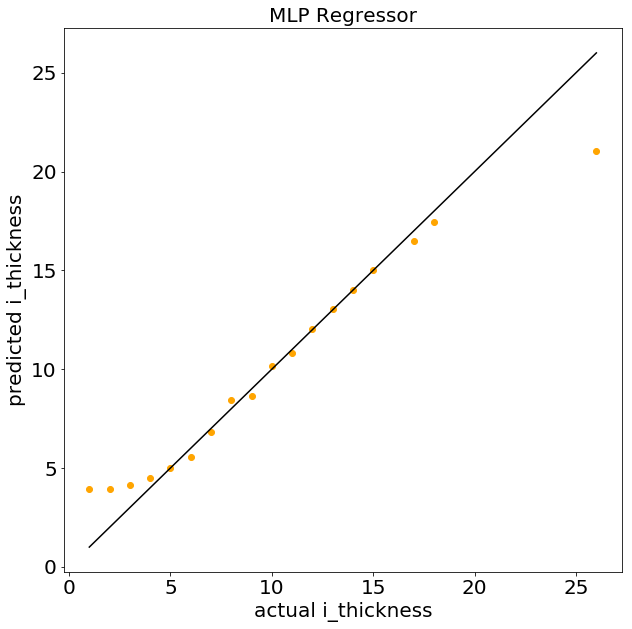

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(new_data_y, i8_MLP_regressor.predict(new_data_x)))
print('MSE on train set= %.2f' %mean_squared_error(new_data_y, i8_MLP_regressor.predict(new_data_x)))
#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('actual i_thickness',fontsize=20)
plt.ylabel('predicted i_thickness',fontsize=20)
plt.scatter(new_data_y, i8_MLP_regressor.predict(new_data_x), color='orange')
plt.plot(new_data_y,new_data_y, color='black')
plt.plot(i8_y_test,i8_y_test,'-' ,color='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


R2 score on train set= 1.00
MSE on train set= 0.03
R2 score on test set= 1.00
MSE on test set= 0.03


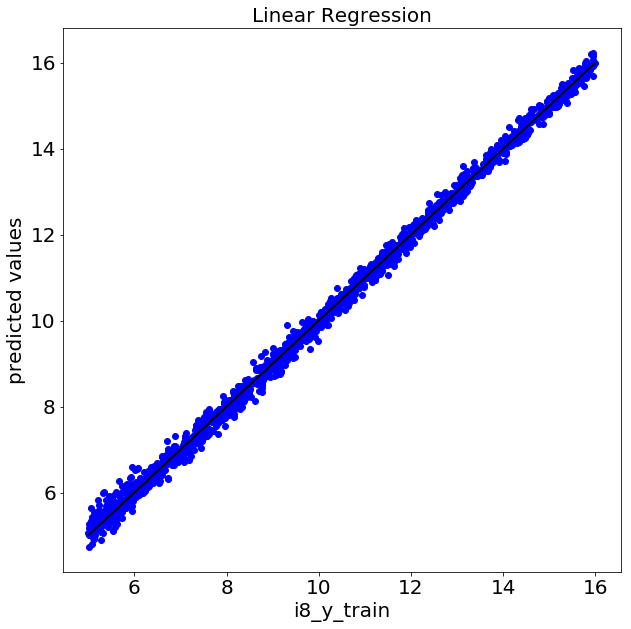

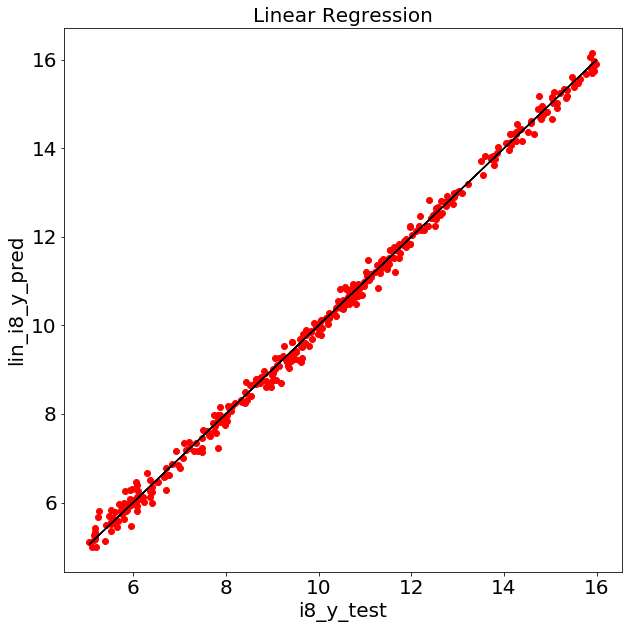

In [12]:
# Linear Regression

from sklearn.linear_model import LinearRegression
i8_lin_regressor=LinearRegression()
i8_lin_regressor.fit(i8_x_train,i8_y_train)
#Predicting y_test
lin_i8_y_pred=i8_lin_regressor.predict(i8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i8_y_train, i8_lin_regressor.predict(i8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i8_y_train, i8_lin_regressor.predict(i8_x_train)))
print('R2 score on test set= %.2f' %r2_score(i8_y_test, lin_i8_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(i8_y_test, lin_i8_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i8_y_train', fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i8_y_train,i8_lin_regressor.predict(i8_x_train), color='b')
plt.plot(i8_y_train,i8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i8_y_test',fontsize=20)
plt.ylabel('lin_i8_y_pred',fontsize=20)
plt.scatter(i8_y_test,lin_i8_y_pred, color='r')
plt.plot(i8_y_test,i8_y_test,color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [ ]:
TRAINING OUT OF RANGE DATA
FOR LINEAR REGRESSION

R2 score on train set= 0.86
MSE on train set= 5.53


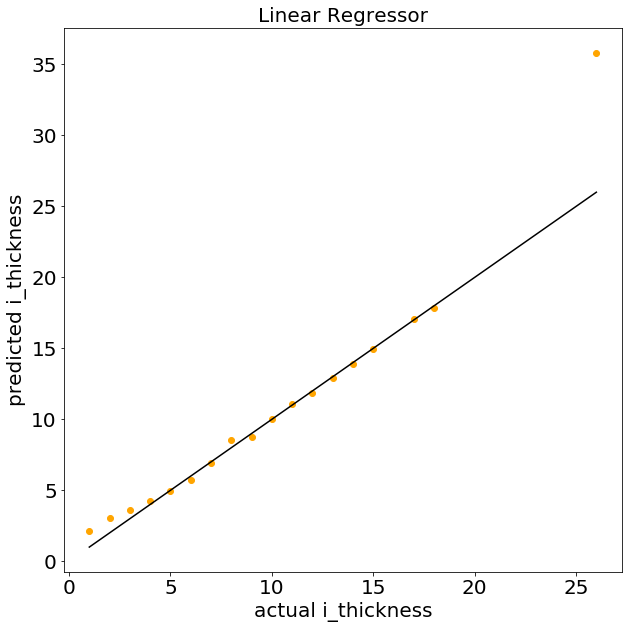

In [26]:

lin_predictions=i8_lin_regressor.predict((new_data_x))
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(new_data_y, i8_lin_regressor.predict(new_data_x)))
print('MSE on train set= %.2f' %mean_squared_error(new_data_y, i8_lin_regressor.predict(new_data_x)))
#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regressor',fontsize=20)
plt.xlabel('actual i_thickness',fontsize=20)
plt.ylabel('predicted i_thickness',fontsize=20)
plt.scatter(new_data_y, i8_lin_regressor.predict(new_data_x), color='orange')
plt.plot(new_data_y,new_data_y, color='black')
#plt.plot(i8_y_test,i8_y_test,'-' ,color='green')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.06


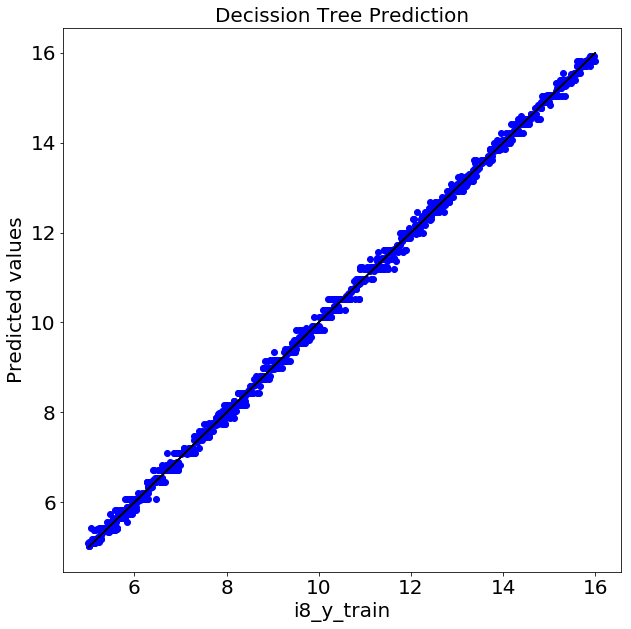

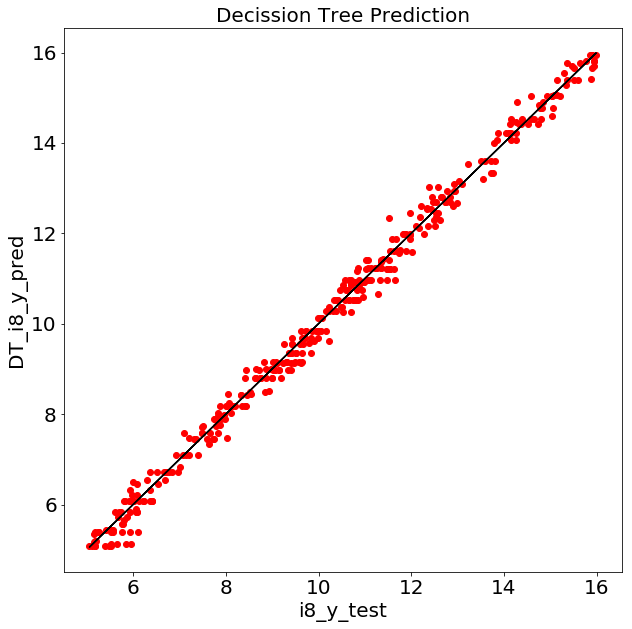

In [161]:
####DECISION TREE
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
i8_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
i8_DT_regressor.fit(i8_x_train,i8_y_train)
#prdicting y_test
DT_i8_y_pred = i8_DT_regressor.predict(i8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i8_y_train, i8_DT_regressor.predict(i8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i8_y_train, i8_DT_regressor.predict(i8_x_train)))
print('R2 score = %.2f' %r2_score(i8_y_test, DT_i8_y_pred))
print('MSE = %.2f' %mean_squared_error(i8_y_test, DT_i8_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i8_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i8_y_train,i8_DT_regressor.predict(i8_x_train), color='b')
plt.plot(i8_y_train,i8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i8_y_test',fontsize=20)
plt.ylabel('DT_i8_y_pred',fontsize=20)
plt.scatter(i8_y_test,DT_i8_y_pred, color='r')
plt.plot(i8_y_test,i8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 1.00
MSE = 0.04


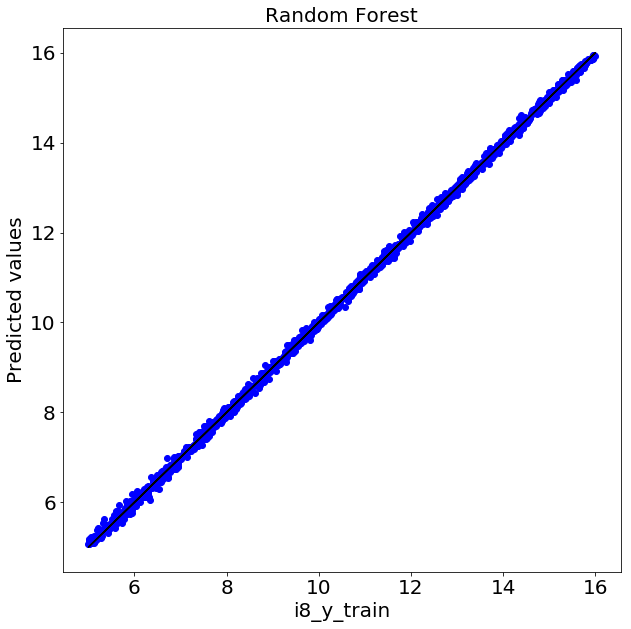

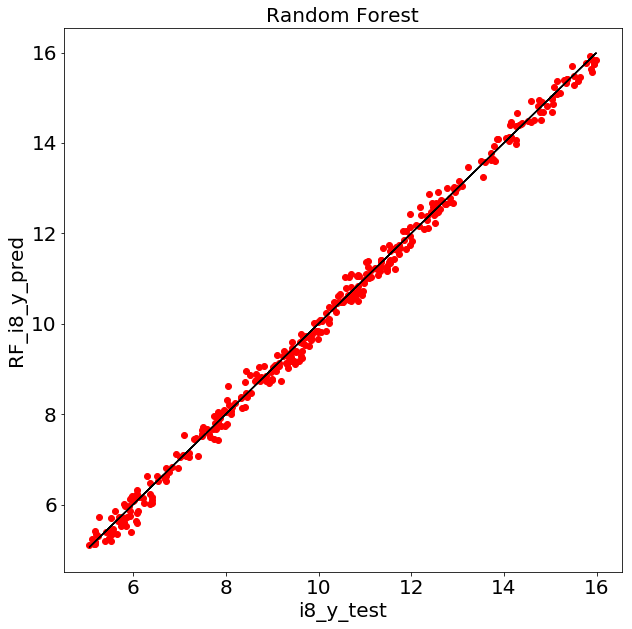

In [162]:
#####Random Forest
from sklearn.ensemble import RandomForestRegressor
i8_RF_regressor= RandomForestRegressor(n_estimators=300)
i8_RF_regressor.fit(i8_x_train,i8_y_train)
#predicting y_test
RF_i8_y_pred= i8_RF_regressor.predict(i8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i8_y_train, i8_RF_regressor.predict(i8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i8_y_train, i8_RF_regressor.predict(i8_x_train)))
print('R2 score = %.2f' %r2_score(i8_y_test, RF_i8_y_pred))
print('MSE = %.2f' %mean_squared_error(i8_y_test, RF_i8_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i8_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i8_y_train,i8_RF_regressor.predict(i8_x_train), color='b')
plt.plot(i8_y_train,i8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i8_y_test',fontsize=20)
plt.ylabel('RF_i8_y_pred',fontsize=20)
plt.scatter(i8_y_test,i8_RF_regressor.predict(i8_x_test), color='r')
plt.plot(i8_y_test,i8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only -2 voltage

In [163]:
# Creating Matrix of features and dependent variables
i1_x=np.log(-i1.iloc[:,i1.columns != 'i_thickness'])
i1_y=i1.iloc[:,-1:]# Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i1_x_train, i1_x_test, i1_y_train, i1_y_test = train_test_split(i1_x,i1_y,test_size=0.2, random_state=0)



/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.99
MSE on train set= 0.06
R2 score = 0.99
MSE = 0.06


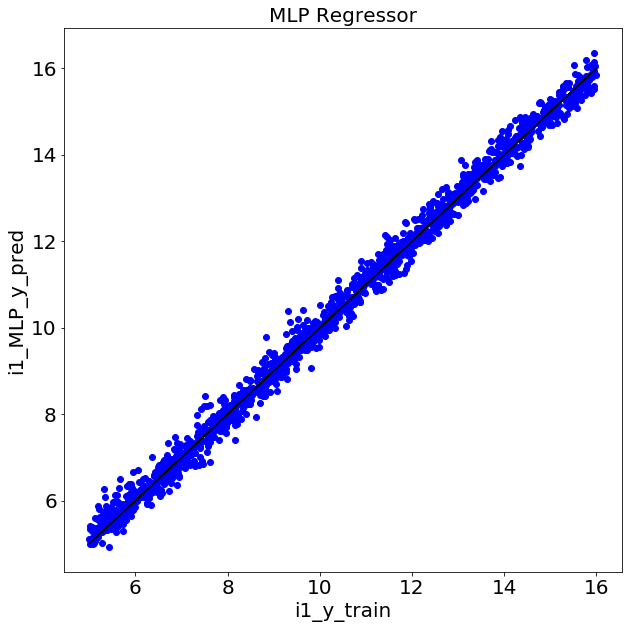

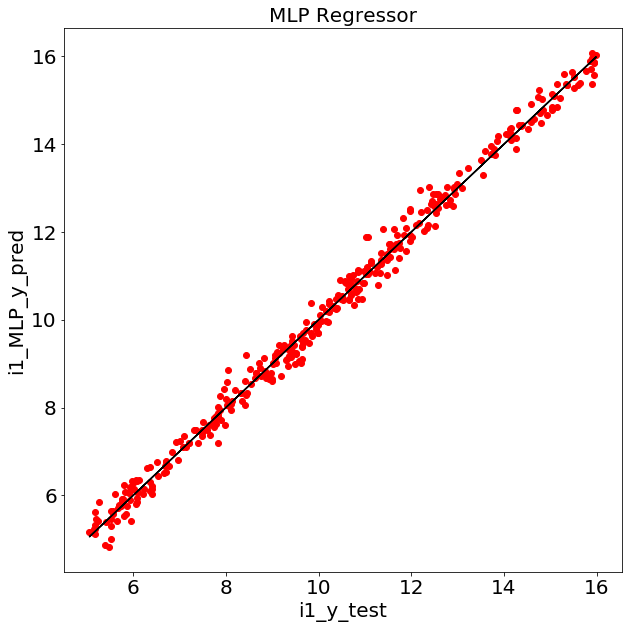

In [164]:
from sklearn.neural_network import MLPRegressor
i1_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i1_MLP_regressor.fit(i1_x_train,i1_y_train)
# Predicting output for x_test 
i1_MLP_y_pred = i1_MLP_regressor.predict(i1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i1_y_train, i1_MLP_regressor.predict(i1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i1_y_train, i1_MLP_regressor.predict(i1_x_train)))
print('R2 score = %.2f' %r2_score(i1_y_test, i1_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i1_y_test, i1_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i1_y_train',fontsize=20)
plt.ylabel('i1_MLP_y_pred',fontsize=20)
plt.scatter(i1_y_train,i1_MLP_regressor.predict(i1_x_train), color='b')
plt.plot(i1_y_train,i1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i1_y_test',fontsize=20)
plt.ylabel('i1_MLP_y_pred',fontsize=20)
plt.scatter(i1_y_test,i1_MLP_regressor.predict(i1_x_test), color='r')
plt.plot(i1_y_test,i1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.99
MSE on train set= 0.06
R2 score on test set= 0.99
MSE on test set= 0.06


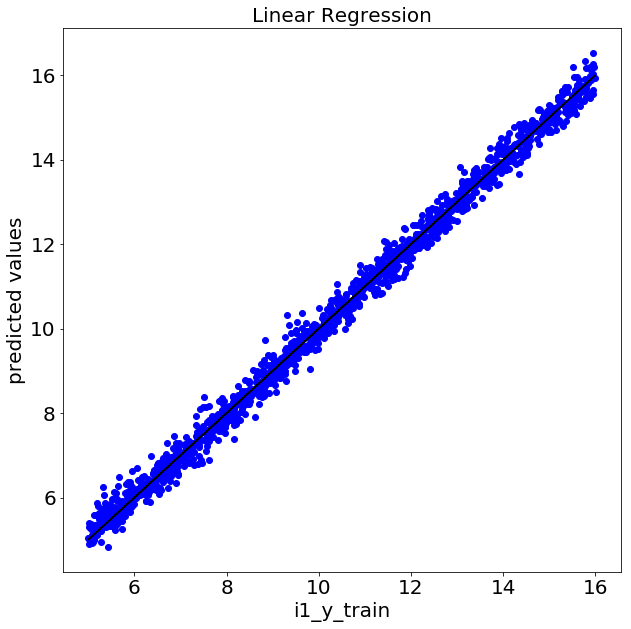

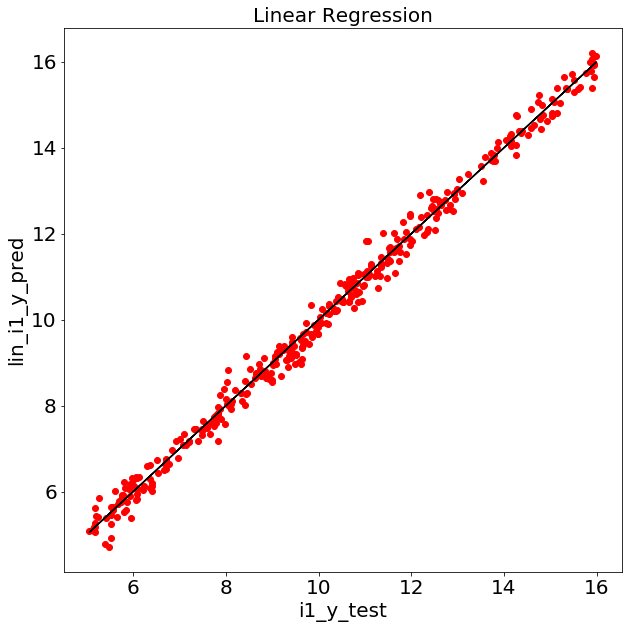

In [165]:
from sklearn.linear_model import LinearRegression
i_lin_regressor=LinearRegression()
i_lin_regressor.fit(i1_x_train,i1_y_train)
#Predicting y_test
lin_i1_y_pred=i_lin_regressor.predict(i1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i1_y_train, i_lin_regressor.predict(i1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i1_y_train, i_lin_regressor.predict(i1_x_train)))
print('R2 score on test set= %.2f' %r2_score(i1_y_test, lin_i1_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(i1_y_test, lin_i1_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i1_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i1_y_train,i_lin_regressor.predict(i1_x_train), color='b')
plt.plot(i1_y_train,i1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i1_y_test',fontsize=20)
plt.ylabel('lin_i1_y_pred',fontsize=20)
plt.scatter(i1_y_test,lin_i1_y_pred, color='r')
plt.plot(i1_y_test,i1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.03
R2 score = 0.99
MSE = 0.08


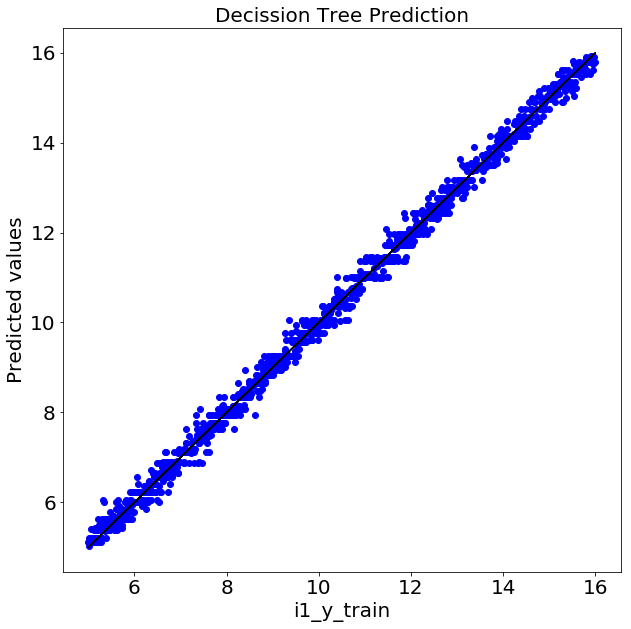

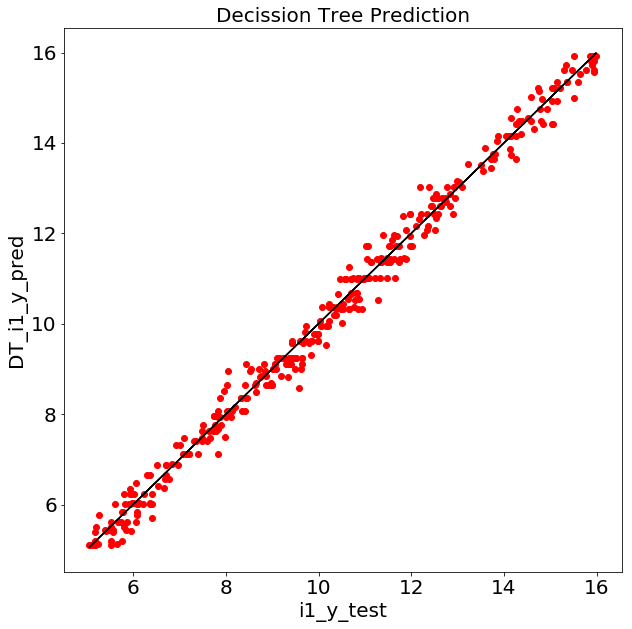

In [166]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
i_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
i_DT_regressor.fit(i1_x_train,i1_y_train)
#prdicting y_test
DT_i1_y_pred = i_DT_regressor.predict(i1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i1_y_train, i_DT_regressor.predict(i1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i1_y_train, i_DT_regressor.predict(i1_x_train)))
print('R2 score = %.2f' %r2_score(i1_y_test, DT_i1_y_pred))
print('MSE = %.2f' %mean_squared_error(i1_y_test, DT_i1_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i1_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i1_y_train,i_DT_regressor.predict(i1_x_train), color='b')
plt.plot(i1_y_train,i1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i1_y_test',fontsize=20)
plt.ylabel('DT_i1_y_pred',fontsize=20)
plt.scatter(i1_y_test,DT_i1_y_pred, color='r')
plt.plot(i1_y_test,i1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.08


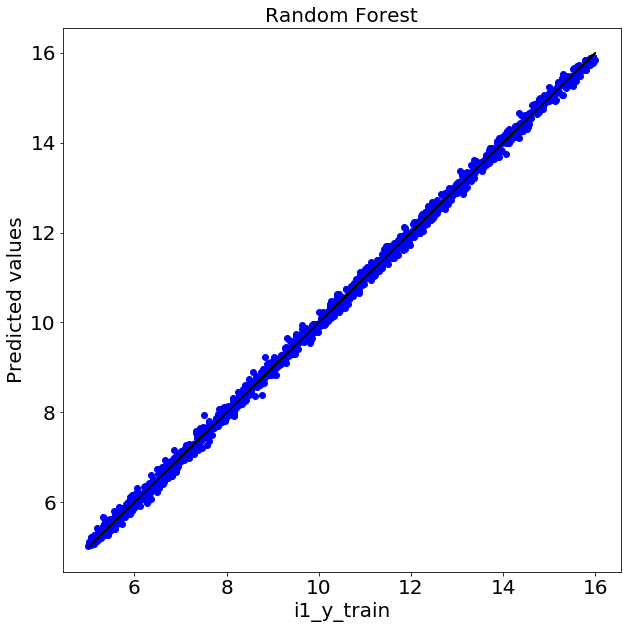

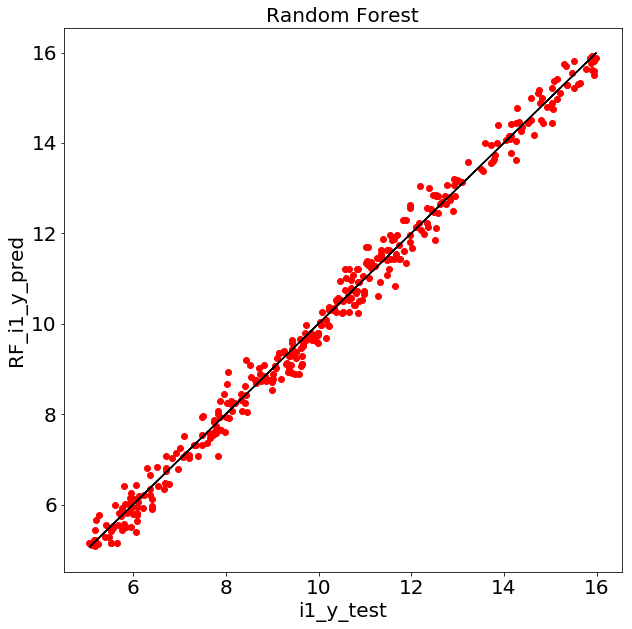

In [167]:

#Random Forest
from sklearn.ensemble import RandomForestRegressor
i_RF_regressor= RandomForestRegressor(n_estimators=300)
i_RF_regressor.fit(i1_x_train,i1_y_train)
#predicting y_test
RF_i1_y_pred= i_RF_regressor.predict(i1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i1_y_train, i_RF_regressor.predict(i1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i1_y_train, i_RF_regressor.predict(i1_x_train)))
print('R2 score = %.2f' %r2_score(i1_y_test, RF_i1_y_pred))
print('MSE = %.2f' %mean_squared_error(i1_y_test, RF_i1_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i1_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i1_y_train,i_RF_regressor.predict(i1_x_train), color='b')
plt.plot(i1_y_train,i1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i1_y_test',fontsize=20)
plt.ylabel('RF_i1_y_pred',fontsize=20)
plt.scatter(i1_y_test,i_RF_regressor.predict(i1_x_test), color='r')
plt.plot(i1_y_test,i1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only (-2,-1) voltages

In [168]:
# Creating Matrix of features and dependent variables
i2_x=np.log(-i2.iloc[:,i2.columns != 'i_thickness'])
i2_y=i2.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i2_x_train, i2_x_test, i2_y_train, i2_y_test = train_test_split(i2_x,i2_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.99
MSE on train set= 0.07
R2 score = 0.99
MSE = 0.06


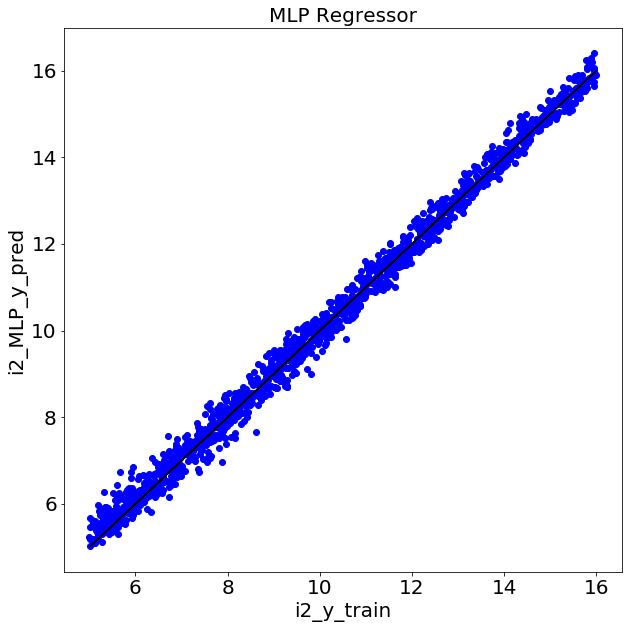

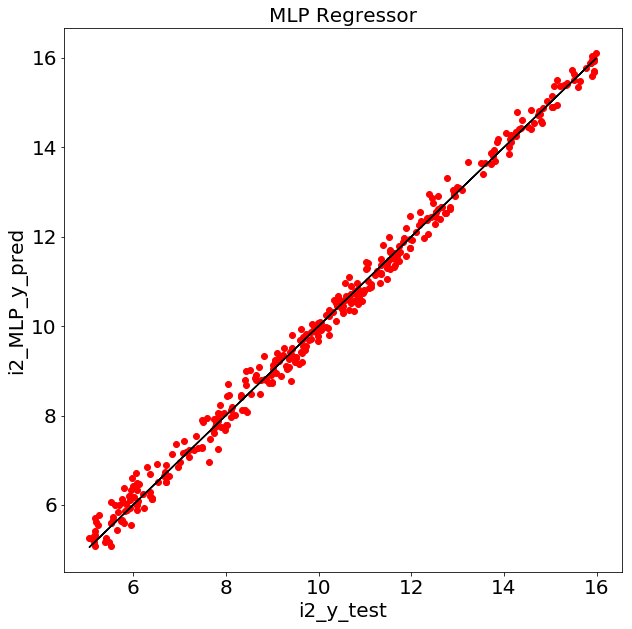

In [169]:
from sklearn.neural_network import MLPRegressor
i2_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i2_MLP_regressor.fit(i2_x_train,i2_y_train)
# Predicting output for x_test 
i2_MLP_y_pred = i2_MLP_regressor.predict(i2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i2_y_train, i2_MLP_regressor.predict(i2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i2_y_train, i2_MLP_regressor.predict(i2_x_train)))
print('R2 score = %.2f' %r2_score(i2_y_test, i2_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i2_y_test, i2_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i2_y_train',fontsize=20)
plt.ylabel('i2_MLP_y_pred',fontsize=20)
plt.scatter(i2_y_train,i2_MLP_regressor.predict(i2_x_train), color='b')
plt.plot(i2_y_train,i2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i2_y_test',fontsize=20)
plt.ylabel('i2_MLP_y_pred',fontsize=20)
plt.scatter(i2_y_test,i2_MLP_regressor.predict(i2_x_test), color='r')
plt.plot(i2_y_test,i2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.05


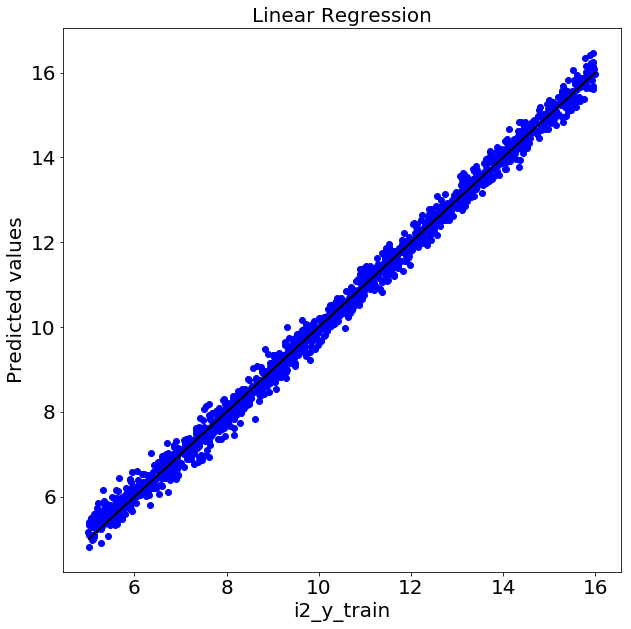

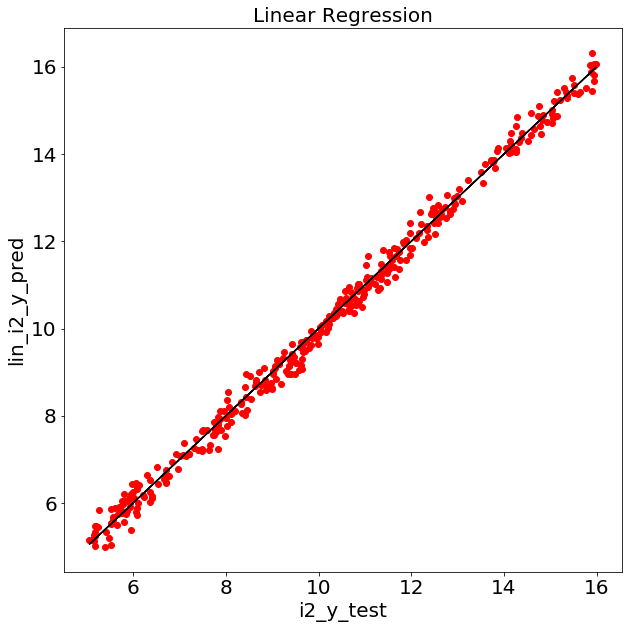

In [170]:
from sklearn.linear_model import LinearRegression
i2_lin_regressor=LinearRegression()
i2_lin_regressor.fit(i2_x_train,i2_y_train)
#Predicting y_test
lin_i2_y_pred=i2_lin_regressor.predict(i2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i2_y_train, i2_lin_regressor.predict(i2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i2_y_train, i2_lin_regressor.predict(i2_x_train)))
print('R2 score = %.2f' %r2_score(i2_y_test, lin_i2_y_pred))
print('MSE = %.2f' %mean_squared_error(i2_y_test, lin_i2_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i2_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i2_y_train,i2_lin_regressor.predict(i2_x_train), color='b')
plt.plot(i2_y_train,i2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i2_y_test',fontsize=20)
plt.ylabel('lin_i2_y_pred',fontsize=20)
plt.scatter(i2_y_test,lin_i2_y_pred, color='r')
plt.plot(i2_y_test,i2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.02
R2 score = 0.99
MSE = 0.07


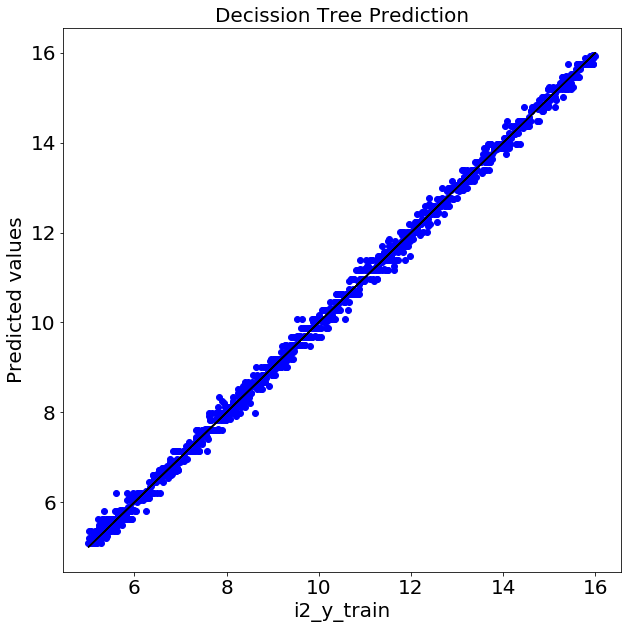

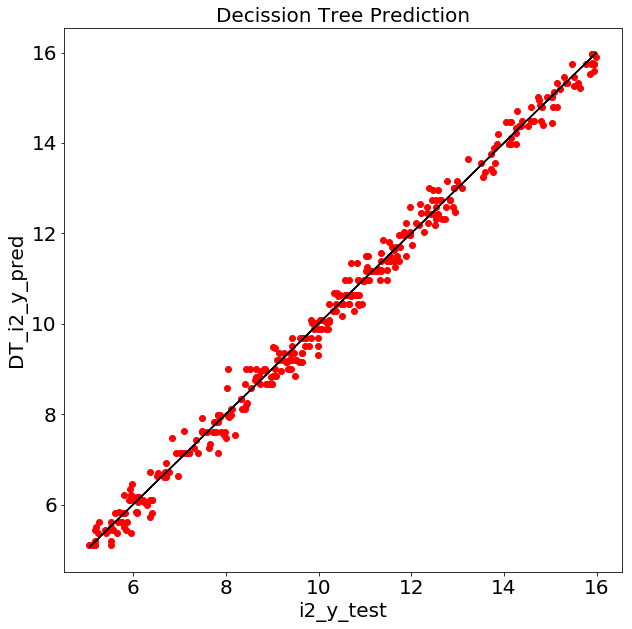

In [171]:
from sklearn.tree import DecisionTreeRegressor
i2_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
i2_DT_regressor.fit(i2_x_train,i2_y_train)
#Predicting y_test
DT_i2_y_pred = i2_DT_regressor.predict(i2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i2_y_train, i2_DT_regressor.predict(i2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i2_y_train, i2_DT_regressor.predict(i2_x_train)))
print('R2 score = %.2f' %r2_score(i2_y_test, DT_i2_y_pred))
print('MSE = %.2f' %mean_squared_error(i2_y_test, DT_i2_y_pred))
#Plot for traininng results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i2_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i2_y_train,i2_DT_regressor.predict(i2_x_train), color='b')
plt.plot(i2_y_train,i2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i2_y_test',fontsize=20)
plt.ylabel('DT_i2_y_pred',fontsize=20)
plt.scatter(i2_y_test,DT_i2_y_pred, color='r')
plt.plot(i2_y_test,i2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.06


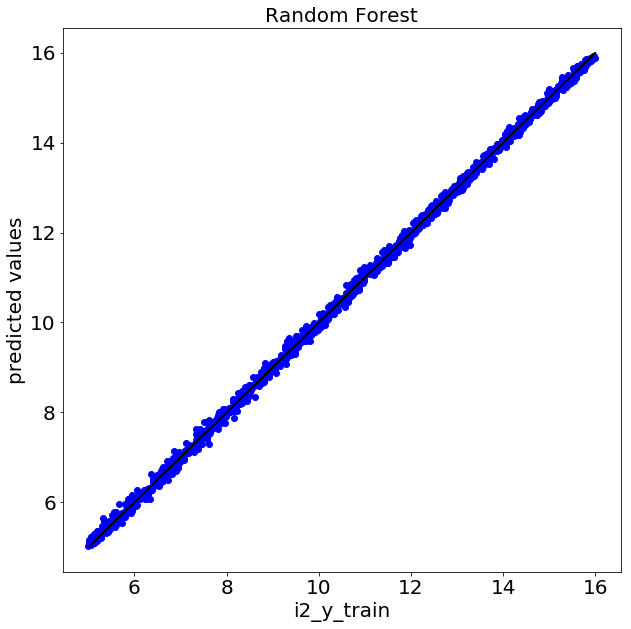

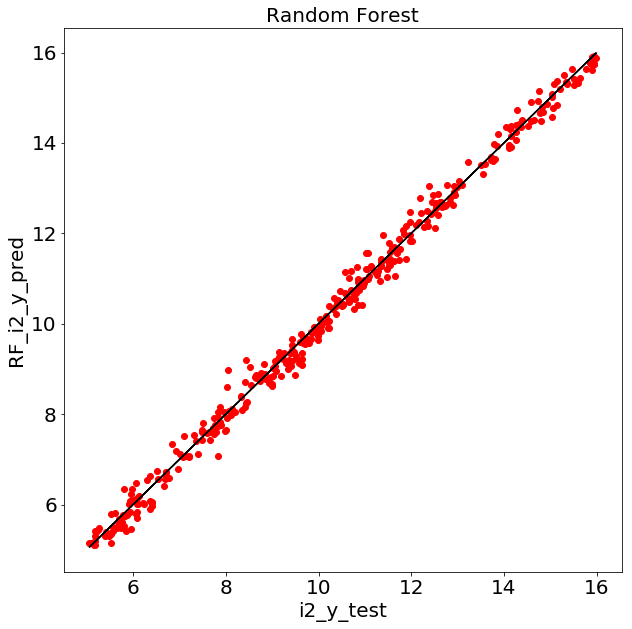

In [172]:
from sklearn.ensemble import RandomForestRegressor
i2_RF_regressor= RandomForestRegressor(n_estimators=300)
i2_RF_regressor.fit(i2_x_train,i2_y_train)
#Predicting y_test
RF_i2_y_pred= i2_RF_regressor.predict(i2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i2_y_train, i2_RF_regressor.predict(i2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i2_y_train, i2_RF_regressor.predict(i2_x_train)))
print('R2 score = %.2f' %r2_score(i2_y_test, RF_i2_y_pred))
print('MSE = %.2f' %mean_squared_error(i2_y_test, RF_i2_y_pred))
# Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i2_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i2_y_train,i2_RF_regressor.predict(i2_x_train), color='b')
plt.plot(i2_y_train,i2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i2_y_test',fontsize=20)
plt.ylabel('RF_i2_y_pred',fontsize=20)
plt.scatter(i2_y_test,i2_RF_regressor.predict(i2_x_test), color='r')
plt.plot(i2_y_test,i2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only with (-1,0) voltages

In [173]:
# Creating Matrix of features and dependent variables
#Why did we use abs?
i3_x=np.log(abs(i3.iloc[:,i3.columns != 'i_thickness']))
i3_y=i3.iloc[:,-1:] # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i3_x_train, i3_x_test, i3_y_train, i3_y_test = train_test_split(i3_x,i3_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.99
MSE on train set= 0.09
R2 score = 0.99
MSE = 0.07


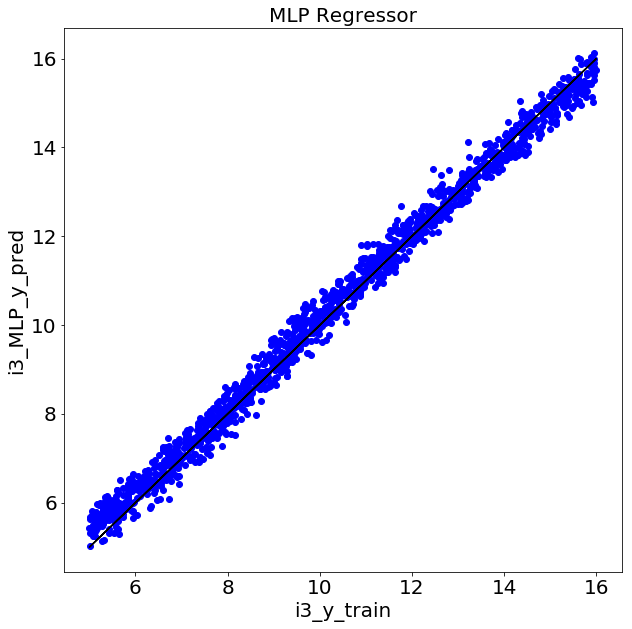

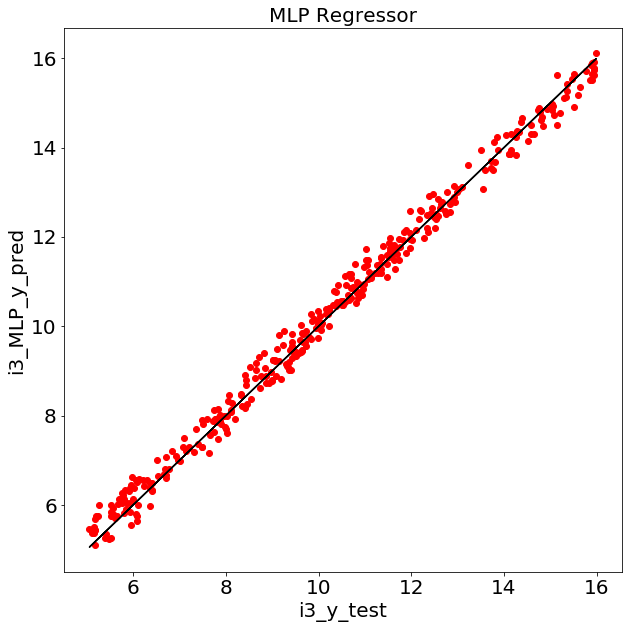

In [174]:
from sklearn.neural_network import MLPRegressor
i3_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i3_MLP_regressor.fit(i3_x_train,i3_y_train)
# Predicting output for x_test 
i3_MLP_y_pred = i3_MLP_regressor.predict(i3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i3_y_train, i3_MLP_regressor.predict(i3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i3_y_train, i3_MLP_regressor.predict(i3_x_train)))
print('R2 score = %.2f' %r2_score(i3_y_test, i3_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i3_y_test, i3_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i3_y_train',fontsize=20)
plt.ylabel('i3_MLP_y_pred',fontsize=20)
plt.scatter(i3_y_train,i3_MLP_regressor.predict(i3_x_train), color='b')
plt.plot(i3_y_train,i3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i3_y_test',fontsize=20)
plt.ylabel('i3_MLP_y_pred',fontsize=20)
plt.scatter(i3_y_test,i3_MLP_regressor.predict(i3_x_test), color='r')
plt.plot(i3_y_test,i3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.05
R2 score = 0.99
MSE = 0.05


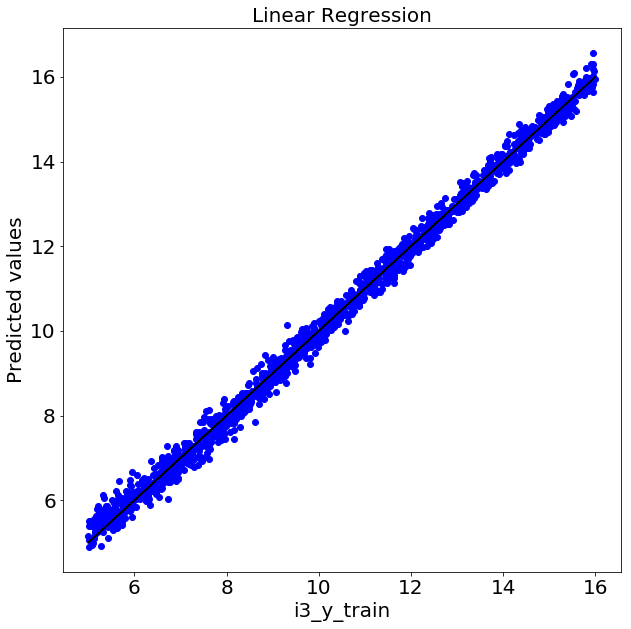

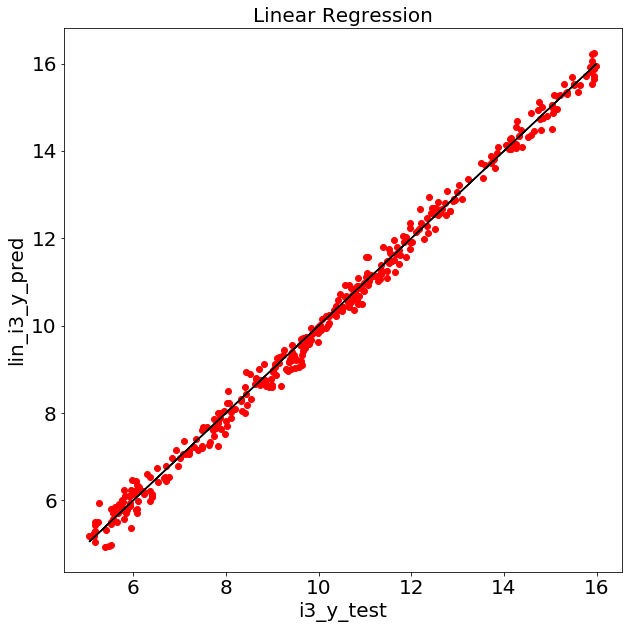

In [175]:
from sklearn.linear_model import LinearRegression
i3_lin_regressor=LinearRegression()
i3_lin_regressor.fit(i3_x_train,i3_y_train)
#Predicting y_test
lin_i3_y_pred=i3_lin_regressor.predict(i3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i3_y_train, i3_lin_regressor.predict(i3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i3_y_train, i3_lin_regressor.predict(i3_x_train)))
print('R2 score = %.2f' %r2_score(i3_y_test, lin_i3_y_pred))
print('MSE = %.2f' %mean_squared_error(i3_y_test, lin_i3_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i3_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i3_y_train,i3_lin_regressor.predict(i3_x_train), color='b')
plt.plot(i3_y_train,i3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i3_y_test',fontsize=20)
plt.ylabel('lin_i3_y_pred',fontsize=20)
plt.scatter(i3_y_test,lin_i3_y_pred, color='r')
plt.plot(i3_y_test,i3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.02
R2 score = 0.99
MSE = 0.06


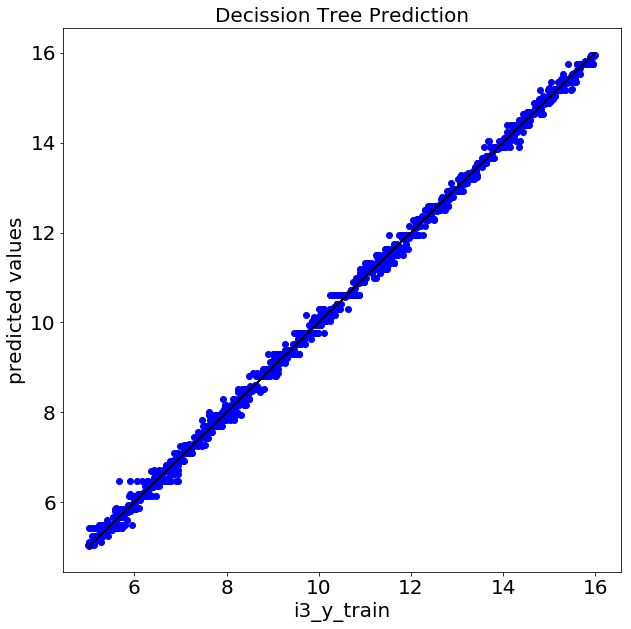

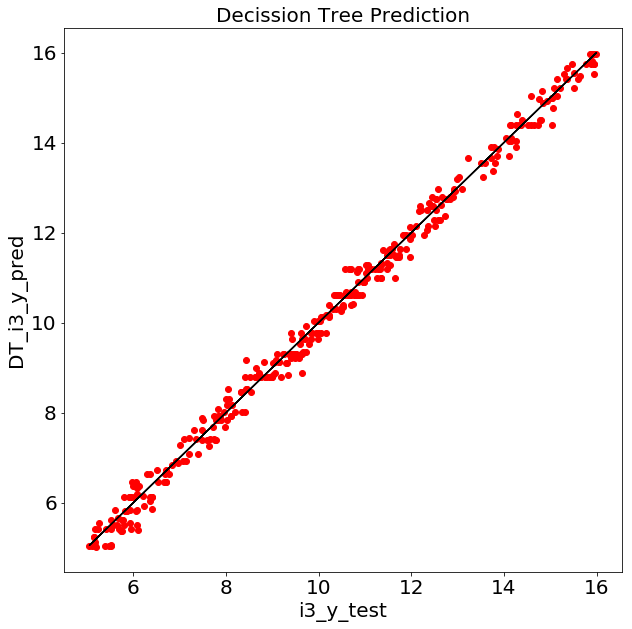

In [176]:

from sklearn.tree import DecisionTreeRegressor
i3_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
i3_DT_regressor.fit(i3_x_train,i3_y_train)
#Predficting y_test
DT_i3_y_pred = i3_DT_regressor.predict(i3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i3_y_train, i3_DT_regressor.predict(i3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i3_y_train, i3_DT_regressor.predict(i3_x_train)))
print('R2 score = %.2f' %r2_score(i3_y_test, DT_i3_y_pred))
print('MSE = %.2f' %mean_squared_error(i3_y_test, DT_i3_y_pred))
#Plot for training results 
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i3_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i3_y_train,i3_DT_regressor.predict(i3_x_train), color='b')
plt.plot(i3_y_train,i3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results 
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i3_y_test',fontsize=20)
plt.ylabel('DT_i3_y_pred',fontsize=20)
plt.scatter(i3_y_test,DT_i3_y_pred, color='r')
plt.plot(i3_y_test,i3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.05


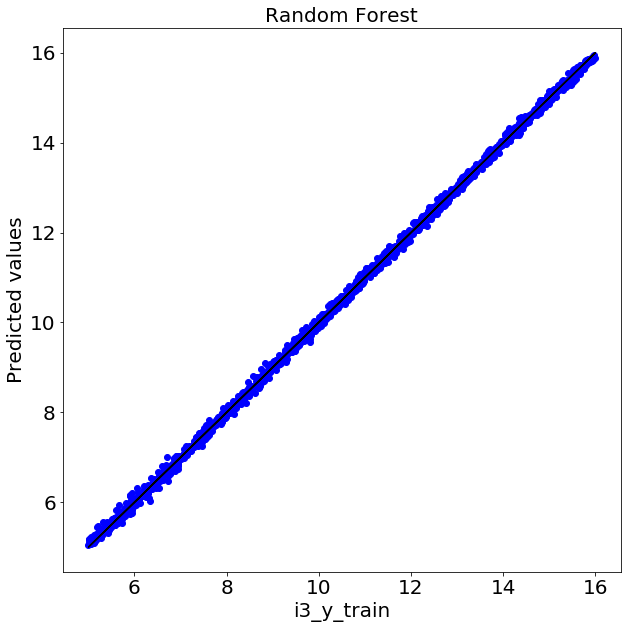

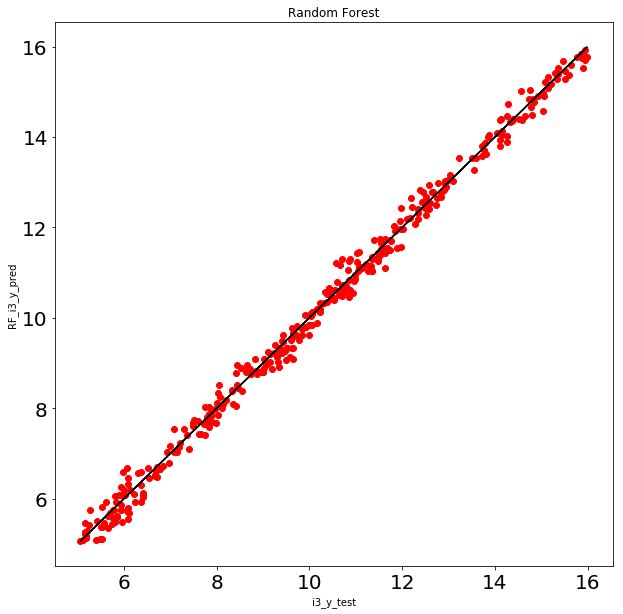

In [177]:
from sklearn.ensemble import RandomForestRegressor
i3_RF_regressor= RandomForestRegressor(n_estimators=300)
i3_RF_regressor.fit(i3_x_train,i3_y_train)
#Predicting y_test
RF_i3_y_pred= i3_RF_regressor.predict(i3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i3_y_train, i3_RF_regressor.predict(i3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i3_y_train, i3_RF_regressor.predict(i3_x_train)))
print('R2 score = %.2f' %r2_score(i3_y_test, RF_i3_y_pred))
print('MSE = %.2f' %mean_squared_error(i3_y_test, RF_i3_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i3_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i3_y_train,i3_RF_regressor.predict(i3_x_train), color='b')
plt.plot(i3_y_train,i3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('i3_y_test')
plt.ylabel('RF_i3_y_pred')
plt.scatter(i3_y_test,i3_RF_regressor.predict(i3_x_test), color='r')
plt.plot(i3_y_test,i3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only with (-2,0) voltages

In [178]:
# Creating Matrix of features and dependent variables
i4_x=np.log(abs(i4.iloc[:,i4.columns != 'i_thickness']))
i4_y=i4.iloc[:,-1:] # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i4_x_train, i4_x_test, i4_y_train, i4_y_test = train_test_split(i4_x,i4_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.97
MSE on train set= 0.26
R2 score = 0.97
MSE = 0.22


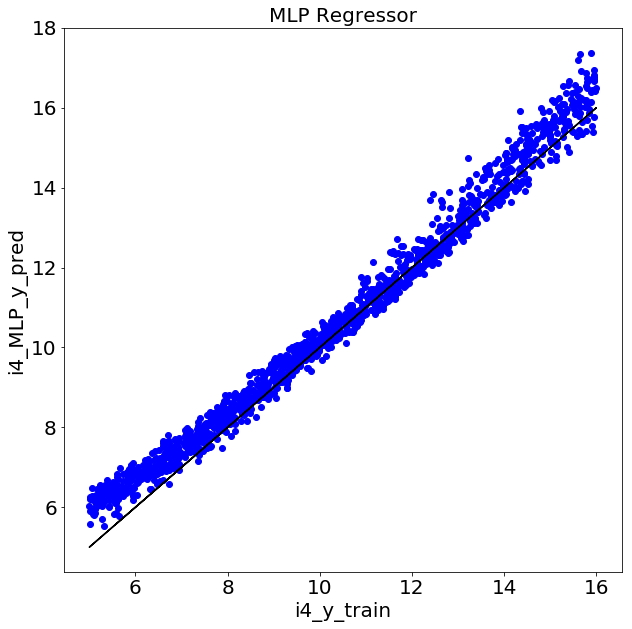

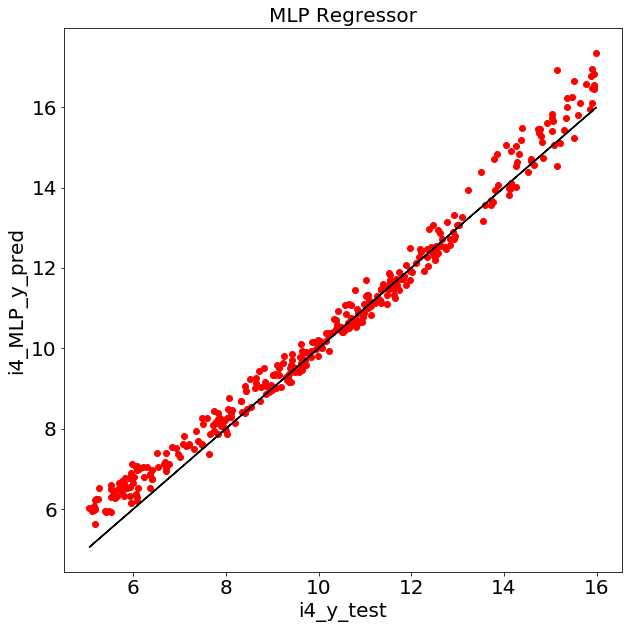

In [179]:
from sklearn.neural_network import MLPRegressor
i4_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i4_MLP_regressor.fit(i4_x_train,i4_y_train)
# Predicting output for x_test 
i4_MLP_y_pred = i4_MLP_regressor.predict(i4_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i4_y_train, i4_MLP_regressor.predict(i4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i4_y_train, i4_MLP_regressor.predict(i4_x_train)))
print('R2 score = %.2f' %r2_score(i4_y_test, i4_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i4_y_test, i4_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i4_y_train',fontsize=20)
plt.ylabel('i4_MLP_y_pred',fontsize=20)
plt.scatter(i4_y_train,i4_MLP_regressor.predict(i4_x_train), color='b')
plt.plot(i4_y_train,i4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i4_y_test',fontsize=20)
plt.ylabel('i4_MLP_y_pred',fontsize=20)
plt.scatter(i4_y_test,i4_MLP_regressor.predict(i4_x_test), color='r')
plt.plot(i4_y_test,i4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.04
R2 score = 0.99
MSE = 0.05


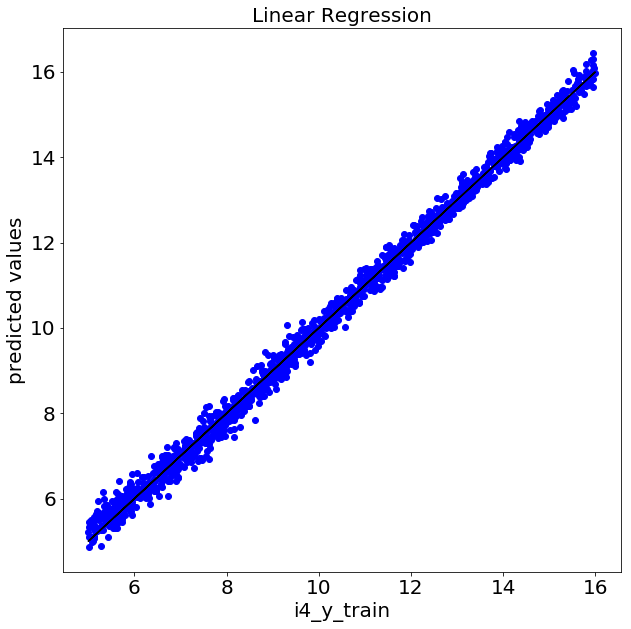

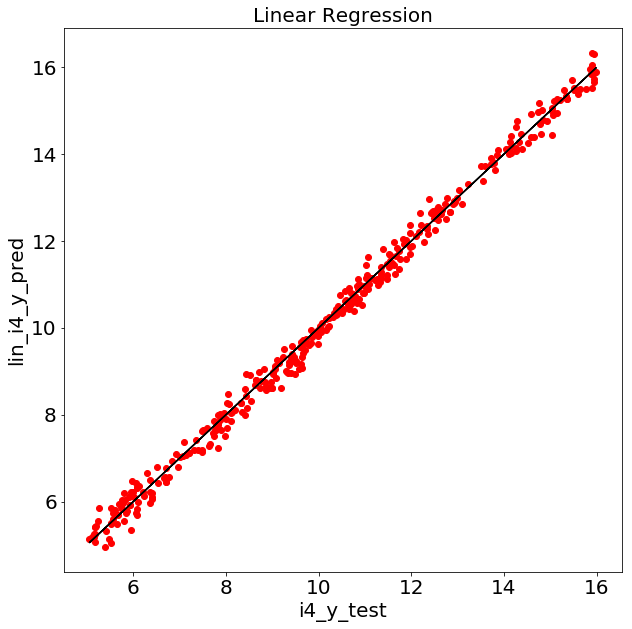

In [180]:
from sklearn.linear_model import LinearRegression
i4_lin_regressor=LinearRegression()
i4_lin_regressor.fit(i4_x_train,i4_y_train)
#Predicting y_test
lin_i4_y_pred=i4_lin_regressor.predict(i4_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i4_y_train, i4_lin_regressor.predict(i4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i4_y_train, i4_lin_regressor.predict(i4_x_train)))
print('R2 score = %.2f' %r2_score(i4_y_test, lin_i4_y_pred))
print('MSE = %.2f' %mean_squared_error(i4_y_test, lin_i4_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i4_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i4_y_train,i4_lin_regressor.predict(i4_x_train), color='b')
plt.plot(i4_y_train,i4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i4_y_test',fontsize=20)
plt.ylabel('lin_i4_y_pred',fontsize=20)
plt.scatter(i4_y_test,lin_i4_y_pred, color='r')
plt.plot(i4_y_test,i4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.02
R2 score = 0.99
MSE = 0.06


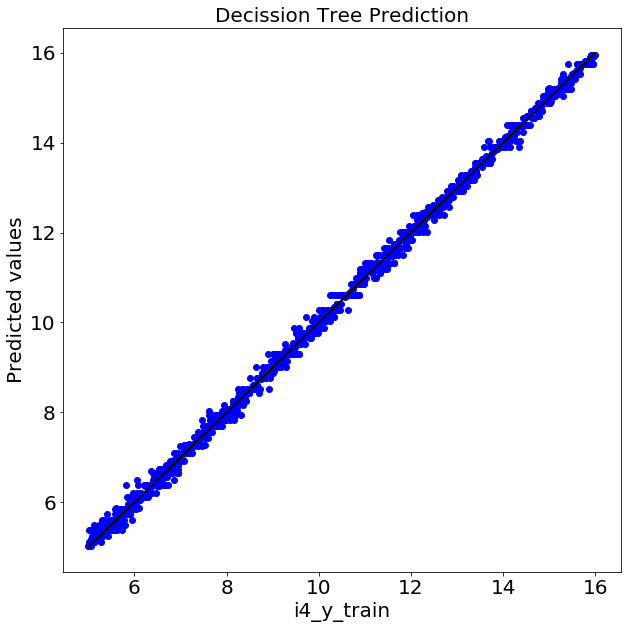

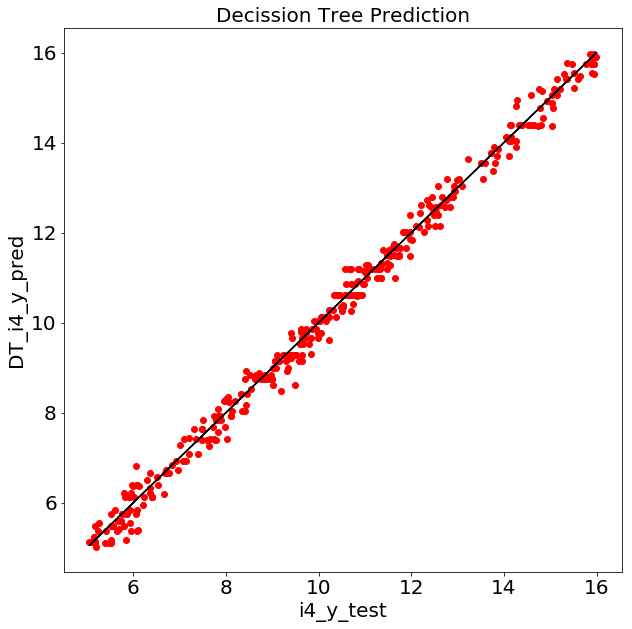

In [181]:
from sklearn.tree import DecisionTreeRegressor
i4_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
i4_DT_regressor.fit(i4_x_train,i4_y_train)
#Predicting y_test
DT_i4_y_pred = i4_DT_regressor.predict(i4_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i4_y_train, i4_DT_regressor.predict(i4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i4_y_train, i4_DT_regressor.predict(i4_x_train)))
print('R2 score = %.2f' %r2_score(i4_y_test, DT_i4_y_pred))
print('MSE = %.2f' %mean_squared_error(i4_y_test, DT_i4_y_pred))
#PLot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i4_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i4_y_train,i4_DT_regressor.predict(i4_x_train) ,color='b')
plt.plot(i4_y_train,i4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#PLot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i4_y_test',fontsize=20)
plt.ylabel('DT_i4_y_pred',fontsize=20)
plt.scatter(i4_y_test,DT_i4_y_pred, color='r')
plt.plot(i4_y_test,i4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.05


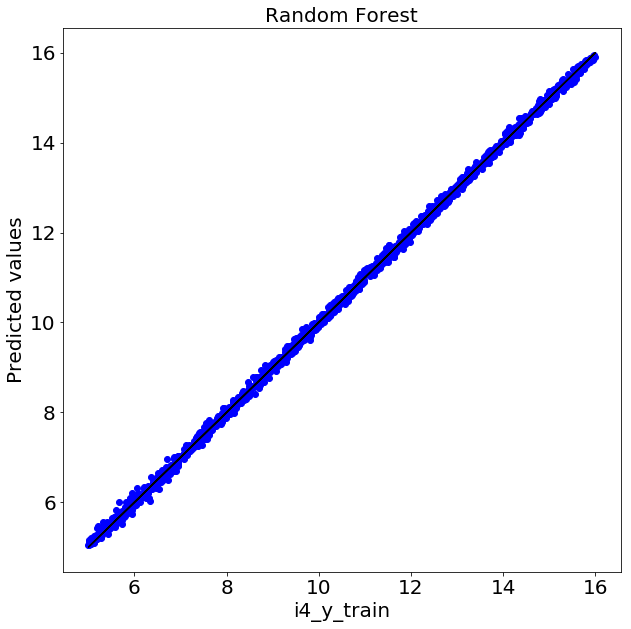

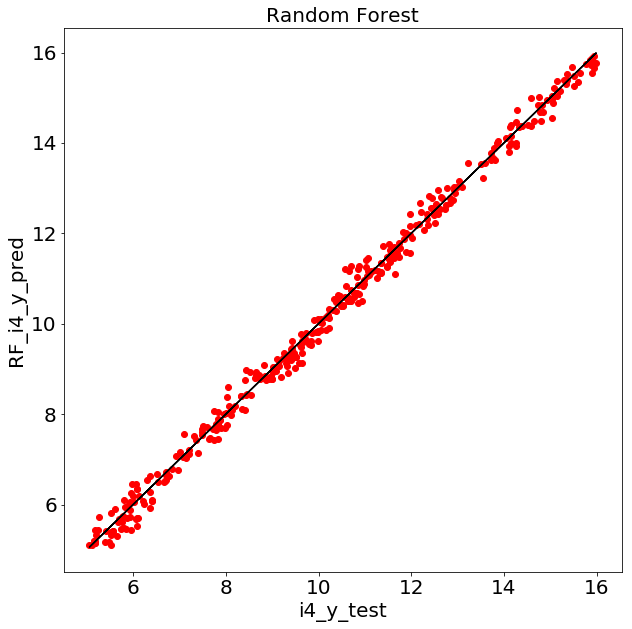

In [182]:
from sklearn.ensemble import RandomForestRegressor
i4_RF_regressor= RandomForestRegressor(n_estimators=300)
i4_RF_regressor.fit(i4_x_train,i4_y_train)
#Predicting y_test
RF_i4_y_pred= i4_RF_regressor.predict(i4_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i4_y_train, i4_RF_regressor.predict(i4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i4_y_train, i4_RF_regressor.predict(i4_x_train)))
print('R2 score = %.2f' %r2_score(i4_y_test, RF_i4_y_pred))
print('MSE = %.2f' %mean_squared_error(i4_y_test, RF_i4_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i4_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i4_y_train,i4_RF_regressor.predict(i4_x_train), color='b')
plt.plot(i4_y_train,i4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i4_y_test',fontsize=20)
plt.ylabel('RF_i4_y_pred',fontsize=20)
plt.scatter(i4_y_test,i4_RF_regressor.predict(i4_x_test), color='r')
plt.plot(i4_y_test,i4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only with (0,1) voltages

In [183]:
# Creating Matrix of features and dependent variables
i51_x=np.log(abs(i5.iloc[:,i5.columns != 'i_thickness']))
i51_y=i5.iloc[:,-1:].values # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i5_x_train, i5_x_test, i5_y_train, i5_y_test = train_test_split(i51_x,i51_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.93
MSE on train set= 0.67
R2 score = 0.92
MSE = 0.70


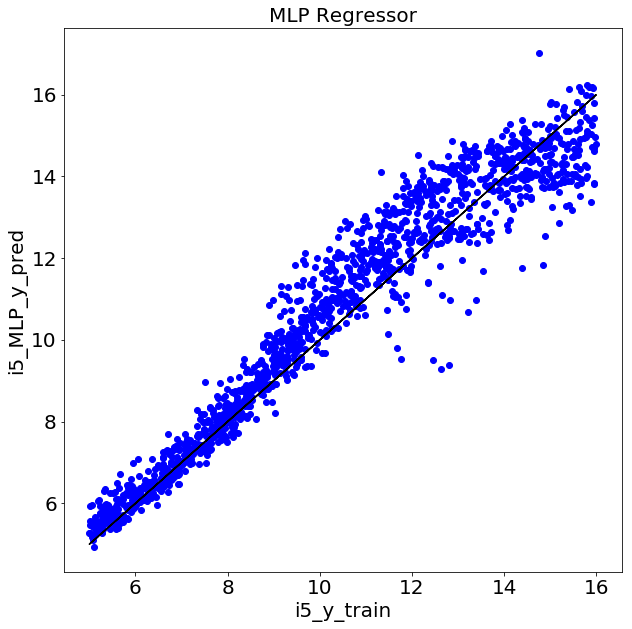

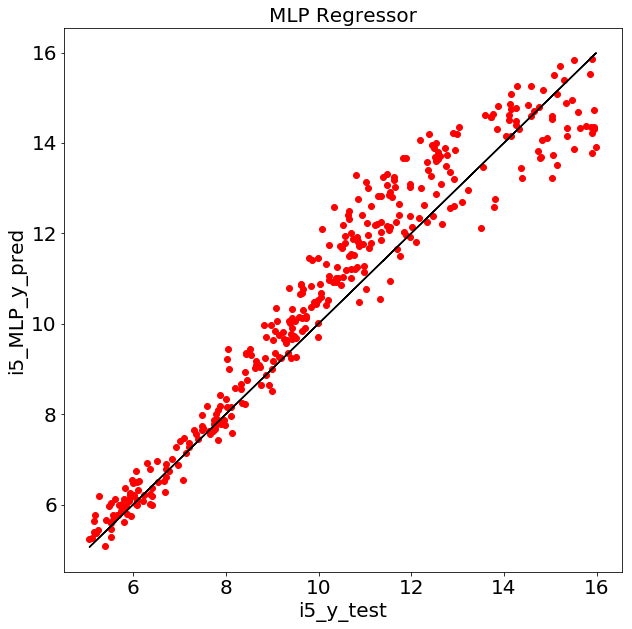

In [184]:
from sklearn.neural_network import MLPRegressor
i5_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i5_MLP_regressor.fit(i5_x_train,i5_y_train)
# Predicting output for x_test 
i5_MLP_y_pred = i5_MLP_regressor.predict(i5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i5_y_train, i5_MLP_regressor.predict(i5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i5_y_train, i5_MLP_regressor.predict(i5_x_train)))
print('R2 score = %.2f' %r2_score(i5_y_test, i5_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i5_y_test, i5_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i5_y_train',fontsize=20)
plt.ylabel('i5_MLP_y_pred',fontsize=20)
plt.scatter(i5_y_train,i5_MLP_regressor.predict(i5_x_train), color='b')
plt.plot(i5_y_train,i5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i5_y_test',fontsize=20)
plt.ylabel('i5_MLP_y_pred',fontsize=20)
plt.scatter(i5_y_test,i5_MLP_regressor.predict(i5_x_test), color='r')
plt.plot(i5_y_test,i5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.98
MSE on train set= 0.22
R2 score = 0.98
MSE = 0.18


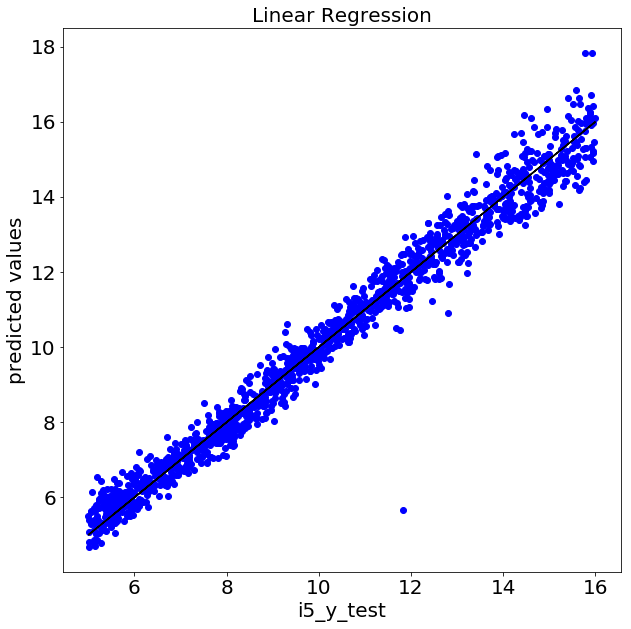

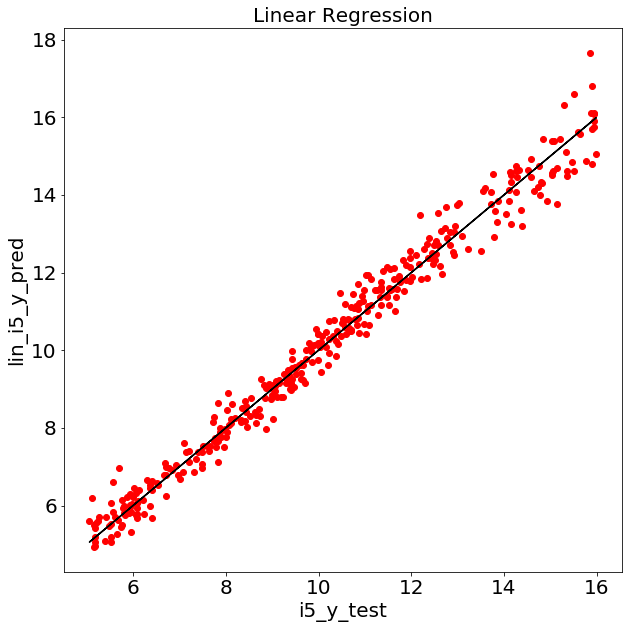

In [185]:
from sklearn.linear_model import LinearRegression
i5_lin_regressor=LinearRegression()
i5_lin_regressor.fit(i5_x_train,i5_y_train)
#Predicting y_test
lin_i5_y_pred=i5_lin_regressor.predict(i5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i5_y_train, i5_lin_regressor.predict(i5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i5_y_train, i5_lin_regressor.predict(i5_x_train)))
print('R2 score = %.2f' %r2_score(i5_y_test, lin_i5_y_pred))
print('MSE = %.2f' %mean_squared_error(i5_y_test, lin_i5_y_pred))
#Plot for trainining results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i5_y_test',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i5_y_train,i5_lin_regressor.predict(i5_x_train), color='b')
plt.plot(i5_y_train,i5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i5_y_test',fontsize=20)
plt.ylabel('lin_i5_y_pred',fontsize=20)
plt.scatter(i5_y_test,lin_i5_y_pred, color='r')
plt.plot(i5_y_test,i5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.97
MSE = 0.30


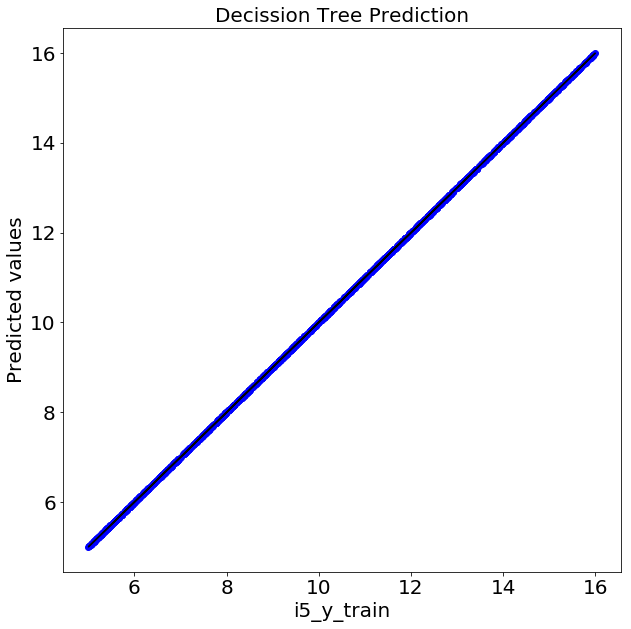

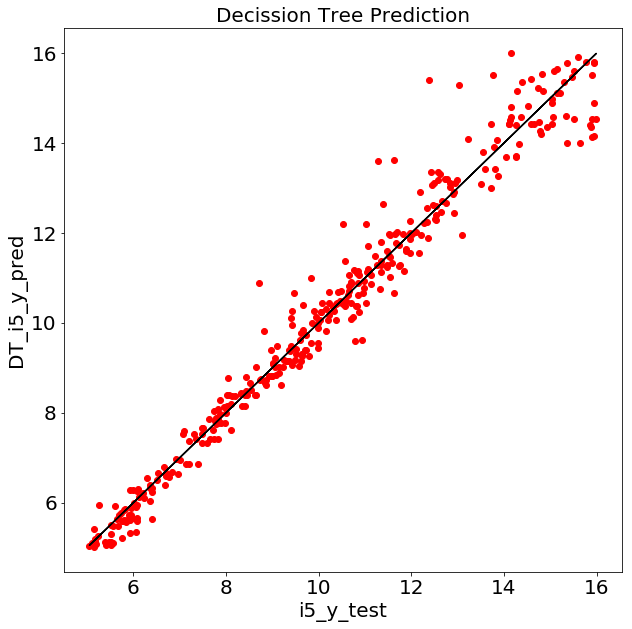

In [186]:
from sklearn.tree import DecisionTreeRegressor
i5_DT_regressor = DecisionTreeRegressor(random_state=0)
i5_DT_regressor.fit(i5_x_train,i5_y_train)
#Predicting y_test
DT_i5_y_pred = i5_DT_regressor.predict(i5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i5_y_train, i5_DT_regressor.predict(i5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i5_y_train, i5_DT_regressor.predict(i5_x_train)))
print('R2 score = %.2f' %r2_score(i5_y_test, DT_i5_y_pred))
print('MSE = %.2f' %mean_squared_error(i5_y_test, DT_i5_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i5_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i5_y_train,i5_DT_regressor.predict(i5_x_train), color='b')
plt.plot(i5_y_train,i5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i5_y_test',fontsize=20)
plt.ylabel('DT_i5_y_pred',fontsize=20)
plt.scatter(i5_y_test,DT_i5_y_pred, color='r')
plt.plot(i5_y_test,i5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 1.00
MSE on train set= 0.03
R2 score = 0.98
MSE = 0.16


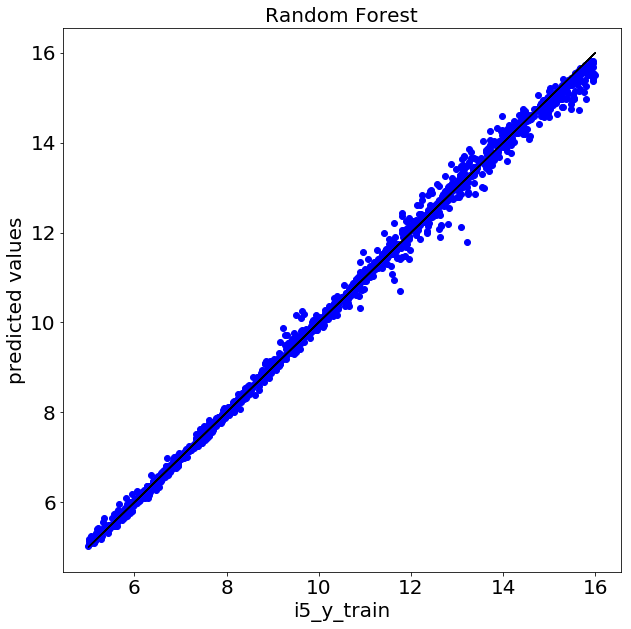

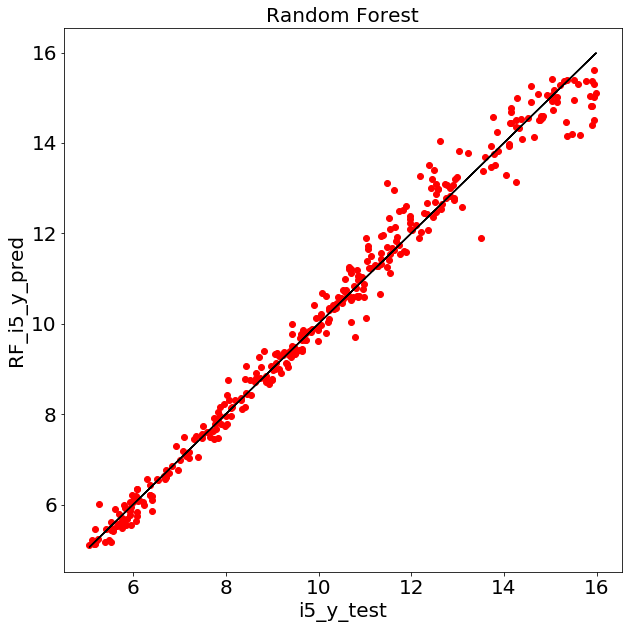

In [187]:
from sklearn.ensemble import RandomForestRegressor
i5_RF_regressor= RandomForestRegressor(n_estimators=300)
i5_RF_regressor.fit(i5_x_train,i5_y_train)
#predicting y_test
RF_i5_y_pred= i5_RF_regressor.predict(i5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i5_y_train, i5_RF_regressor.predict(i5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i5_y_train, i5_RF_regressor.predict(i5_x_train)))
print('R2 score = %.2f' %r2_score(i5_y_test, RF_i5_y_pred))
print('MSE = %.2f' %mean_squared_error(i5_y_test, RF_i5_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i5_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i5_y_train,i5_RF_regressor.predict(i5_x_train), color='b')
plt.plot(i5_y_train,i5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i5_y_test',fontsize=20)
plt.ylabel('RF_i5_y_pred',fontsize=20)
plt.scatter(i5_y_test,i5_RF_regressor.predict(i5_x_test), color='r')
plt.plot(i5_y_test,i5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

# Training only using (1,2) voltages

In [188]:
# Creating Matrix of features and dependent variables
i6_x=np.log(abs(i6.iloc[:,i6.columns != 'i_thickness']))
i6_y=i6.iloc[:,-1:] # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i6_x_train, i6_x_test, i6_y_train, i6_y_test = train_test_split(i6_x,i6_y,test_size=0.2, random_state=0)


/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.01
MSE on train set= 9.68
R2 score = 0.00
MSE = 8.88


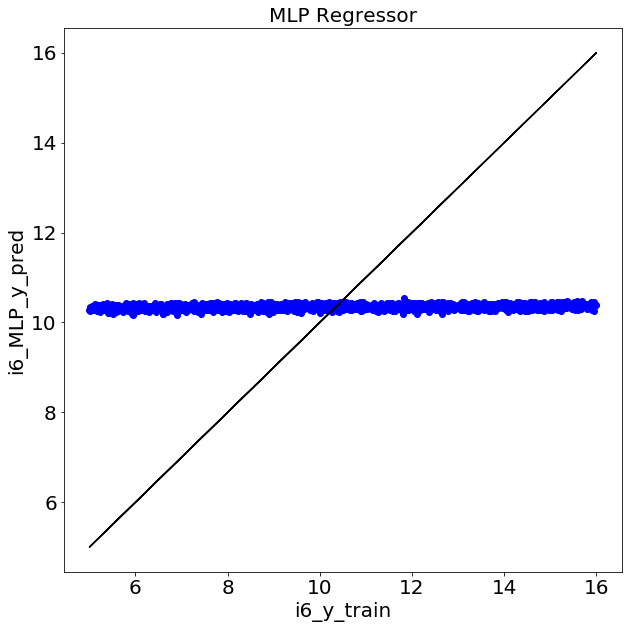

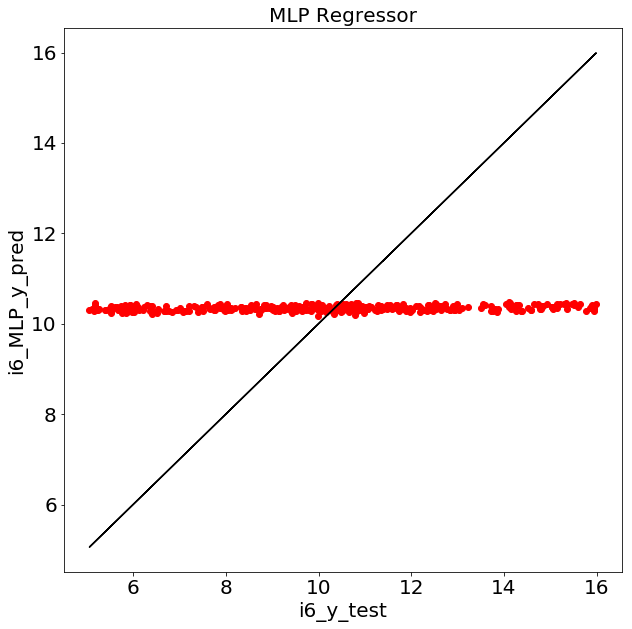

In [189]:
from sklearn.neural_network import MLPRegressor
i6_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i6_MLP_regressor.fit(i6_x_train,i6_y_train)
# Predicting output for x_test 
i6_MLP_y_pred = i6_MLP_regressor.predict(i6_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i6_y_train, i6_MLP_regressor.predict(i6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i6_y_train, i6_MLP_regressor.predict(i6_x_train)))
print('R2 score = %.2f' %r2_score(i6_y_test, i6_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i6_y_test, i6_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i6_y_train',fontsize=20)
plt.ylabel('i6_MLP_y_pred',fontsize=20)
plt.scatter(i6_y_train,i6_MLP_regressor.predict(i6_x_train), color='b')
plt.plot(i6_y_train,i6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i6_y_test',fontsize=20)
plt.ylabel('i6_MLP_y_pred',fontsize=20)
plt.scatter(i6_y_test,i6_MLP_regressor.predict(i6_x_test), color='r')
plt.plot(i6_y_test,i6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.99
MSE on train set= 0.12
R2 score = 0.99
MSE = 0.13


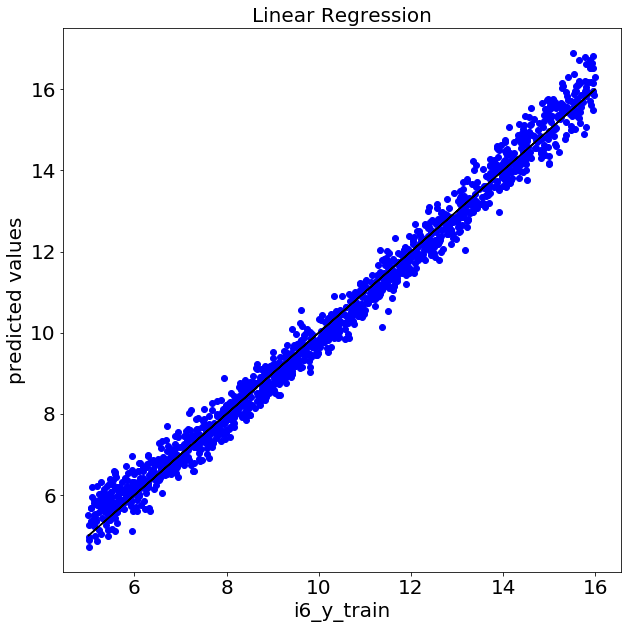

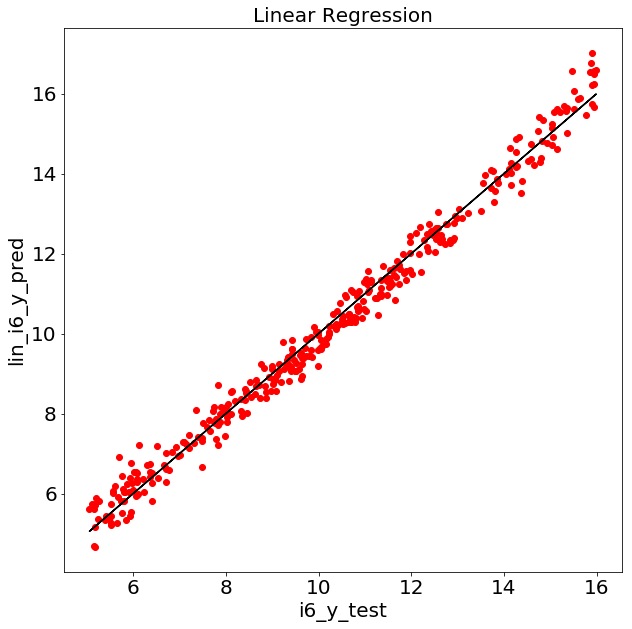

In [190]:
from sklearn.linear_model import LinearRegression
i6_lin_regressor=LinearRegression()
i6_lin_regressor.fit(i6_x_train,i6_y_train)
#Predictiing y_test
lin_i6_y_pred=i6_lin_regressor.predict(i6_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i6_y_train, i6_lin_regressor.predict(i6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i6_y_train, i6_lin_regressor.predict(i6_x_train)))
print('R2 score = %.2f' %r2_score(i6_y_test, lin_i6_y_pred))
print('MSE = %.2f' %mean_squared_error(i6_y_test, lin_i6_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i6_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i6_y_train,i6_lin_regressor.predict(i6_x_train), color='b')
plt.plot(i6_y_train,i6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i6_y_test',fontsize=20)
plt.ylabel('lin_i6_y_pred',fontsize=20)
plt.scatter(i6_y_test,lin_i6_y_pred, color='r')
plt.plot(i6_y_test,i6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

#####NOTE: Initial values in picture : Very good improvement

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.34
MSE = 11.90


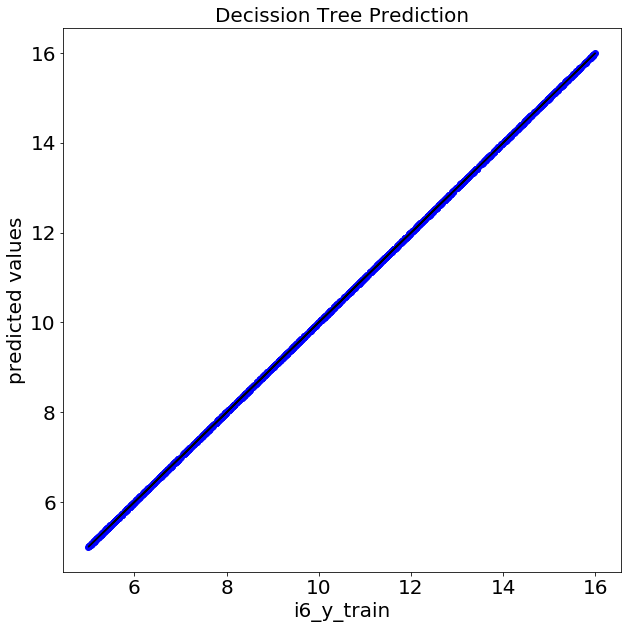

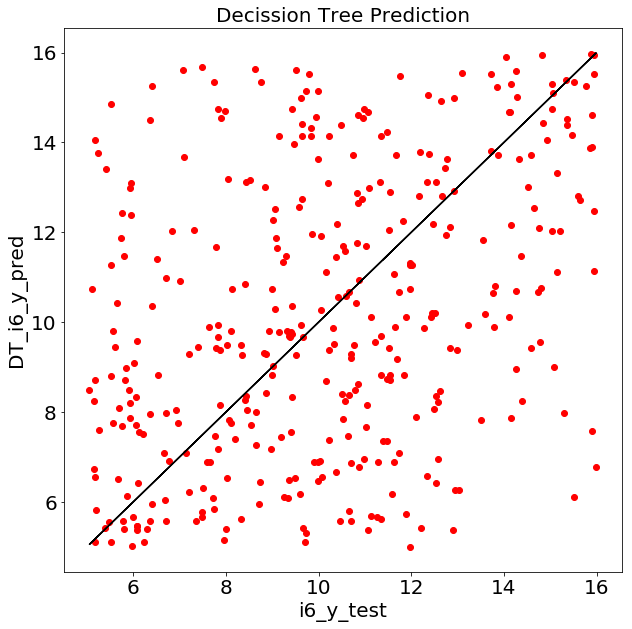

In [191]:
from sklearn.tree import DecisionTreeRegressor
i6_DT_regressor = DecisionTreeRegressor(random_state=0)
i6_DT_regressor.fit(i6_x_train,i6_y_train)
#Predicting y_test
DT_i6_y_pred = i6_DT_regressor.predict(i6_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i6_y_train, i6_DT_regressor.predict(i6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i6_y_train, i6_DT_regressor.predict(i6_x_train)))
print('R2 score = %.2f' %r2_score(i6_y_test, DT_i6_y_pred))
print('MSE = %.2f' %mean_squared_error(i6_y_test, DT_i6_y_pred))
#Plot for trainng results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i6_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i6_y_train,i6_DT_regressor.predict(i6_x_train), color='b')
plt.plot(i6_y_train,i6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i6_y_test',fontsize=20)
plt.ylabel('DT_i6_y_pred',fontsize=20)
plt.scatter(i6_y_test,DT_i6_y_pred, color='r')
plt.plot(i6_y_test,i6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 0.89
MSE on train set= 1.04
R2 score = 0.21
MSE = 7.00


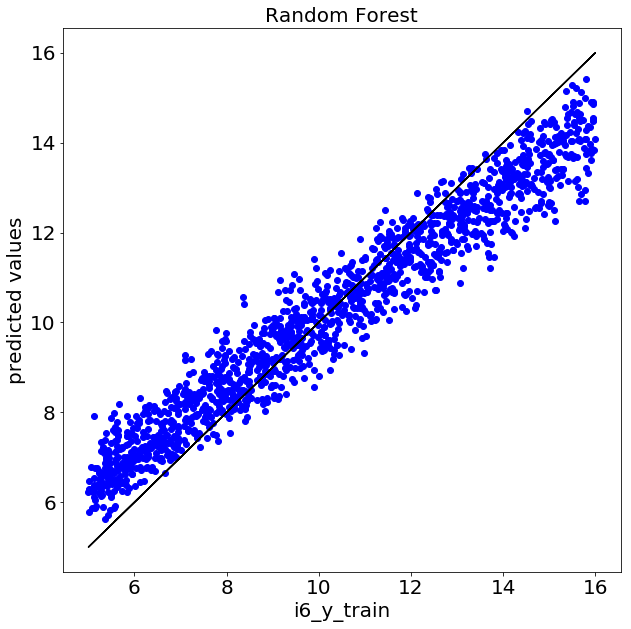

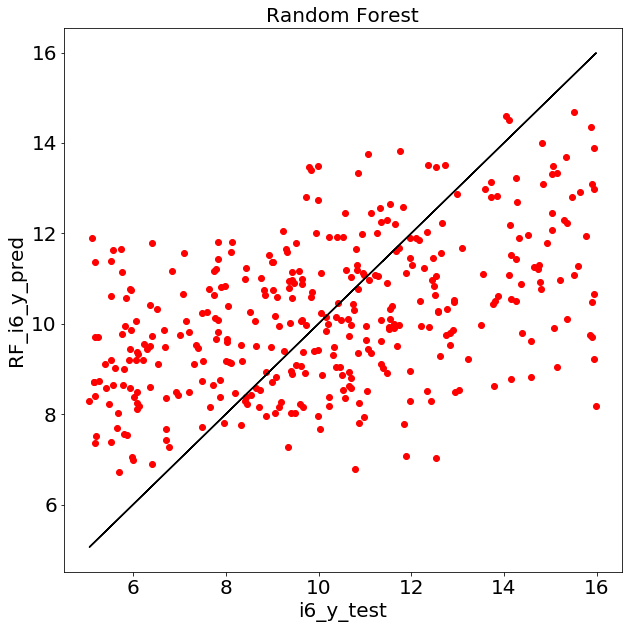

In [192]:
from sklearn.ensemble import RandomForestRegressor
i6_RF_regressor= RandomForestRegressor(n_estimators=300)
i6_RF_regressor.fit(i6_x_train,i6_y_train)
#Predicting y_test
RF_i6_y_pred= i6_RF_regressor.predict(i6_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i6_y_train, i6_RF_regressor.predict(i6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i6_y_train, i6_RF_regressor.predict(i6_x_train)))
print('R2 score = %.2f' %r2_score(i6_y_test, RF_i6_y_pred))
print('MSE = %.2f' %mean_squared_error(i6_y_test, RF_i6_y_pred))
#Plot for training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i6_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i6_y_train,i6_RF_regressor.predict(i6_x_train), color='b')
plt.plot(i6_y_train,i6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i6_y_test',fontsize=20)
plt.ylabel('RF_i6_y_pred',fontsize=20)
plt.scatter(i6_y_test,i6_RF_regressor.predict(i6_x_test), color='r')
plt.plot(i6_y_test,i6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [193]:
# training for voltages between (0,2)
# Creating Matrix of features and dependent variables
i7_x=np.log(abs(i7.iloc[:,i7.columns != 'i_thickness']))
i7_y=i7.iloc[:,-1:]# only the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
i7_x_train, i7_x_test, i7_y_train, i7_y_test = train_test_split(i7_x,i7_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.91
MSE on train set= 0.86
R2 score = 0.90
MSE = 0.88


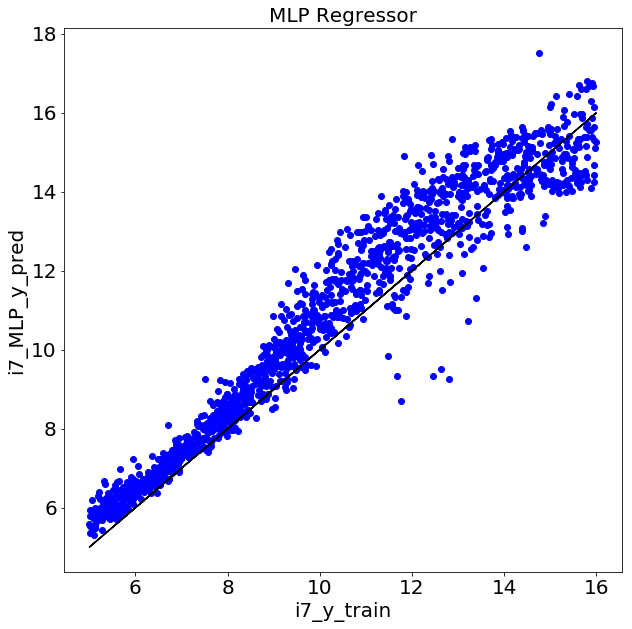

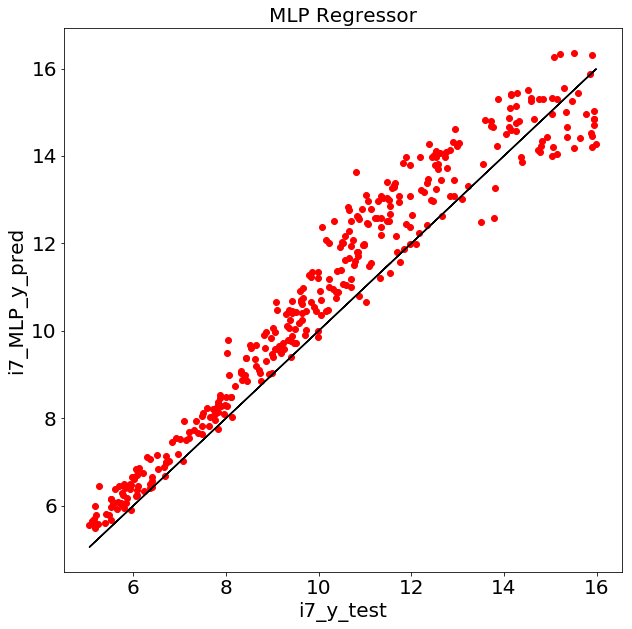

In [194]:
from sklearn.neural_network import MLPRegressor
i7_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
i7_MLP_regressor.fit(i7_x_train,i7_y_train)
# Predicting output for x_test 
i7_MLP_y_pred = i7_MLP_regressor.predict(i7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i7_y_train, i7_MLP_regressor.predict(i7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i7_y_train, i7_MLP_regressor.predict(i7_x_train)))
print('R2 score = %.2f' %r2_score(i7_y_test, i7_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(i7_y_test, i7_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i7_y_train',fontsize=20)
plt.ylabel('i7_MLP_y_pred',fontsize=20)
plt.scatter(i7_y_train,i7_MLP_regressor.predict(i7_x_train), color='b')
plt.plot(i7_y_train,i7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('i7_y_test',fontsize=20)
plt.ylabel('i7_MLP_y_pred',fontsize=20)
plt.scatter(i7_y_test,i7_MLP_regressor.predict(i7_x_test), color='r')
plt.plot(i7_y_test,i7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.99
MSE on train set= 0.09
R2 score = 0.99
MSE = 0.09


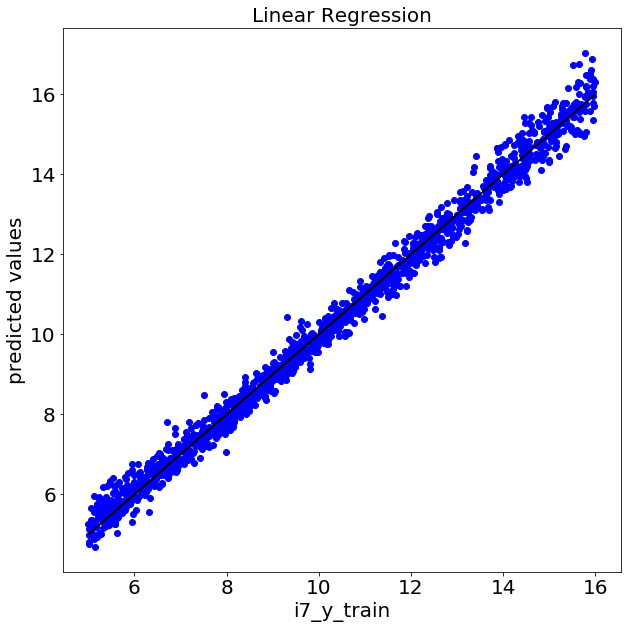

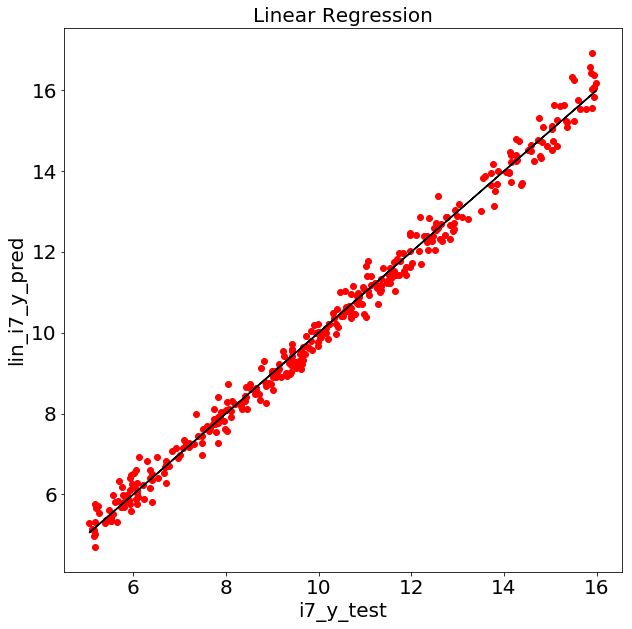

In [195]:
#Linear Regression
from sklearn.linear_model import LinearRegression
i7_lin_regressor=LinearRegression()
i7_lin_regressor.fit(i7_x_train,i7_y_train)
#Predicting y_test
lin_i7_y_pred=i7_lin_regressor.predict(i7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i7_y_train, i7_lin_regressor.predict(i7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i7_y_train, i7_lin_regressor.predict(i7_x_train)))
print('R2 score = %.2f' %r2_score(i7_y_test, lin_i7_y_pred))
print('MSE = %.2f' %mean_squared_error(i7_y_test, lin_i7_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i7_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(i7_y_train,i7_lin_regressor.predict(i7_x_train), color='b')
plt.plot(i7_y_train,i7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('i7_y_test',fontsize=20)
plt.ylabel('lin_i7_y_pred',fontsize=20)
plt.scatter(i7_y_test,lin_i7_y_pred, color='r')
plt.plot(i7_y_test,i7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#####NOTE: Improvement : Outlier got removed

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.97
MSE = 0.29


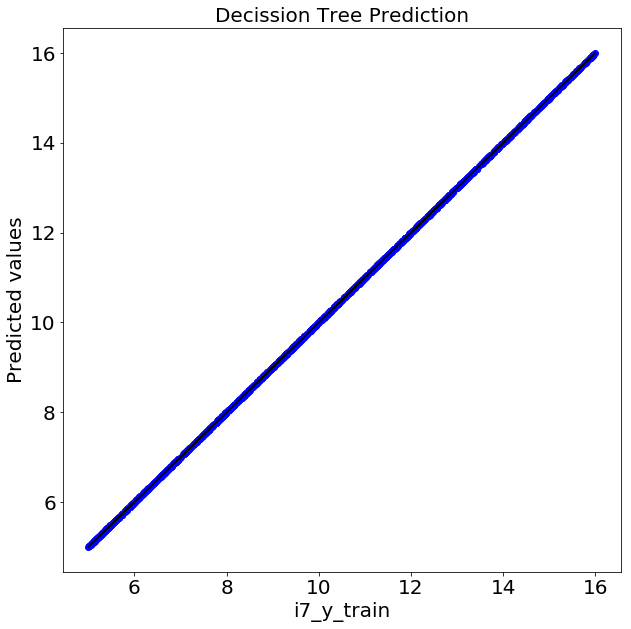

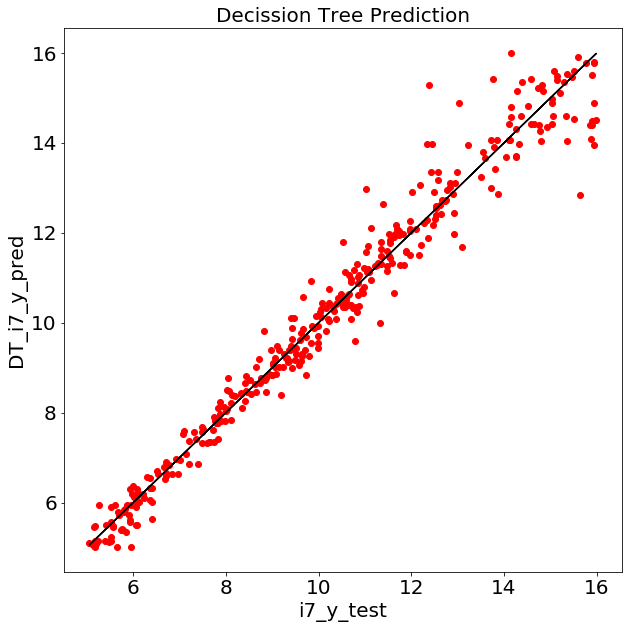

In [196]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
i7_DT_regressor = DecisionTreeRegressor(random_state=0)
i7_DT_regressor.fit(i7_x_train,i7_y_train)
#prdicting y_test
DT_i7_y_pred = i7_DT_regressor.predict(i7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i7_y_train, i7_DT_regressor.predict(i7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i7_y_train, i7_DT_regressor.predict(i7_x_train)))
print('R2 score = %.2f' %r2_score(i7_y_test, DT_i7_y_pred))
print('MSE = %.2f' %mean_squared_error(i7_y_test, DT_i7_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i7_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i7_y_train,i7_DT_regressor.predict(i7_x_train), color='b')
plt.plot(i7_y_train,i7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('i7_y_test',fontsize=20)
plt.ylabel('DT_i7_y_pred',fontsize=20)
plt.scatter(i7_y_test,DT_i7_y_pred, color='r')
plt.plot(i7_y_test,i7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#### NOTE: Improvement

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 1.00
MSE on train set= 0.03
R2 score = 0.98
MSE = 0.18


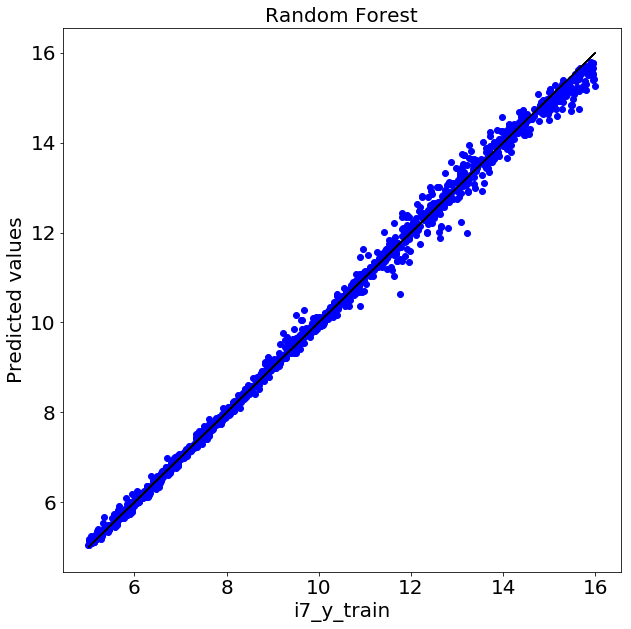

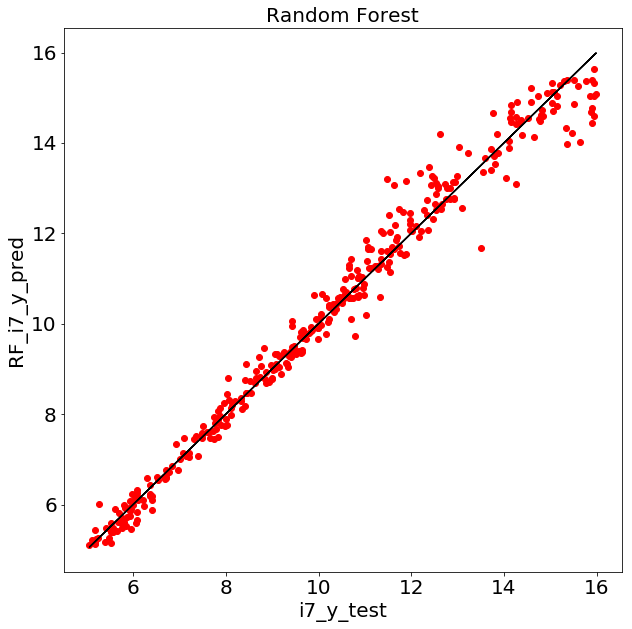

In [197]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
i7_RF_regressor= RandomForestRegressor(n_estimators=300)
i7_RF_regressor.fit(i7_x_train,i7_y_train)
#predicting y_test
RF_i7_y_pred= i7_RF_regressor.predict(i7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(i7_y_train, i7_RF_regressor.predict(i7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(i7_y_train, i7_RF_regressor.predict(i7_x_train)))
print('R2 score = %.2f' %r2_score(i7_y_test, RF_i7_y_pred))
print('MSE = %.2f' %mean_squared_error(i7_y_test, RF_i7_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i7_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(i7_y_train,i7_RF_regressor.predict(i7_x_train), color='b')
plt.plot(i7_y_train,i7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('i7_y_test',fontsize=20)
plt.ylabel('RF_i7_y_pred',fontsize=20)
plt.scatter(i7_y_test,i7_RF_regressor.predict(i7_x_test), color='r')
plt.plot(i7_y_test,i7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
####################
##NOTE: IMprovement

# TRAINING FOR N TYPE

In [198]:
N1=pd.concat([s1,thickness_col['n_thickness']], axis=1) # axis=1 to make sure that no duplicate items are created and columns added to columns but not as rows.
N2=pd.concat([s2,thickness_col['n_thickness']], axis=1)
N3=pd.concat([s3,thickness_col['n_thickness']], axis=1)
N4=pd.concat([s4,thickness_col['n_thickness']], axis=1)
N5=pd.concat([s5,thickness_col['n_thickness']], axis=1)
N6=pd.concat([s6,thickness_col['n_thickness']], axis=1)
N7=pd.concat([s7,thickness_col['n_thickness']], axis=1)
N8=pd.concat([s8,thickness_col['n_thickness']], axis=1)

In [199]:
# For (-2,2) voltages

# Creating Matrix of features and dependent variables
N8_x=np.log(abs(N8.iloc[:,N8.columns != 'n_thickness']))
N8_y=N8.iloc[:,-1:]# Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N8_x_train, N8_x_test, N8_y_train, N8_y_test = train_test_split(N8_x,N8_y,test_size=0.2, random_state=0)


/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.44
MSE on train set= 473.75
R2 score = 0.49
MSE = 407.07


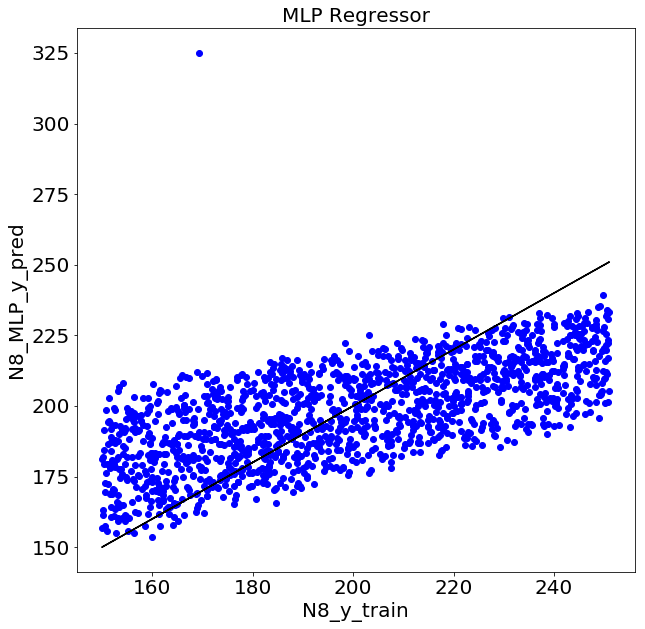

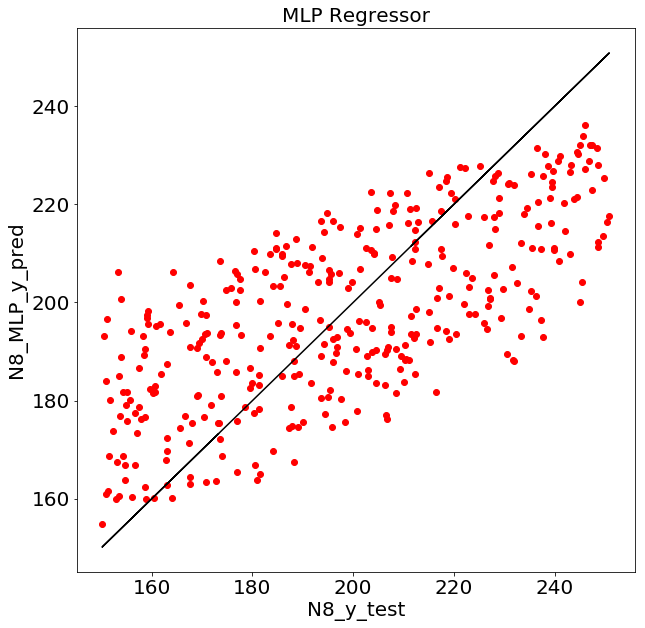

In [200]:
from sklearn.neural_network import MLPRegressor
N8_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N8_MLP_regressor.fit(N8_x_train,N8_y_train)
# Predicting output for x_test 
N8_MLP_y_pred = N8_MLP_regressor.predict(N8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N8_y_train, N8_MLP_regressor.predict(N8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N8_y_train, N8_MLP_regressor.predict(N8_x_train)))
print('R2 score = %.2f' %r2_score(N8_y_test, N8_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N8_y_test, N8_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N8_y_train',fontsize=20)
plt.ylabel('N8_MLP_y_pred',fontsize=20)
plt.scatter(N8_y_train,N8_MLP_regressor.predict(N8_x_train), color='b')
plt.plot(N8_y_train,N8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N8_y_test',fontsize=20)
plt.ylabel('N8_MLP_y_pred',fontsize=20)
plt.scatter(N8_y_test,N8_MLP_regressor.predict(N8_x_test), color='r')
plt.plot(N8_y_test,N8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [ ]:
new_data=pd.read_csv("Enter new dataset name.csv")

new_data_x=np.log(abs(new_data.iloc[:,0:102]))
new_data_y=new_data.iloc[:,103]
N8_MLP_regressor.predict((new_data_x))

R2 score on train set= 1.00
MSE on train set= 0.80
R2 score on test set= 1.00
MSE on test set= 0.86


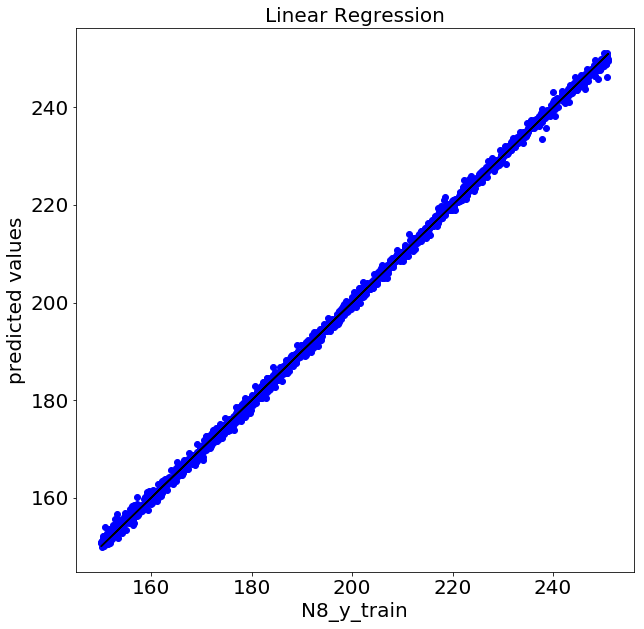

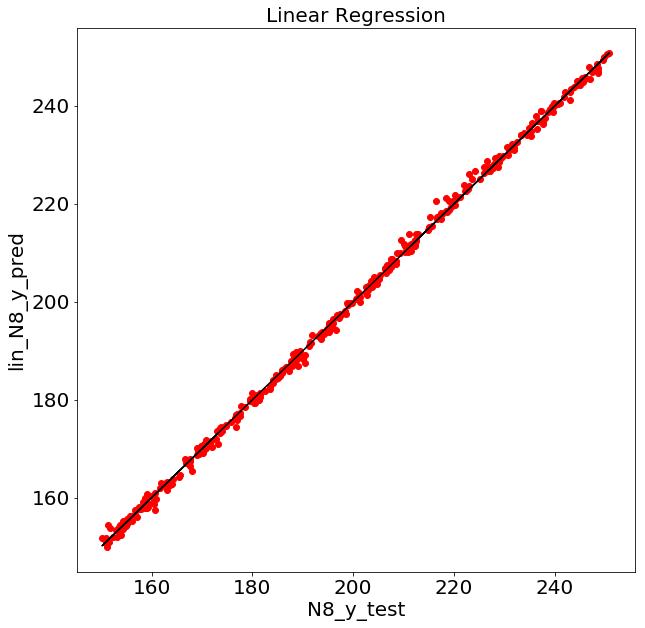

In [201]:
# Linear Regression

from sklearn.linear_model import LinearRegression
N8_lin_regressor=LinearRegression()
N8_lin_regressor.fit(N8_x_train,N8_y_train)
#Predicting y_test
lin_N8_y_pred=N8_lin_regressor.predict(N8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N8_y_train, N8_lin_regressor.predict(N8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N8_y_train, N8_lin_regressor.predict(N8_x_train)))
print('R2 score on test set= %.2f' %r2_score(N8_y_test, lin_N8_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(N8_y_test, lin_N8_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N8_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(N8_y_train,N8_lin_regressor.predict(N8_x_train), color='b')
plt.plot(N8_y_train,N8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N8_y_test',fontsize=20)
plt.ylabel('lin_N8_y_pred',fontsize=20)
plt.scatter(N8_y_test,lin_N8_y_pred, color='r')
plt.plot(N8_y_test,N8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [ ]:
new_data=pd.read_csv("Enter new dataset name.csv")

new_data_x=np.log(abs(new_data.iloc[:,0:102]))
new_data_y=new_data.iloc[:,103]
N8_lin_regressor.predict((new_data_x))

R2 score on train set= 0.90
MSE on train set= 86.91
R2 score = 0.70
MSE = 236.30


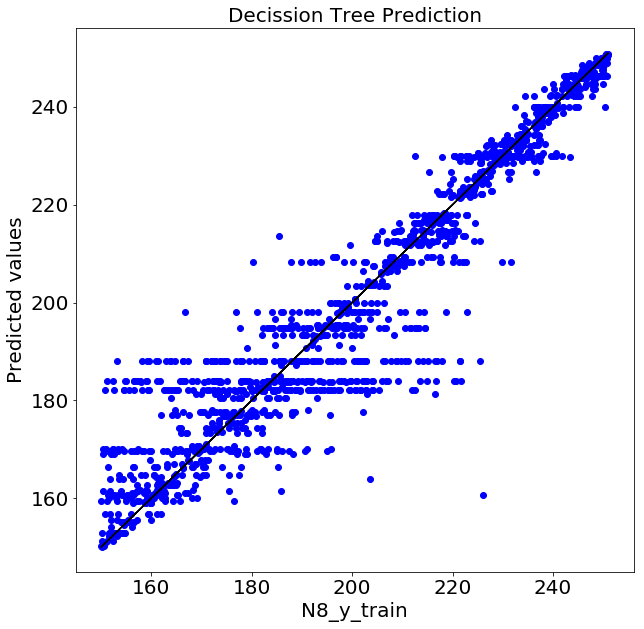

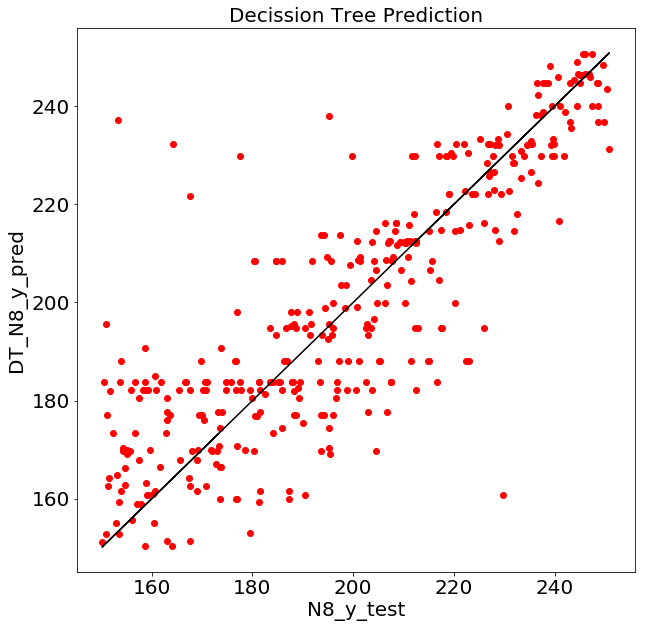

In [202]:
####DECISION TREE
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
N8_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
N8_DT_regressor.fit(N8_x_train,N8_y_train)
#prdicting y_test
DT_N8_y_pred = N8_DT_regressor.predict(N8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N8_y_train, N8_DT_regressor.predict(N8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N8_y_train, N8_DT_regressor.predict(N8_x_train)))
print('R2 score = %.2f' %r2_score(N8_y_test, DT_N8_y_pred))
print('MSE = %.2f' %mean_squared_error(N8_y_test, DT_N8_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N8_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(N8_y_train,N8_DT_regressor.predict(N8_x_train), color='b')
plt.plot(N8_y_train,N8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N8_y_test',fontsize=20)
plt.ylabel('DT_N8_y_pred',fontsize=20)
plt.scatter(N8_y_test,DT_N8_y_pred, color='r')
plt.plot(N8_y_test,N8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.97
MSE on train set= 22.40
R2 score = 0.80
MSE = 161.71


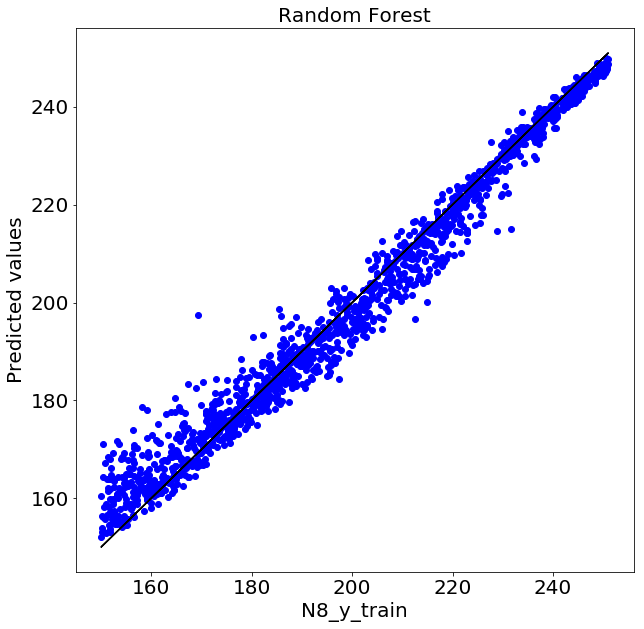

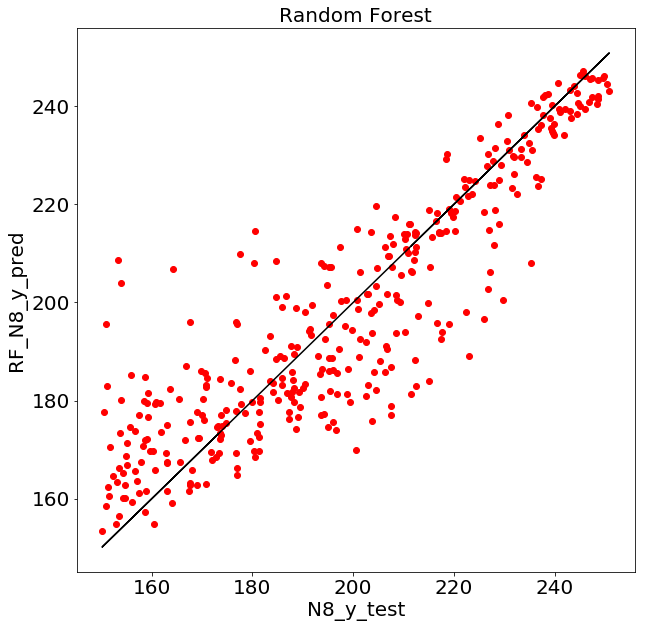

In [203]:
#####Random Forest
from sklearn.ensemble import RandomForestRegressor
N8_RF_regressor= RandomForestRegressor(n_estimators=300)
N8_RF_regressor.fit(N8_x_train,N8_y_train)
#predicting y_test
RF_N8_y_pred= N8_RF_regressor.predict(N8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N8_y_train, N8_RF_regressor.predict(N8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N8_y_train, N8_RF_regressor.predict(N8_x_train)))
print('R2 score = %.2f' %r2_score(N8_y_test, RF_N8_y_pred))
print('MSE = %.2f' %mean_squared_error(N8_y_test, RF_N8_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N8_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(N8_y_train,N8_RF_regressor.predict(N8_x_train), color='b')
plt.plot(N8_y_train,N8_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N8_y_test',fontsize=20)
plt.ylabel('RF_N8_y_pred',fontsize=20)
plt.scatter(N8_y_test,N8_RF_regressor.predict(N8_x_test), color='r')
plt.plot(N8_y_test,N8_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [204]:
# Creating Matrix of features and dependent variables
N1_x=np.log(abs(N1.iloc[:,N1.columns != 'n_thickness']))
N1_y=N1.iloc[:,-1:].values # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N1_x_train, N1_x_test, N1_y_train, N1_y_test = train_test_split(N1_x,N1_y,test_size=0.2, random_state=0)


/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= -0.00
MSE on train set= 847.45
R2 score = -0.00
MSE = 796.95


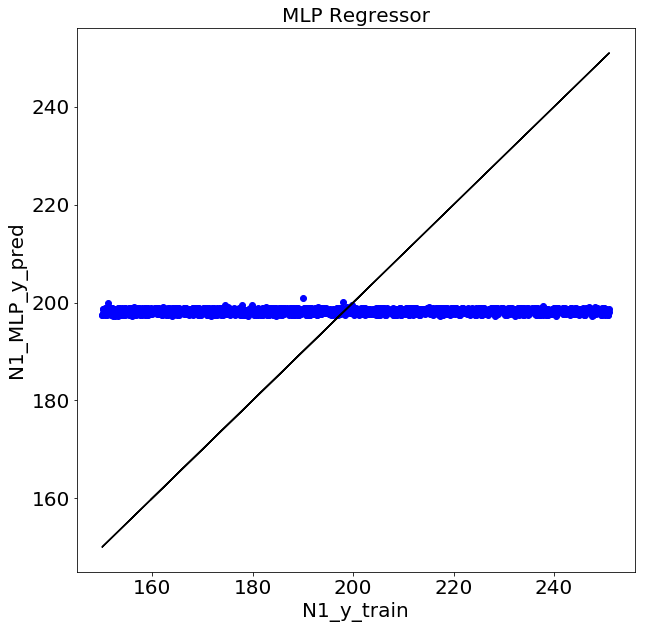

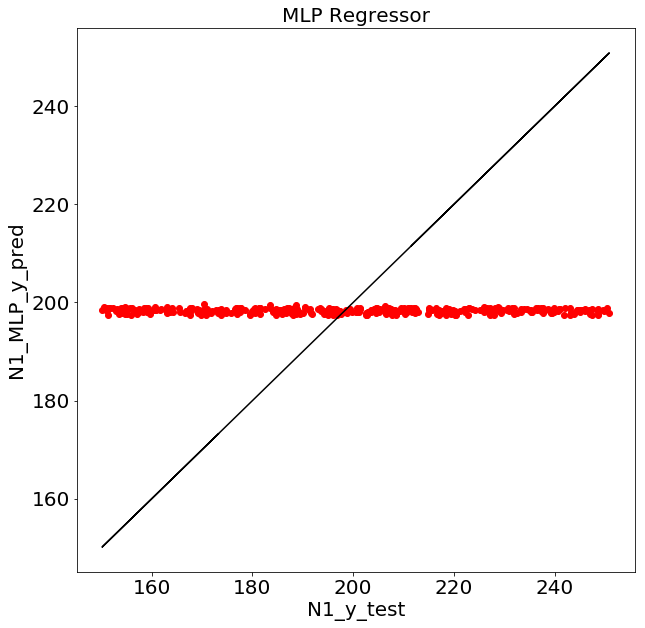

In [205]:
from sklearn.neural_network import MLPRegressor
N1_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N1_MLP_regressor.fit(N1_x_train,N1_y_train)
# Predicting output for x_test 
N1_MLP_y_pred = N1_MLP_regressor.predict(N1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N1_y_train, N1_MLP_regressor.predict(N1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N1_y_train, N1_MLP_regressor.predict(N1_x_train)))
print('R2 score = %.2f' %r2_score(N1_y_test, N1_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N1_y_test, N1_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N1_y_train',fontsize=20)
plt.ylabel('N1_MLP_y_pred',fontsize=20)
plt.scatter(N1_y_train,N1_MLP_regressor.predict(N1_x_train), color='b')
plt.plot(N1_y_train,N1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N1_y_test',fontsize=20)
plt.ylabel('N1_MLP_y_pred',fontsize=20)
plt.scatter(N1_y_test,N1_MLP_regressor.predict(N1_x_test), color='r')
plt.plot(N1_y_test,N1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.00
MSE on train set= 846.94
R2 score = 0.00
MSE = 795.55


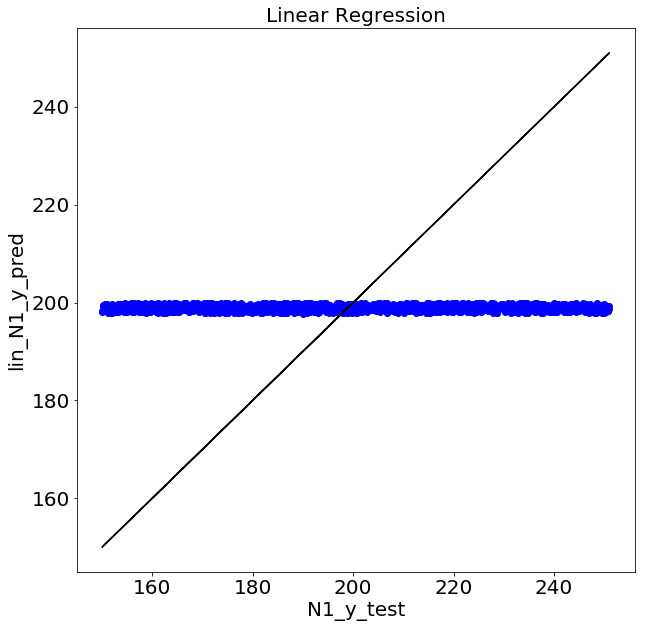

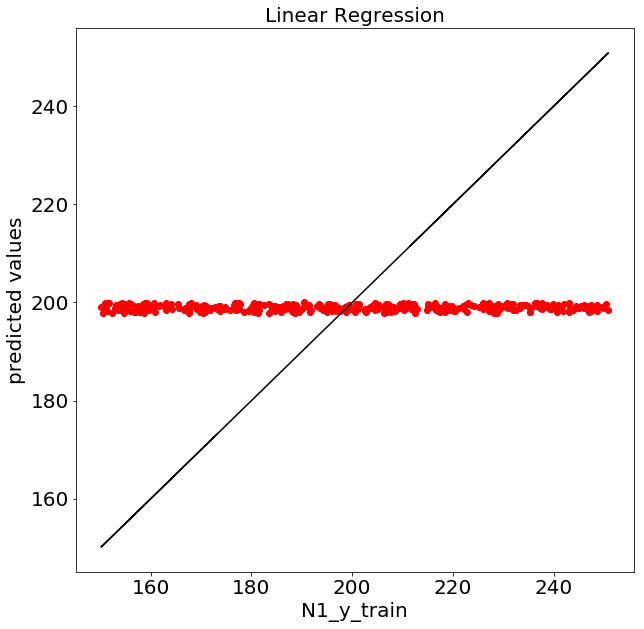

In [206]:
from sklearn.linear_model import LinearRegression
N1_lin_regressor=LinearRegression()
N1_lin_regressor.fit(N1_x_train,N1_y_train)
#Predicting y_test
lin_N1_y_pred=N1_lin_regressor.predict(N1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N1_y_train, N1_lin_regressor.predict(N1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N1_y_train, N1_lin_regressor.predict(N1_x_train)))
print('R2 score = %.2f' %r2_score(N1_y_test, lin_N1_y_pred))
print('MSE = %.2f' %mean_squared_error(N1_y_test, lin_N1_y_pred))
#Plot fo training results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N1_y_test',fontsize=20)
plt.ylabel('lin_N1_y_pred',fontsize=20)
plt.scatter(N1_y_train,N1_lin_regressor.predict(N1_x_train), color='b')
plt.plot(N1_y_train,N1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot fo test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N1_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(N1_y_test,lin_N1_y_pred, color='r')
plt.plot(N1_y_test,N1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -1.19
MSE = 1741.54


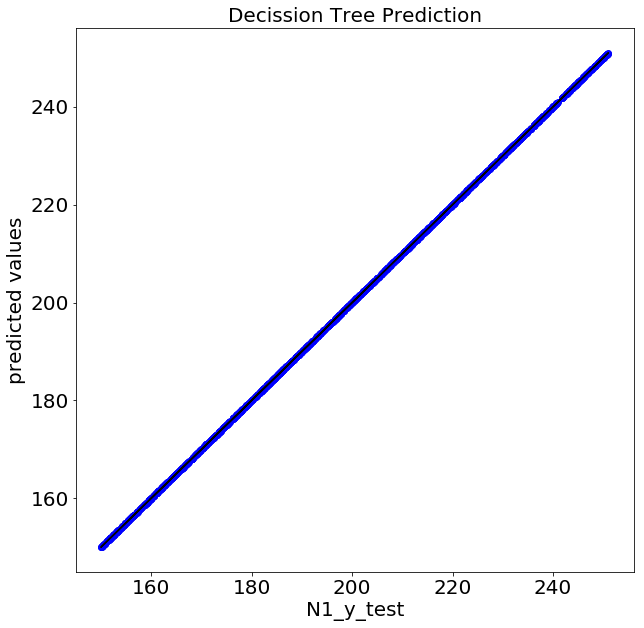

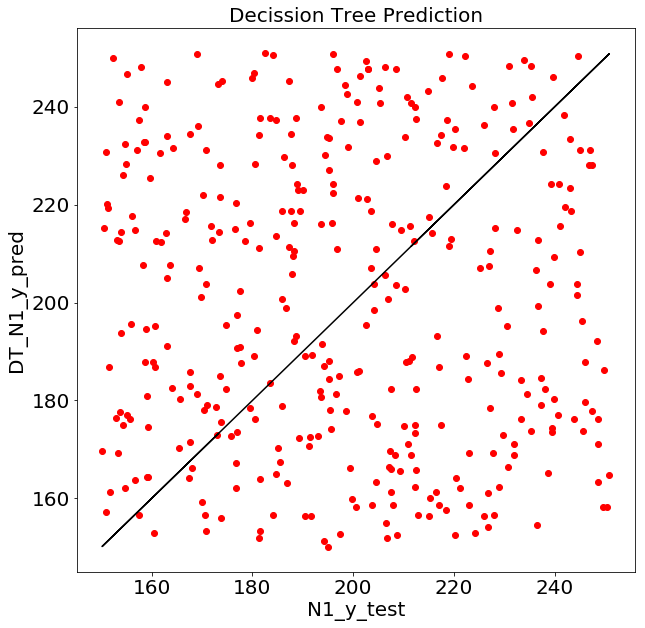

In [207]:
from sklearn.tree import DecisionTreeRegressor
N1_DT_regressor = DecisionTreeRegressor(random_state=0)
N1_DT_regressor.fit(N1_x_train,N1_y_train)
DT_N1_y_pred = N1_DT_regressor.predict(N1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N1_y_train, N1_DT_regressor.predict(N1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N1_y_train, N1_DT_regressor.predict(N1_x_train)))
print('R2 score = %.2f' %r2_score(N1_y_test, DT_N1_y_pred))
print('MSE = %.2f' %mean_squared_error(N1_y_test, DT_N1_y_pred))
#plot for training resul;ts
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N1_y_test',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(N1_y_train,N1_DT_regressor.predict(N1_x_train), color='b')
plt.plot(N1_y_train,N1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#plot for test resul;ts
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N1_y_test',fontsize=20)
plt.ylabel('DT_N1_y_pred',fontsize=20)
plt.scatter(N1_y_test,DT_N1_y_pred, color='r')
plt.plot(N1_y_test,N1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


R2 score on train set= 0.81
MSE on train set= 162.01
R2 score = -0.58
MSE = 1260.60


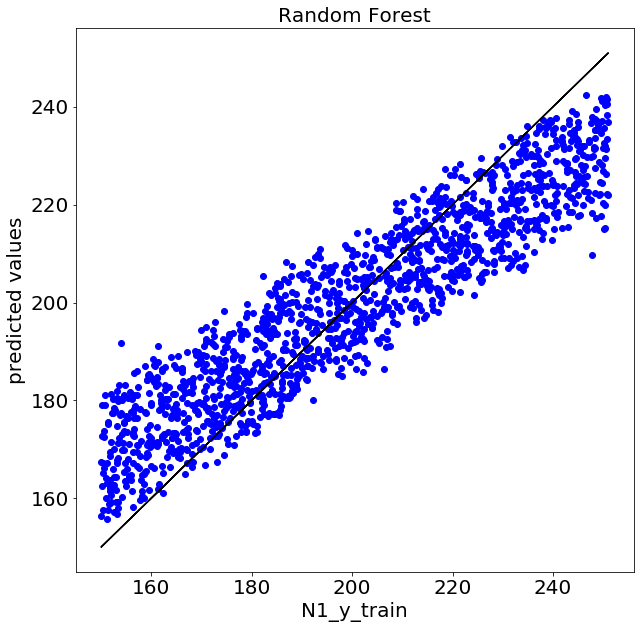

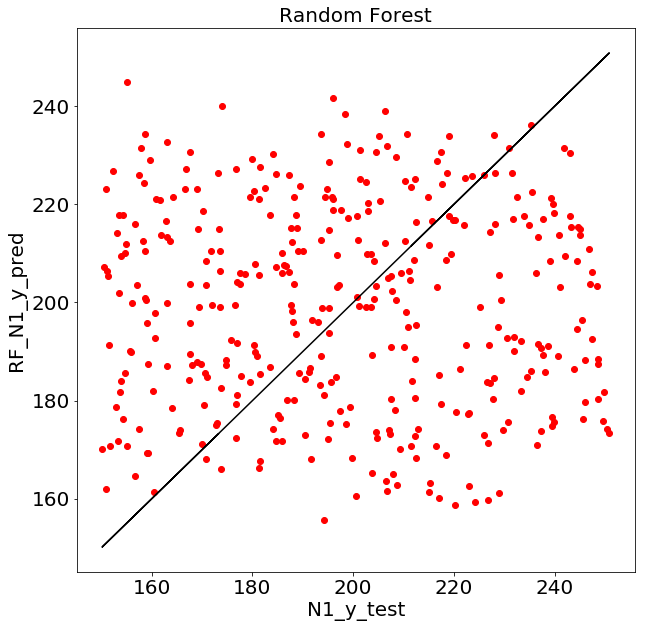

In [208]:
from sklearn.ensemble import RandomForestRegressor
N1_RF_regressor= RandomForestRegressor(n_estimators=300)
N1_RF_regressor.fit(N1_x_train,N1_y_train)
RF_N1_y_pred= N1_RF_regressor.predict(N1_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N1_y_train, N1_RF_regressor.predict(N1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N1_y_train, N1_RF_regressor.predict(N1_x_train)))
print('R2 score = %.2f' %r2_score(N1_y_test, RF_N1_y_pred))
print('MSE = %.2f' %mean_squared_error(N1_y_test, RF_N1_y_pred))
# plot for training set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N1_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(N1_y_train,N1_RF_regressor.predict(N1_x_train), color='b')
plt.plot(N1_y_train,N1_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N1_y_test',fontsize=20)
plt.ylabel('RF_N1_y_pred',fontsize=20)
plt.scatter(N1_y_test,N1_RF_regressor.predict(N1_x_test), color='r')
plt.plot(N1_y_test,N1_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [209]:
# Training for (-2,-1) voltages
# Creating Matrix of features and dependent variables
N2_x=np.log(abs(N2.iloc[:,N2.columns != 'n_thickness']))
N2_y=N2.iloc[:,-1:].values # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N2_x_train, N2_x_test, N2_y_train, N2_y_test = train_test_split(N2_x,N2_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= -0.05
MSE on train set= 885.46
R2 score = -0.07
MSE = 852.04


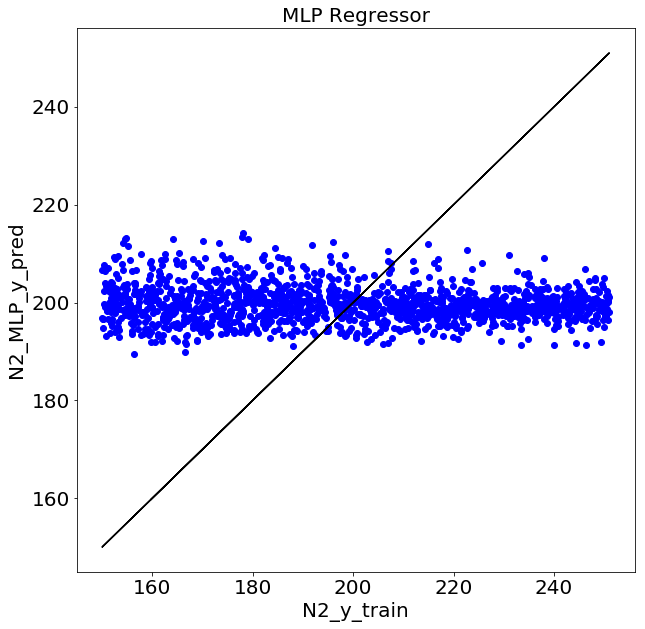

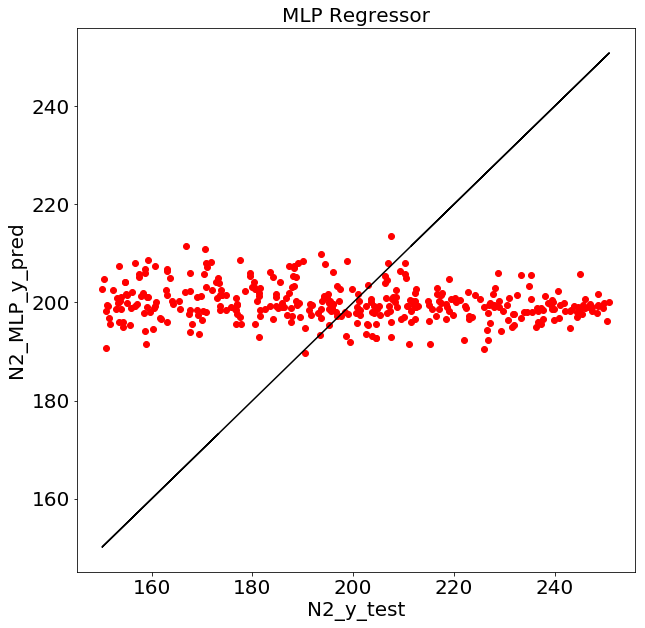

In [210]:
from sklearn.neural_network import MLPRegressor
N2_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N2_MLP_regressor.fit(N2_x_train,N2_y_train)
# Predicting output for x_test 
N2_MLP_y_pred = N2_MLP_regressor.predict(N2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N2_y_train, N2_MLP_regressor.predict(N2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N2_y_train, N2_MLP_regressor.predict(N2_x_train)))
print('R2 score = %.2f' %r2_score(N2_y_test, N2_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N2_y_test, N2_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N2_y_train',fontsize=20)
plt.ylabel('N2_MLP_y_pred',fontsize=20)
plt.scatter(N2_y_train,N2_MLP_regressor.predict(N2_x_train), color='b')
plt.plot(N2_y_train,N2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N2_y_test',fontsize=20)
plt.ylabel('N2_MLP_y_pred',fontsize=20)
plt.scatter(N2_y_test,N2_MLP_regressor.predict(N2_x_test), color='r')
plt.plot(N2_y_test,N2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.04
MSE on train set= 816.72
R2 score = -0.01
MSE = 800.62


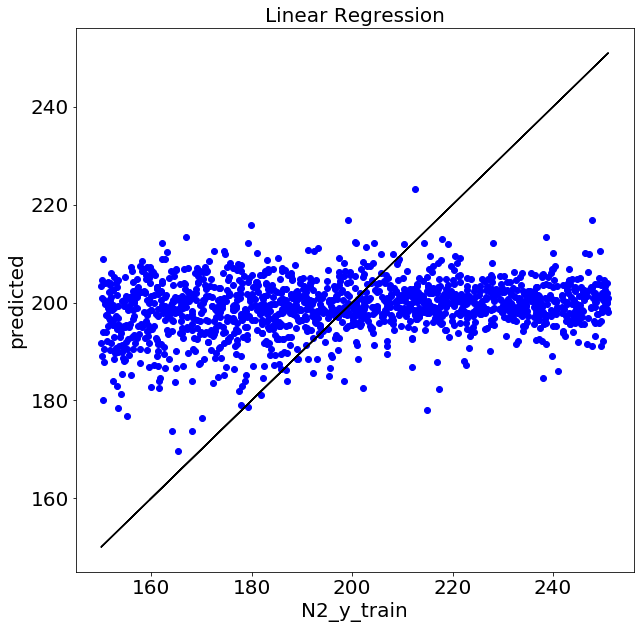

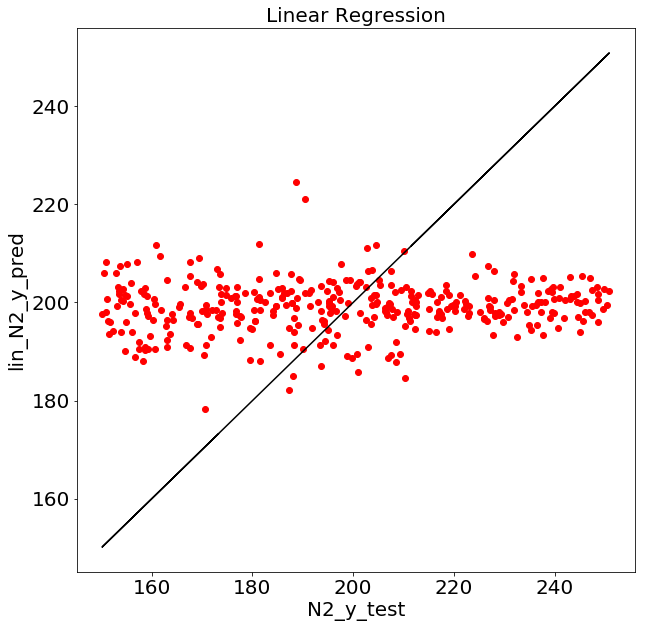

In [211]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N2_lin_regressor=LinearRegression()
N2_lin_regressor.fit(N2_x_train,N2_y_train)
lin_N2_y_pred=N2_lin_regressor.predict(N2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N2_y_train, N2_lin_regressor.predict(N2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N2_y_train, N2_lin_regressor.predict(N2_x_train)))
print('R2 score = %.2f' %r2_score(N2_y_test, lin_N2_y_pred))
print('MSE = %.2f' %mean_squared_error(N2_y_test, lin_N2_y_pred))
#Plot for trainb results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N2_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N2_y_train,N2_lin_regressor.predict(N2_x_train), color='b')
plt.plot(N2_y_train,N2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N2_y_test',fontsize=20)
plt.ylabel('lin_N2_y_pred',fontsize=20)
plt.scatter(N2_y_test,lin_N2_y_pred, color='r')
plt.plot(N2_y_test,N2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.88
MSE = 1499.21


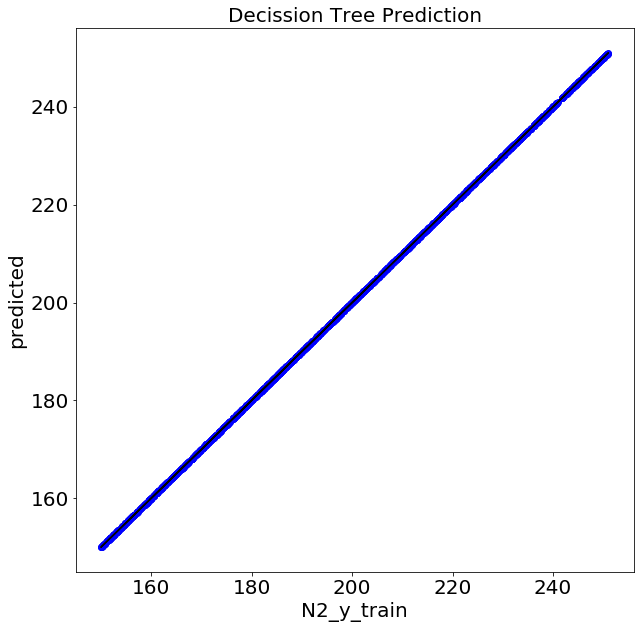

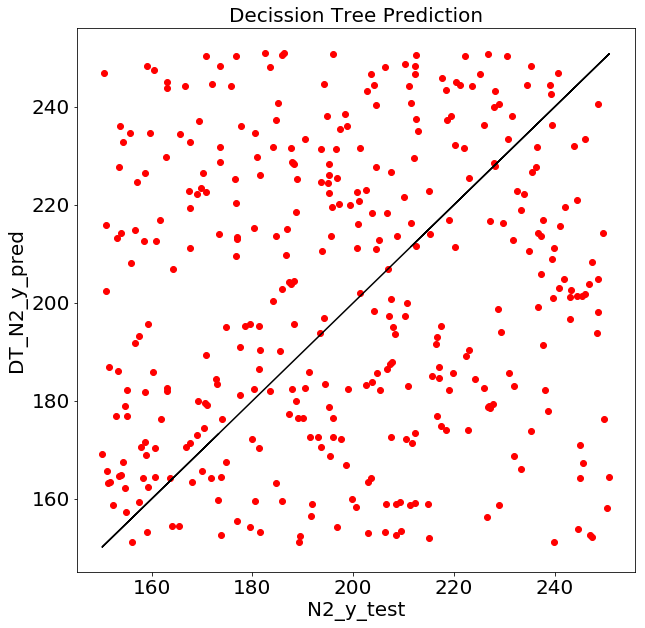

In [212]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
N2_DT_regressor = DecisionTreeRegressor(random_state=0)
N2_DT_regressor.fit(N2_x_train,N2_y_train)
DT_N2_y_pred = N2_DT_regressor.predict(N2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N2_y_train, N2_DT_regressor.predict(N2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N2_y_train, N2_DT_regressor.predict(N2_x_train)))
print('R2 score = %.2f' %r2_score(N2_y_test, DT_N2_y_pred))
print('MSE = %.2f' %mean_squared_error(N2_y_test, DT_N2_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N2_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N2_y_train,N2_DT_regressor.predict(N2_x_train), color='b')
plt.plot(N2_y_train,N2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N2_y_test',fontsize=20)
plt.ylabel('DT_N2_y_pred',fontsize=20)
plt.scatter(N2_y_test,DT_N2_y_pred, color='r')
plt.plot(N2_y_test,N2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.84
MSE on train set= 133.06
R2 score = -0.12
MSE = 888.20


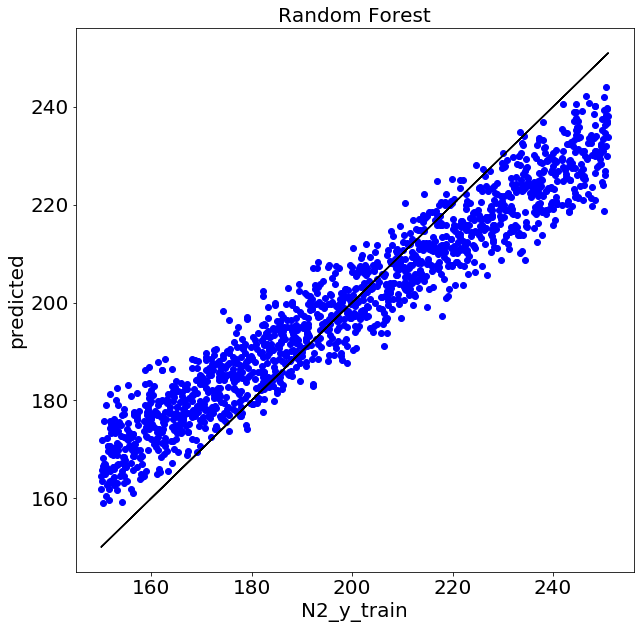

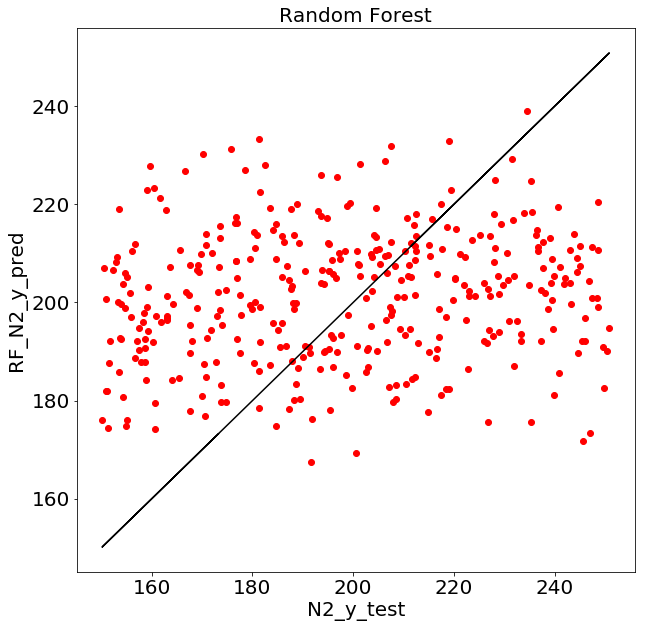

In [213]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N2_RF_regressor= RandomForestRegressor(n_estimators=300)
N2_RF_regressor.fit(N2_x_train,N2_y_train)
RF_N2_y_pred= N2_RF_regressor.predict(N2_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N2_y_train, N2_RF_regressor.predict(N2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N2_y_train, N2_RF_regressor.predict(N2_x_train)))
print('R2 score = %.2f' %r2_score(N2_y_test, RF_N2_y_pred))
print('MSE = %.2f' %mean_squared_error(N2_y_test, RF_N2_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N2_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N2_y_train,N2_RF_regressor.predict(N2_x_train), color='b')
plt.plot(N2_y_train,N2_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N2_y_test',fontsize=20)
plt.ylabel('RF_N2_y_pred',fontsize=20)
plt.scatter(N2_y_test,N2_RF_regressor.predict(N2_x_test), color='r')
plt.plot(N2_y_test,N2_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [214]:
# Training for (-1,0) voltages
# Creating Matrix of features and dependent variables
N3_x=np.log(abs(N3.iloc[:,N3.columns != 'n_thickness']))
N3_y=N3.iloc[:,-1:].values # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N3_x_train, N3_x_test, N3_y_train, N3_y_test = train_test_split(N3_x,N3_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= -0.18
MSE on train set= 999.78
R2 score = -0.16
MSE = 926.20


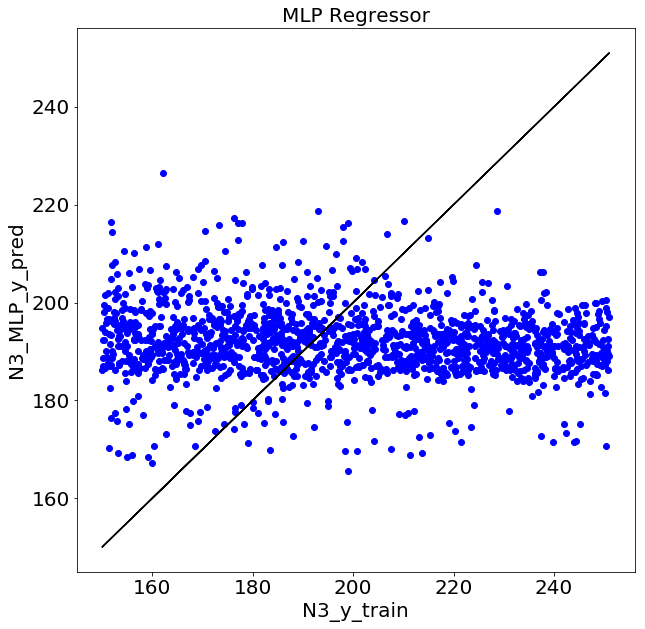

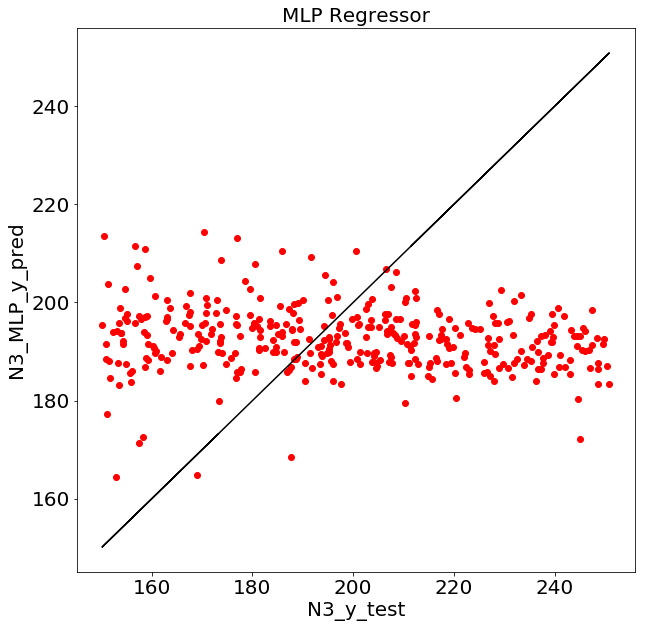

In [215]:
from sklearn.neural_network import MLPRegressor
N3_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N3_MLP_regressor.fit(N3_x_train,N3_y_train)
# Predicting output for x_test 
N3_MLP_y_pred = N3_MLP_regressor.predict(N3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N3_y_train, N3_MLP_regressor.predict(N3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N3_y_train, N3_MLP_regressor.predict(N3_x_train)))
print('R2 score = %.2f' %r2_score(N3_y_test, N3_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N3_y_test, N3_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N3_y_train',fontsize=20)
plt.ylabel('N3_MLP_y_pred',fontsize=20)
plt.scatter(N3_y_train,N3_MLP_regressor.predict(N3_x_train), color='b')
plt.plot(N3_y_train,N3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N3_y_test',fontsize=20)
plt.ylabel('N3_MLP_y_pred',fontsize=20)
plt.scatter(N3_y_test,N3_MLP_regressor.predict(N3_x_test), color='r')
plt.plot(N3_y_test,N3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.08
MSE on train set= 775.53
R2 score = 0.03
MSE = 776.04


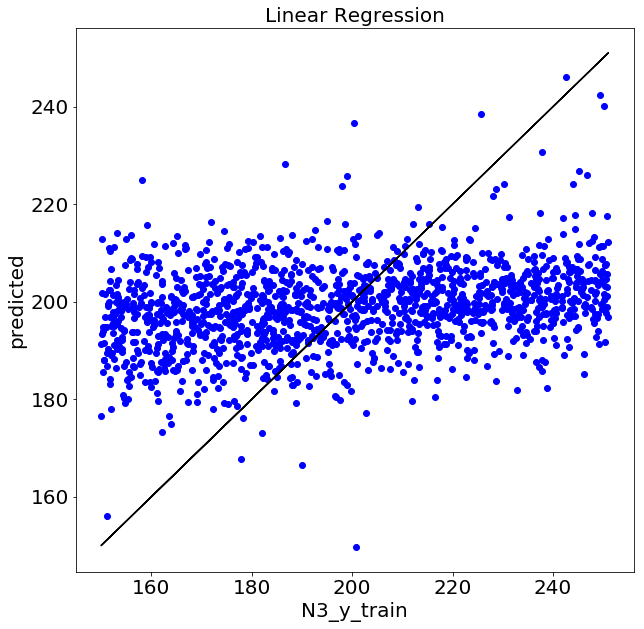

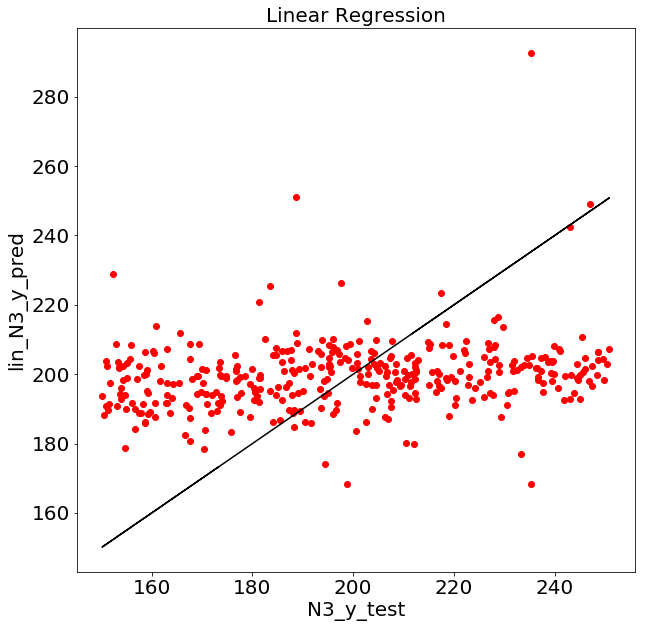

In [216]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N3_lin_regressor=LinearRegression()
N3_lin_regressor.fit(N3_x_train,N3_y_train)
lin_N3_y_pred=N3_lin_regressor.predict(N3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N3_y_train, N3_lin_regressor.predict(N3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N3_y_train, N3_lin_regressor.predict(N3_x_train)))
print('R2 score = %.2f' %r2_score(N3_y_test, lin_N3_y_pred))
print('MSE = %.2f' %mean_squared_error(N3_y_test, lin_N3_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N3_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N3_y_train,N3_lin_regressor.predict(N3_x_train), color='b')
plt.plot(N3_y_train,N3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N3_y_test',fontsize=20)
plt.ylabel('lin_N3_y_pred',fontsize=20)
plt.scatter(N3_y_test,lin_N3_y_pred, color='r')
plt.plot(N3_y_test,N3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.89
MSE = 1504.05


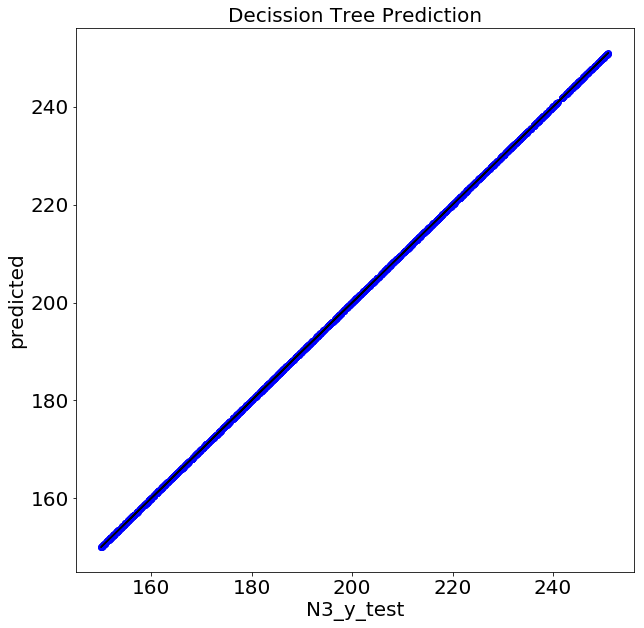

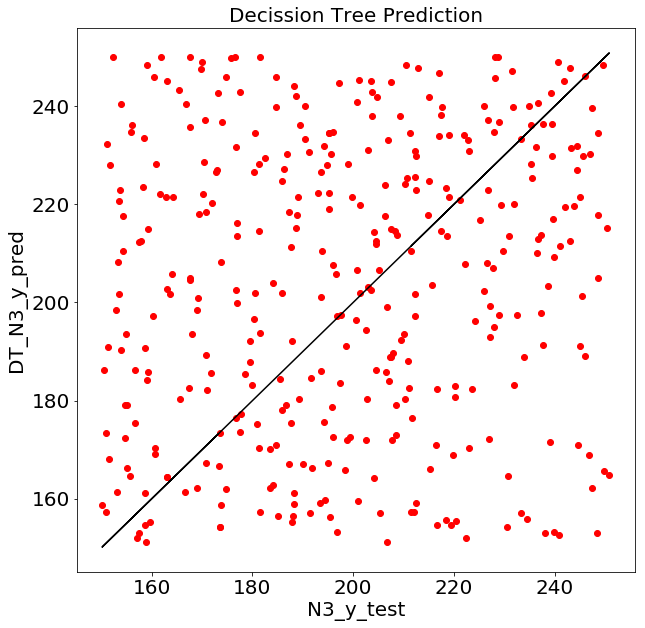

In [217]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
N3_DT_regressor = DecisionTreeRegressor(random_state=0)
N3_DT_regressor.fit(N3_x_train,N3_y_train)
DT_N3_y_pred = N3_DT_regressor.predict(N3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N3_y_train, N3_DT_regressor.predict(N3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N3_y_train, N3_DT_regressor.predict(N3_x_train)))
print('R2 score = %.2f' %r2_score(N3_y_test, DT_N3_y_pred))
print('MSE = %.2f' %mean_squared_error(N3_y_test, DT_N3_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N3_y_test',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N3_y_train,N3_DT_regressor.predict(N3_x_train), color='b')
plt.plot(N3_y_train,N3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N3_y_test',fontsize=20)
plt.ylabel('DT_N3_y_pred',fontsize=20)
plt.scatter(N3_y_test,DT_N3_y_pred, color='r')
plt.plot(N3_y_test,N3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.86
MSE on train set= 118.13
R2 score = 0.07
MSE = 742.82


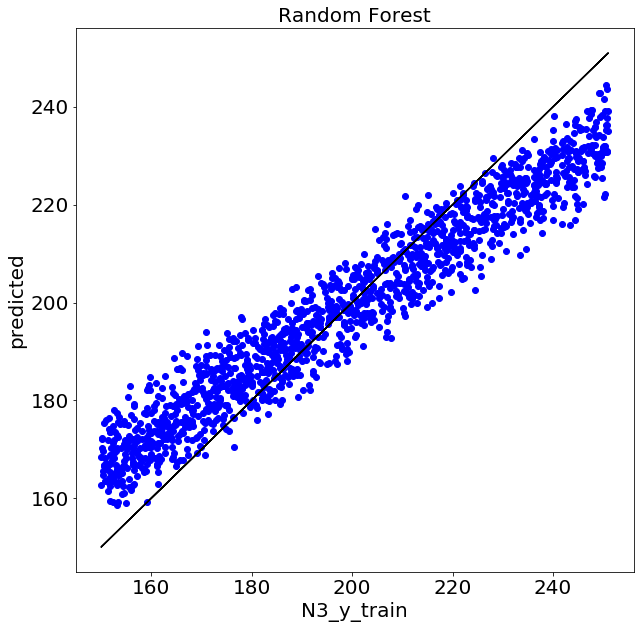

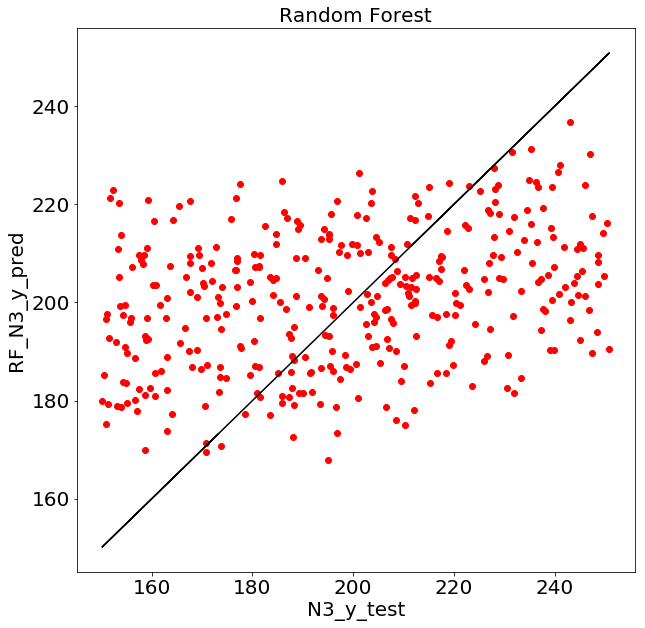

In [218]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N3_RF_regressor= RandomForestRegressor(n_estimators=300)
N3_RF_regressor.fit(N3_x_train,N3_y_train)
RF_N3_y_pred= N3_RF_regressor.predict(N3_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N3_y_train, N3_RF_regressor.predict(N3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N3_y_train, N3_RF_regressor.predict(N3_x_train)))
print('R2 score = %.2f' %r2_score(N3_y_test, RF_N3_y_pred))
print('MSE = %.2f' %mean_squared_error(N3_y_test, RF_N3_y_pred))
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N3_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N3_y_train,N3_RF_regressor.predict(N3_x_train), color='b')
plt.plot(N3_y_train,N3_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N3_y_test',fontsize=20)
plt.ylabel('RF_N3_y_pred',fontsize=20)
plt.scatter(N3_y_test,N3_RF_regressor.predict(N3_x_test), color='r')
plt.plot(N3_y_test,N3_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

In [219]:
# Training for (-2,0) voltages
# Creating Matrix of features and dependent variables
N4_x=np.log(abs(N4.iloc[:,N4.columns != 'n_thickness']))
N4_y=N4.iloc[:,-1:].values # Including the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N4_x_train, N4_x_test, N4_y_train, N4_y_test = train_test_split(N4_x,N4_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= -0.23
MSE on train set= 1043.48
R2 score = -0.24
MSE = 984.75


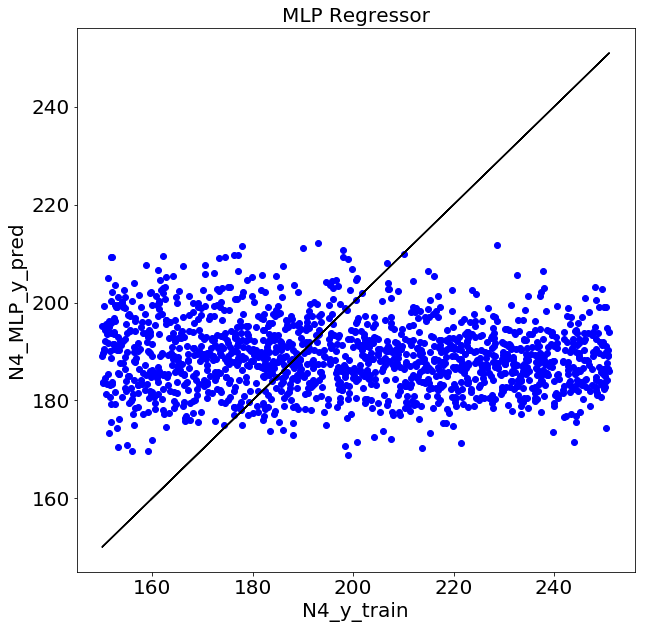

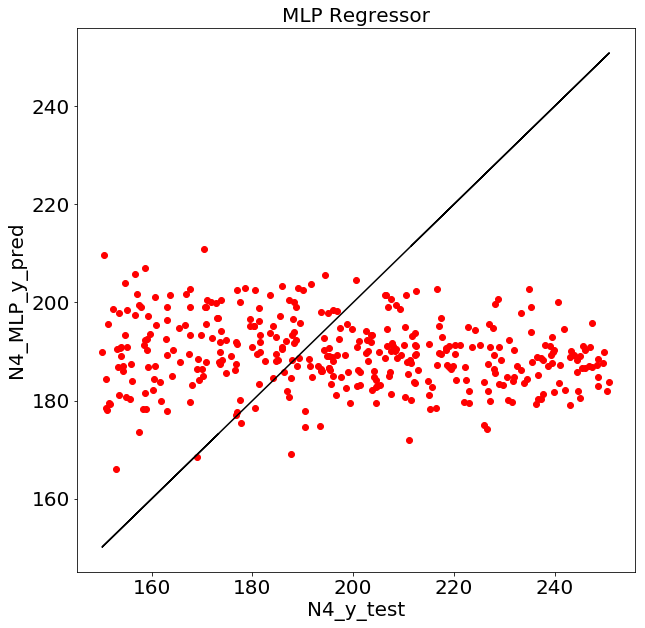

In [220]:
from sklearn.neural_network import MLPRegressor
N4_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N4_MLP_regressor.fit(N4_x_train,N4_y_train)
# Predicting output for x_test 
N4_MLP_y_pred = N4_MLP_regressor.predict(N4_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N4_y_train, N4_MLP_regressor.predict(N4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N4_y_train, N4_MLP_regressor.predict(N4_x_train)))
print('R2 score = %.2f' %r2_score(N4_y_test, N4_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N4_y_test, N4_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N4_y_train',fontsize=20)
plt.ylabel('N4_MLP_y_pred',fontsize=20)
plt.scatter(N4_y_train,N4_MLP_regressor.predict(N4_x_train), color='b')
plt.plot(N4_y_train,N4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N4_y_test',fontsize=20)
plt.ylabel('N4_MLP_y_pred',fontsize=20)
plt.scatter(N4_y_test,N4_MLP_regressor.predict(N4_x_test), color='r')
plt.plot(N4_y_test,N4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.10
MSE on train set= 761.46
R2 score = -0.02
MSE = 811.29


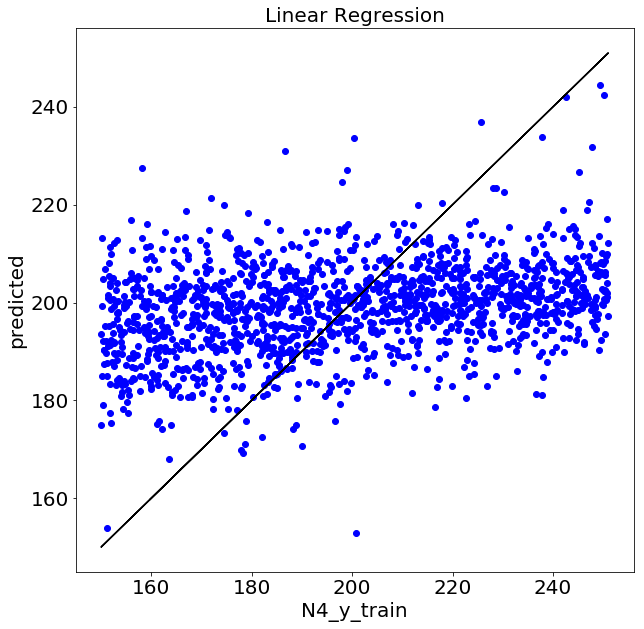

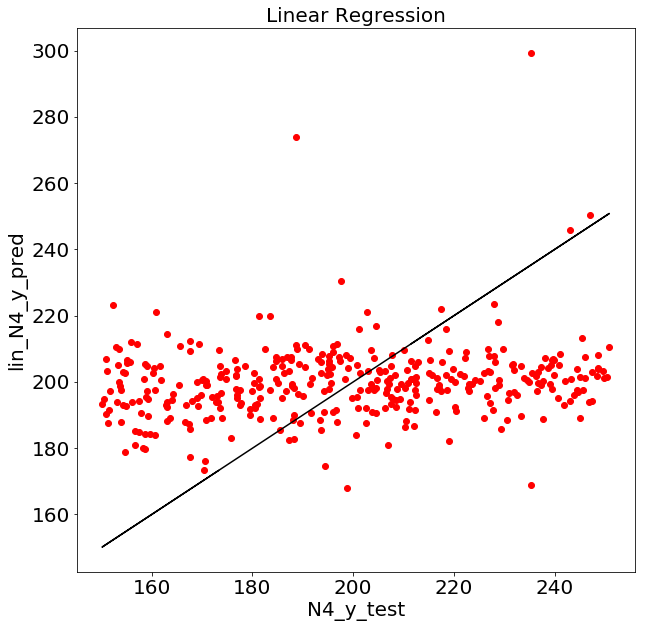

In [221]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N4_lin_regressor=LinearRegression()
N4_lin_regressor.fit(N4_x_train,N4_y_train)

lin_N4_y_pred=N4_lin_regressor.predict(N4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N4_y_train, N4_lin_regressor.predict(N4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N4_y_train, N4_lin_regressor.predict(N4_x_train)))
print('R2 score = %.2f' %r2_score(N4_y_test, lin_N4_y_pred))
print('MSE = %.2f' %mean_squared_error(N4_y_test, lin_N4_y_pred))

#Plort for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N4_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N4_y_train,N4_lin_regressor.predict(N4_x_train), color='b')
plt.plot(N4_y_train,N4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 


#Plort for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N4_y_test',fontsize=20)
plt.ylabel('lin_N4_y_pred',fontsize=20)
plt.scatter(N4_y_test,lin_N4_y_pred, color='r')
plt.plot(N4_y_test,N4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.83
MSE = 1456.58


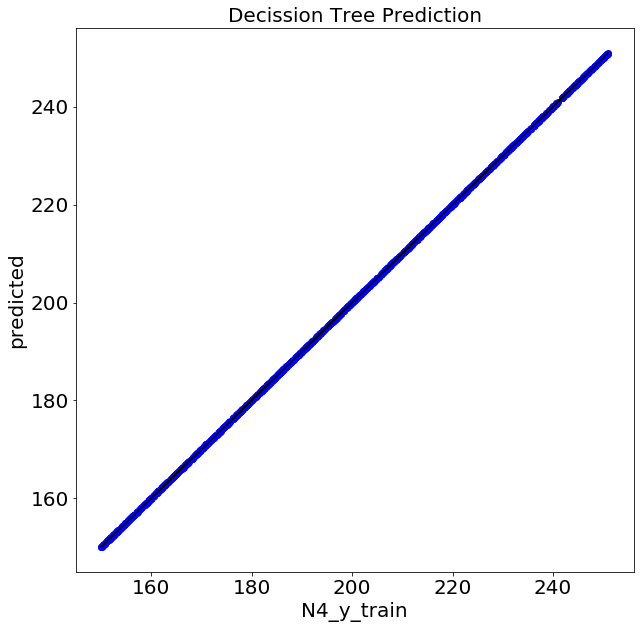

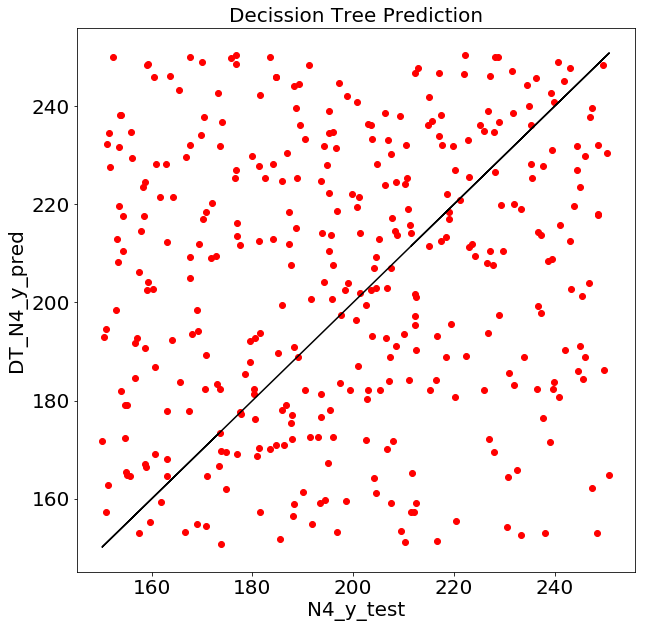

In [222]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
N4_DT_regressor = DecisionTreeRegressor(random_state=0)
N4_DT_regressor.fit(N4_x_train,N4_y_train)

DT_N4_y_pred = N4_DT_regressor.predict(N4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N4_y_train, N4_DT_regressor.predict(N4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N4_y_train, N4_DT_regressor.predict(N4_x_train)))
print('R2 score = %.2f' %r2_score(N4_y_test, DT_N4_y_pred))
print('MSE = %.2f' %mean_squared_error(N4_y_test, DT_N4_y_pred))


#Plot for trainset
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N4_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N4_y_train,N4_DT_regressor.predict(N4_x_train), color='b')
plt.plot(N4_y_train,N4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N4_y_test',fontsize=20)
plt.xlabel('N4_y_test',fontsize=20)
plt.ylabel('DT_N4_y_pred',fontsize=20)
plt.scatter(N4_y_test,DT_N4_y_pred, color='r')
plt.plot(N4_y_test,N4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.86
MSE on train set= 114.86
R2 score = 0.07
MSE = 743.14


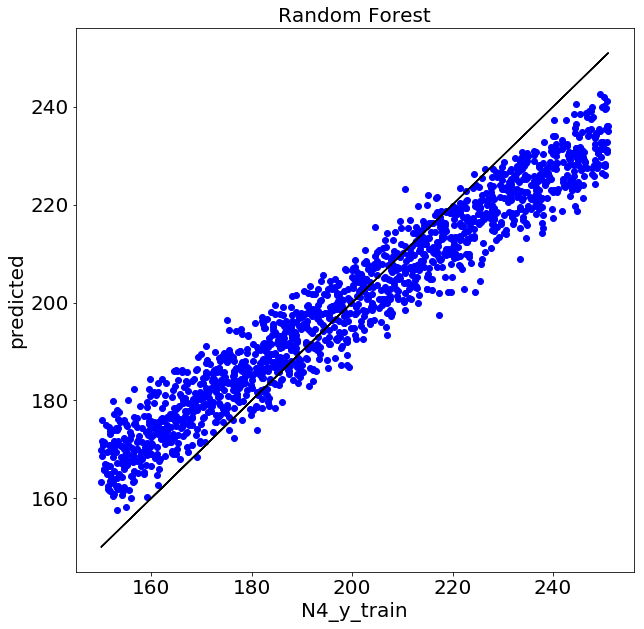

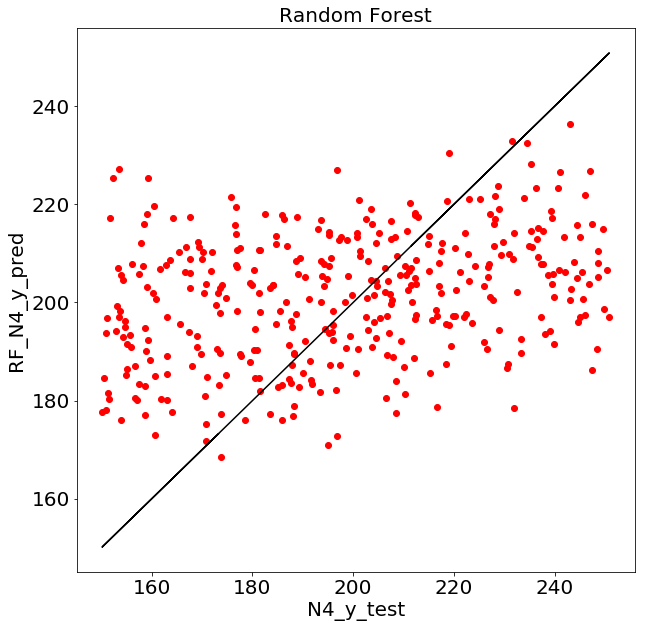

In [223]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N4_RF_regressor= RandomForestRegressor(n_estimators=300)
N4_RF_regressor.fit(N4_x_train,N4_y_train)

RF_N4_y_pred= N4_RF_regressor.predict(N4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N4_y_train, N4_RF_regressor.predict(N4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N4_y_train, N4_RF_regressor.predict(N4_x_train)))
print('R2 score = %.2f' %r2_score(N4_y_test, RF_N4_y_pred))
print('MSE = %.2f' %mean_squared_error(N4_y_test, RF_N4_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N4_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N4_y_train,N4_RF_regressor.predict(N4_x_train), color='b')
plt.plot(N4_y_train,N4_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N4_y_test',fontsize=20)
plt.ylabel('RF_N4_y_pred',fontsize=20)
plt.scatter(N4_y_test,N4_RF_regressor.predict(N4_x_test), color='r')
plt.plot(N4_y_test,N4_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [224]:
# Training for (0,1) voltages


# Creating Matrix of features and dependent variables
N5_x=np.log(abs(N5.iloc[:,N5.columns != 'n_thickness']))
N5_y=N5.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N5_x_train, N5_x_test, N5_y_train, N5_y_test = train_test_split(N5_x,N5_y,test_size=0.2, random_state=0)



/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.06
MSE on train set= 797.56
R2 score = 0.10
MSE = 713.25


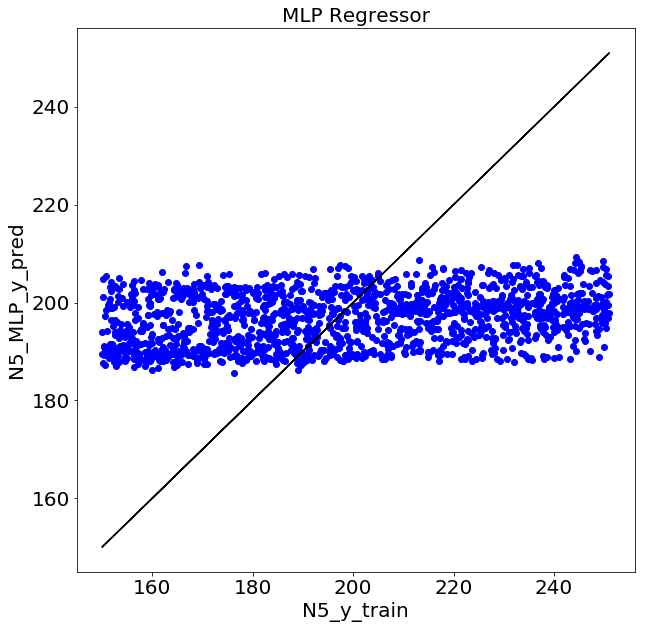

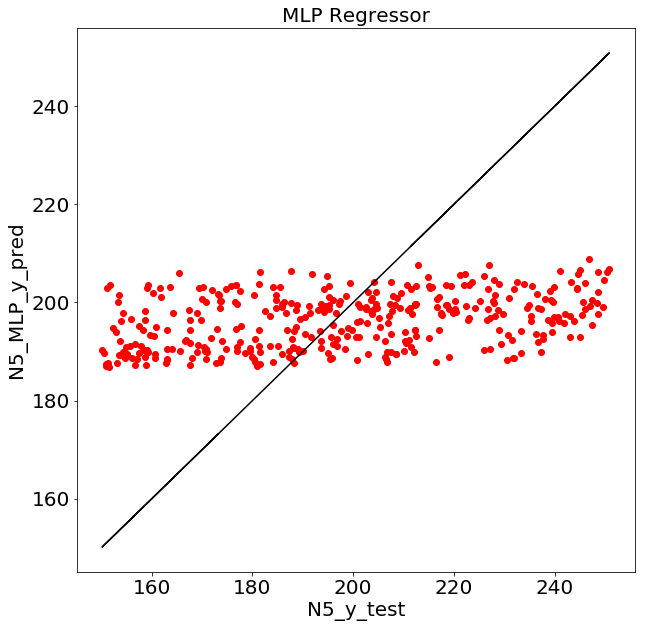

In [225]:
from sklearn.neural_network import MLPRegressor
N5_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N5_MLP_regressor.fit(N5_x_train,N5_y_train)
# Predicting output for x_test 
N5_MLP_y_pred = N5_MLP_regressor.predict(N5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N5_y_train, N5_MLP_regressor.predict(N5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N5_y_train, N5_MLP_regressor.predict(N5_x_train)))
print('R2 score = %.2f' %r2_score(N5_y_test, N5_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N5_y_test, N5_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N5_y_train',fontsize=20)
plt.ylabel('N5_MLP_y_pred',fontsize=20)
plt.scatter(N5_y_train,N5_MLP_regressor.predict(N5_x_train), color='b')
plt.plot(N5_y_train,N5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N5_y_test',fontsize=20)
plt.ylabel('N5_MLP_y_pred',fontsize=20)
plt.scatter(N5_y_test,N5_MLP_regressor.predict(N5_x_test), color='r')
plt.plot(N5_y_test,N5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 0.85
MSE on train set= 126.57
R2 score = 0.86
MSE = 110.75


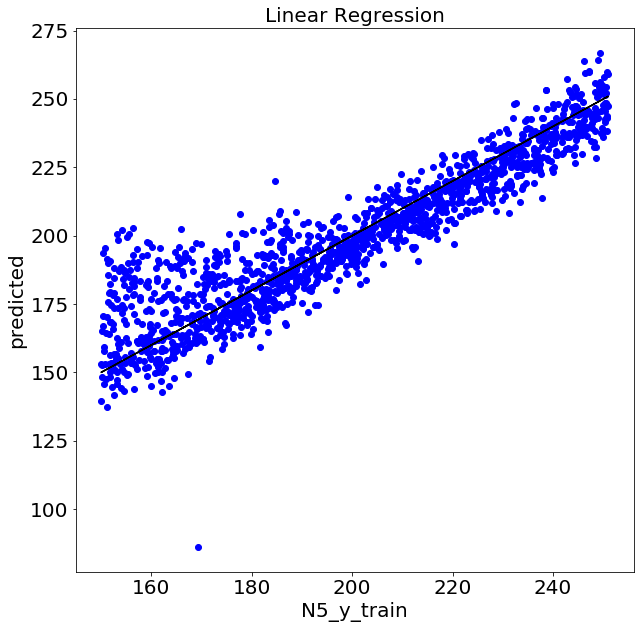

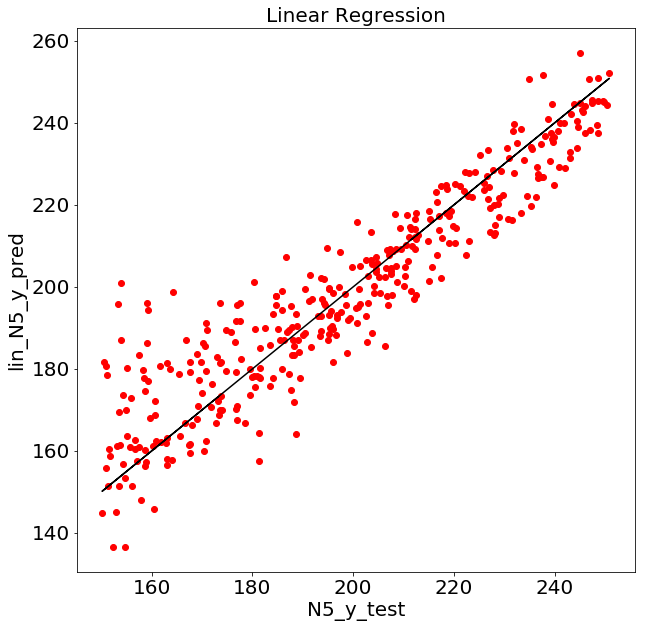

In [226]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N5_lin_regressor=LinearRegression()
N5_lin_regressor.fit(N5_x_train,N5_y_train)

lin_N5_y_pred=N5_lin_regressor.predict(N5_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N5_y_train, N5_lin_regressor.predict(N5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N5_y_train, N5_lin_regressor.predict(N5_x_train)))
print('R2 score = %.2f' %r2_score(N5_y_test, lin_N5_y_pred))
print('MSE = %.2f' %mean_squared_error(N5_y_test, lin_N5_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N5_y_train',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N5_y_train,N5_lin_regressor.predict(N5_x_train), color='b')
plt.plot(N5_y_train,N5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N5_y_test',fontsize=20)
plt.ylabel('lin_N5_y_pred',fontsize=20)
plt.scatter(N5_y_test,lin_N5_y_pred, color='r')
plt.plot(N5_y_test,N5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.32
MSE = 537.72


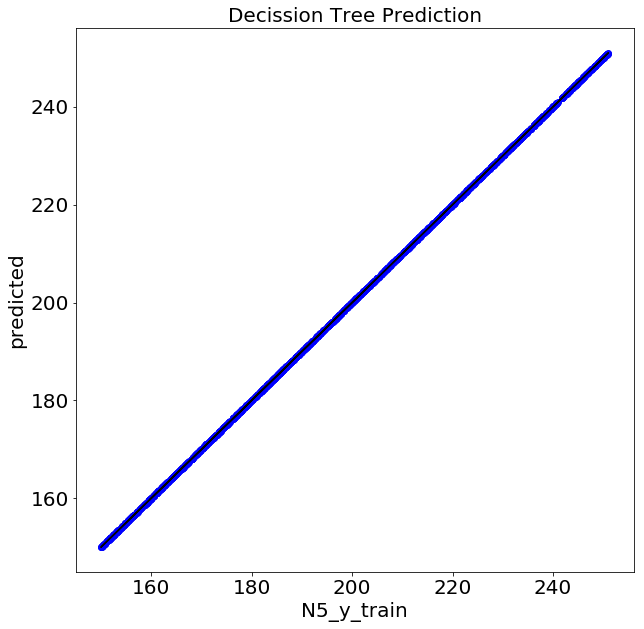

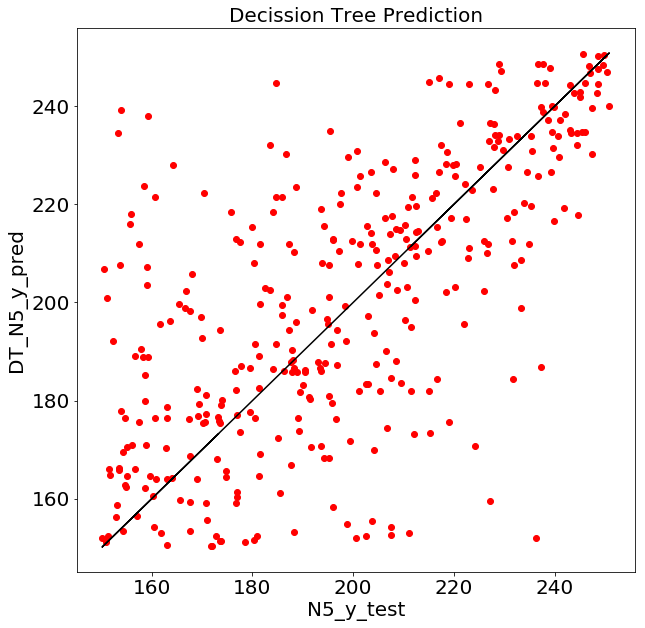

In [227]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
N5_DT_regressor = DecisionTreeRegressor(random_state=0)
N5_DT_regressor.fit(N5_x_train,N5_y_train)

DT_N5_y_pred = N5_DT_regressor.predict(N5_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N5_y_train, N5_DT_regressor.predict(N5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N5_y_train, N5_DT_regressor.predict(N5_x_train)))
print('R2 score = %.2f' %r2_score(N5_y_test, DT_N5_y_pred))
print('MSE = %.2f' %mean_squared_error(N5_y_test, DT_N5_y_pred))

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.xlabel('N5_y_train',fontsize=20)
plt.scatter(N5_y_train,N5_DT_regressor.predict(N5_x_train), color='b')
plt.plot(N5_y_train,N5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.ylabel('DT_N5_y_pred',fontsize=20)
plt.xlabel('N5_y_test',fontsize=20)
plt.scatter(N5_y_test,DT_N5_y_pred, color='r')
plt.plot(N5_y_test,N5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.95
MSE on train set= 38.35
R2 score = 0.65
MSE = 282.48


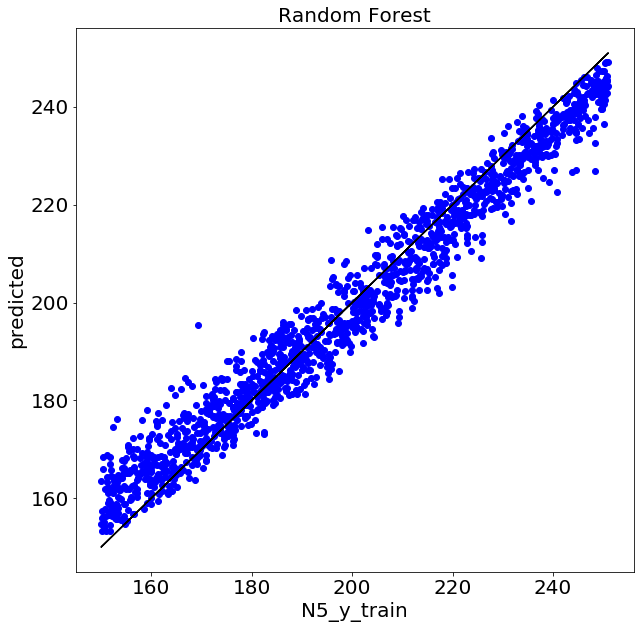

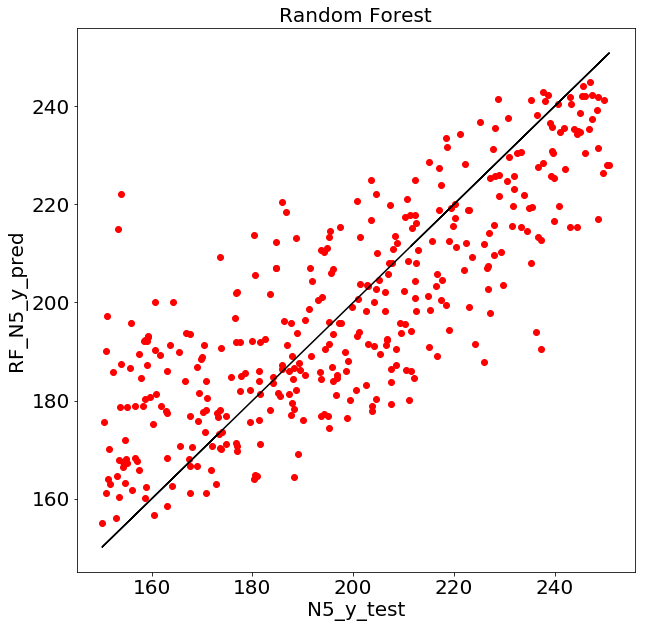

In [228]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N5_RF_regressor= RandomForestRegressor(n_estimators=300)
N5_RF_regressor.fit(N5_x_train,N5_y_train)

RF_N5_y_pred= N5_RF_regressor.predict(N5_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N5_y_train, N5_RF_regressor.predict(N5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N5_y_train, N5_RF_regressor.predict(N5_x_train)))
print('R2 score = %.2f' %r2_score(N5_y_test, RF_N5_y_pred))
print('MSE = %.2f' %mean_squared_error(N5_y_test, RF_N5_y_pred))

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.xlabel('N5_y_train',fontsize=20)
plt.scatter(N5_y_train,N5_RF_regressor.predict(N5_x_train), color='b')
plt.plot(N5_y_train,N5_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.ylabel('RF_N5_y_pred',fontsize=20)
plt.xlabel('N5_y_test',fontsize=20)
plt.scatter(N5_y_test,N5_RF_regressor.predict(N5_x_test), color='r')
plt.plot(N5_y_test,N5_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [229]:
# Training for (1,2) voltages

# Creating Matrix of features and dependent variables
N6_x=np.log(abs(N6.iloc[:,N6.columns != 'n_thickness']))

N6_y=N6.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N6_x_train, N6_x_test, N6_y_train, N6_y_test = train_test_split(N6_x,N6_y,test_size=0.2, random_state=0)



/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.48
MSE on train set= 443.07
R2 score = 0.50
MSE = 397.02


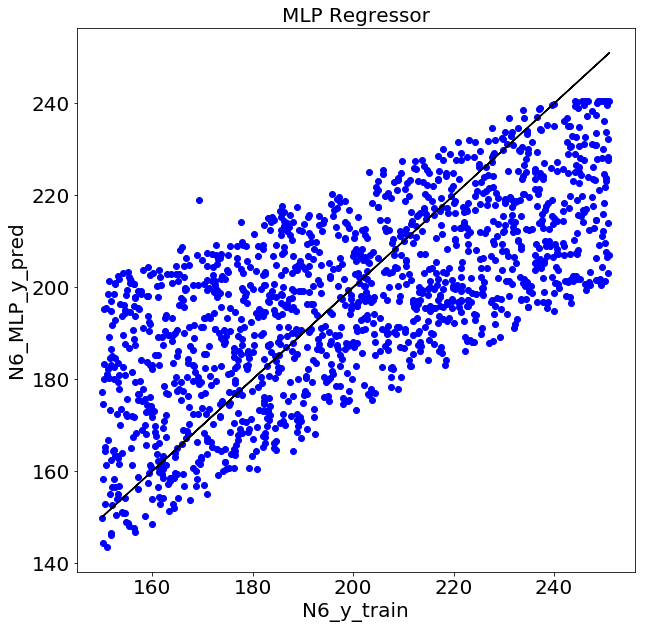

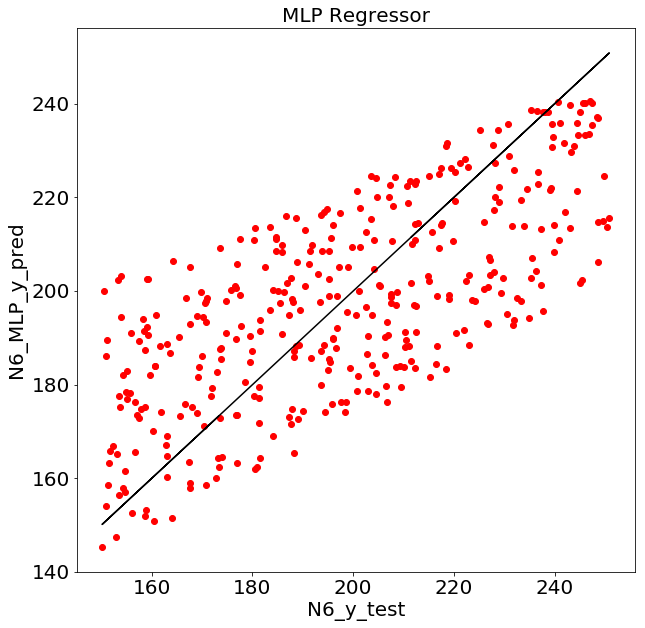

In [230]:
from sklearn.neural_network import MLPRegressor
N6_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N6_MLP_regressor.fit(N6_x_train,N6_y_train)
# Predicting output for x_test 
N6_MLP_y_pred = N6_MLP_regressor.predict(N6_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N6_y_train, N6_MLP_regressor.predict(N6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N6_y_train, N6_MLP_regressor.predict(N6_x_train)))
print('R2 score = %.2f' %r2_score(N6_y_test, N6_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N6_y_test, N6_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N6_y_train',fontsize=20)
plt.ylabel('N6_MLP_y_pred',fontsize=20)
plt.scatter(N6_y_train,N6_MLP_regressor.predict(N6_x_train), color='b')
plt.plot(N6_y_train,N6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N6_y_test',fontsize=20)
plt.ylabel('N6_MLP_y_pred',fontsize=20)
plt.scatter(N6_y_test,N6_MLP_regressor.predict(N6_x_test), color='r')
plt.plot(N6_y_test,N6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 1.08
R2 score = 1.00
MSE = 1.05


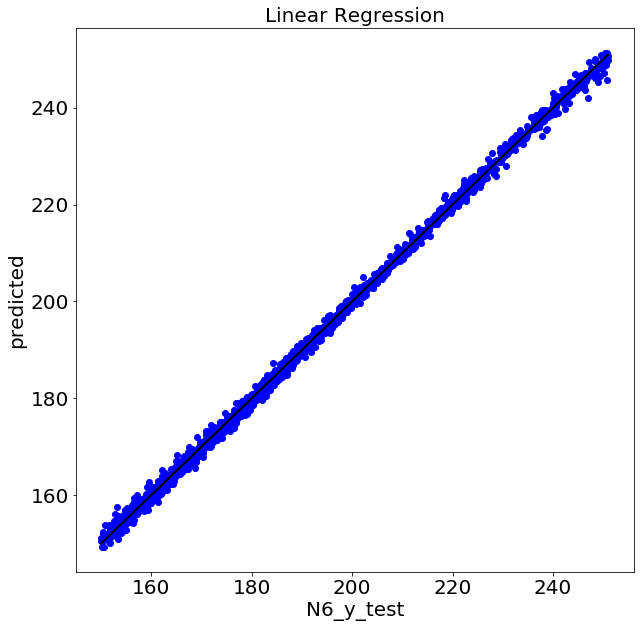

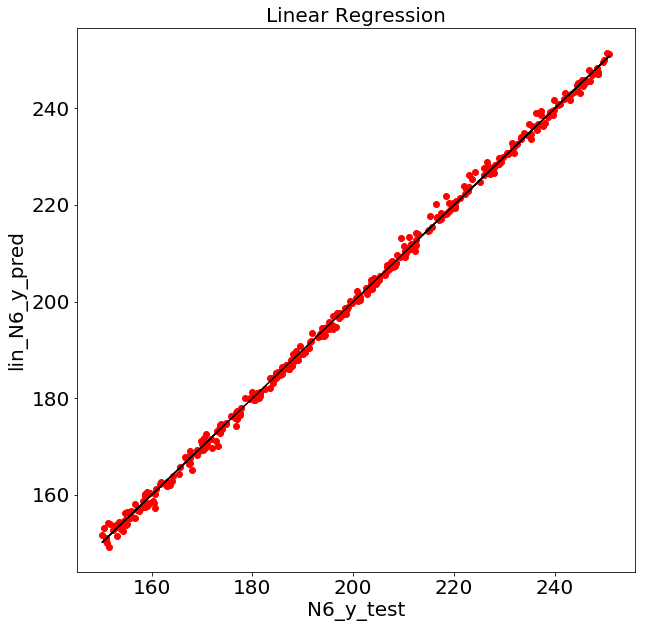

In [231]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N6_lin_regressor=LinearRegression()
N6_lin_regressor.fit(N6_x_train,N6_y_train)

lin_N6_y_pred=N6_lin_regressor.predict(N6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N6_y_train, N6_lin_regressor.predict(N6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N6_y_train, N6_lin_regressor.predict(N6_x_train)))
print('R2 score = %.2f' %r2_score(N6_y_test, lin_N6_y_pred))
print('MSE = %.2f' %mean_squared_error(N6_y_test, lin_N6_y_pred))


#Plot for training set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N6_y_test',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.scatter(N6_y_train,N6_lin_regressor.predict(N6_x_train), color='b')
plt.plot(N6_y_train,N6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 


#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N6_y_test',fontsize=20)
plt.ylabel('lin_N6_y_pred',fontsize=20)
plt.scatter(N6_y_test,lin_N6_y_pred, color='r')
plt.plot(N6_y_test,N6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.62
MSE = 304.85


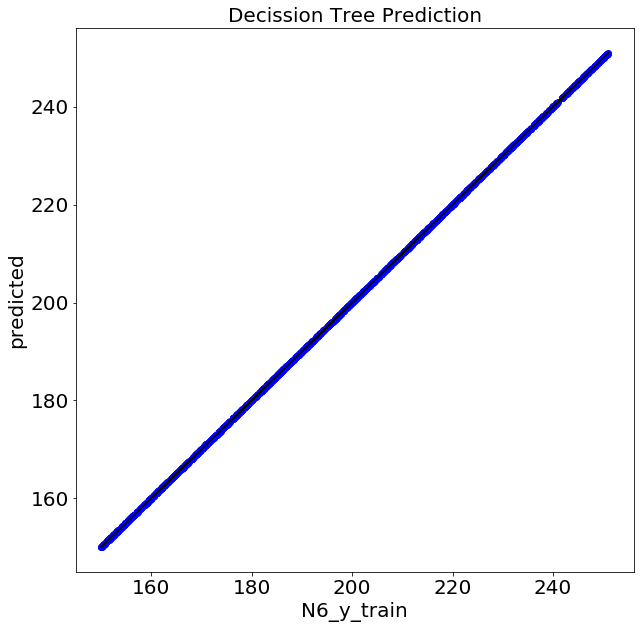

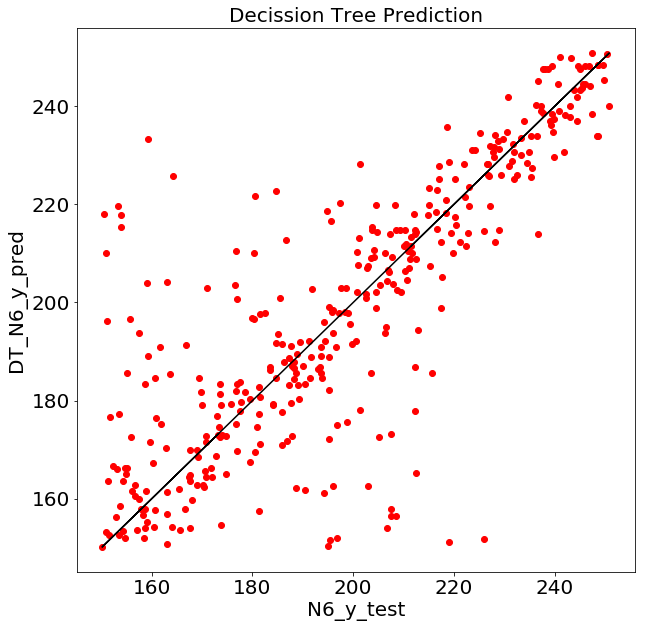

In [232]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
N6_DT_regressor = DecisionTreeRegressor(random_state=0)
N6_DT_regressor.fit(N6_x_train,N6_y_train)

DT_N6_y_pred = N6_DT_regressor.predict(N6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N6_y_train, N6_DT_regressor.predict(N6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N6_y_train, N6_DT_regressor.predict(N6_x_train)))
print('R2 score = %.2f' %r2_score(N6_y_test, DT_N6_y_pred))
print('MSE = %.2f' %mean_squared_error(N6_y_test, DT_N6_y_pred))

#Plot for training set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.xlabel('N6_y_train',fontsize=20)
plt.scatter(N6_y_train,N6_DT_regressor.predict(N6_x_train), color='b')
plt.plot(N6_y_train,N6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.ylabel('DT_N6_y_pred',fontsize=20)
plt.xlabel('N6_y_test',fontsize=20)
plt.scatter(N6_y_test,DT_N6_y_pred, color='r')
plt.plot(N6_y_test,N6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.97
MSE on train set= 22.88
R2 score = 0.79
MSE = 164.72


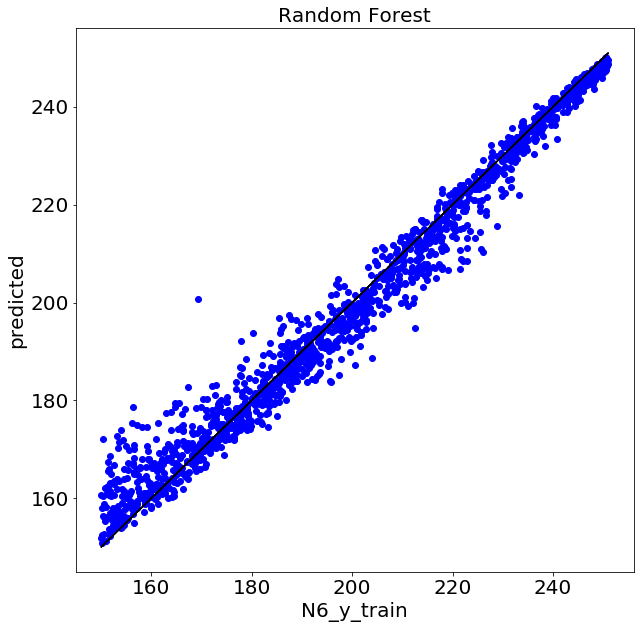

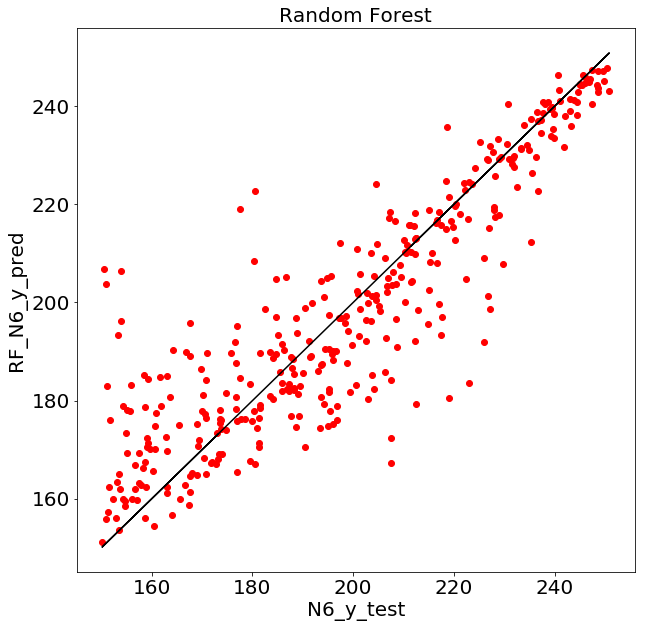

In [233]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N6_RF_regressor= RandomForestRegressor(n_estimators=300)
N6_RF_regressor.fit(N6_x_train,N6_y_train)

RF_N6_y_pred= N6_RF_regressor.predict(N6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N6_y_train, N6_RF_regressor.predict(N6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N6_y_train, N6_RF_regressor.predict(N6_x_train)))
print('R2 score = %.2f' %r2_score(N6_y_test, RF_N6_y_pred))
print('MSE = %.2f' %mean_squared_error(N6_y_test, RF_N6_y_pred))

# Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.ylabel('predicted',fontsize=20)
plt.xlabel('N6_y_train',fontsize=20)
plt.scatter(N6_y_train,N6_RF_regressor.predict(N6_x_train), color='b')
plt.plot(N6_y_train,N6_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.ylabel('RF_N6_y_pred',fontsize=20)
plt.xlabel('N6_y_test',fontsize=20)
plt.scatter(N6_y_test,N6_RF_regressor.predict(N6_x_test), color='r')
plt.plot(N6_y_test,N6_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [234]:
# Creating Matrix of features and dependent variables
N7_x=np.log(abs(N7.iloc[:,N7.columns != 'n_thickness']))

N7_y=N7.iloc[:,-1:]# only the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
N7_x_train, N7_x_test, N7_y_train, N7_y_test = train_test_split(N7_x,N7_y,test_size=0.2, random_state=0)

/home/012431692/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2 score on train set= 0.39
MSE on train set= 514.20
R2 score = 0.45
MSE = 434.44


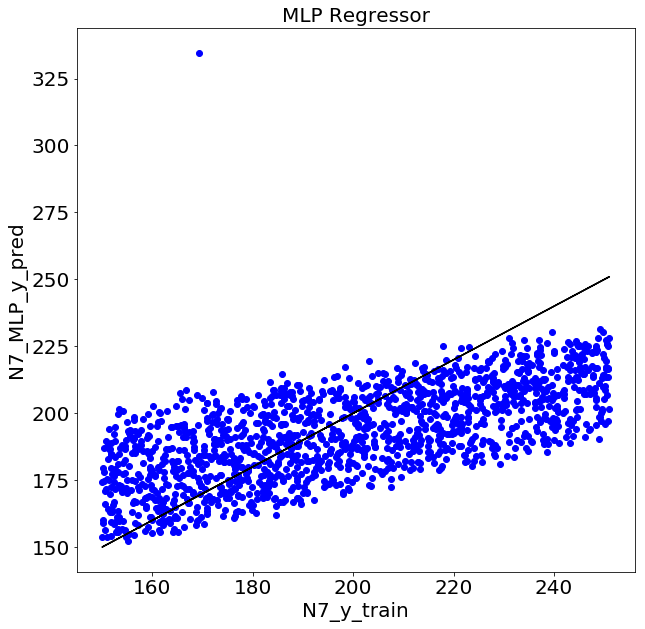

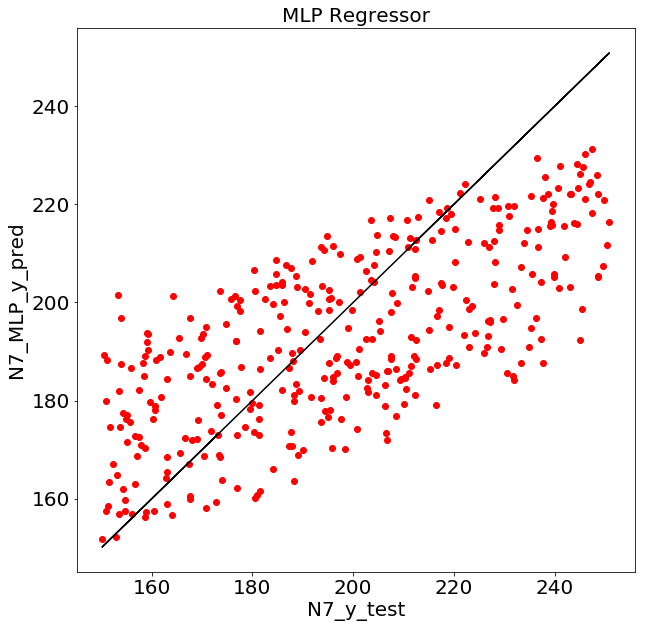

In [235]:
from sklearn.neural_network import MLPRegressor
N7_MLP_regressor= MLPRegressor(hidden_layer_sizes=(100,100,100,100), activation='relu', random_state=0, max_iter=1000, warm_start=True)
N7_MLP_regressor.fit(N7_x_train,N7_y_train)
# Predicting output for x_test 
N7_MLP_y_pred = N7_MLP_regressor.predict(N7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N7_y_train, N7_MLP_regressor.predict(N7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N7_y_train, N7_MLP_regressor.predict(N7_x_train)))
print('R2 score = %.2f' %r2_score(N7_y_test, N7_MLP_y_pred))
print('MSE = %.2f' %mean_squared_error(N7_y_test, N7_MLP_y_pred))
#Plot for train set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N7_y_train',fontsize=20)
plt.ylabel('N7_MLP_y_pred',fontsize=20)
plt.scatter(N7_y_train,N7_MLP_regressor.predict(N7_x_train), color='b')
plt.plot(N7_y_train,N7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

#PLot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('MLP Regressor',fontsize=20)
plt.xlabel('N7_y_test',fontsize=20)
plt.ylabel('N7_MLP_y_pred',fontsize=20)
plt.scatter(N7_y_test,N7_MLP_regressor.predict(N7_x_test), color='r')
plt.plot(N7_y_test,N7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.96
R2 score = 1.00
MSE = 0.89


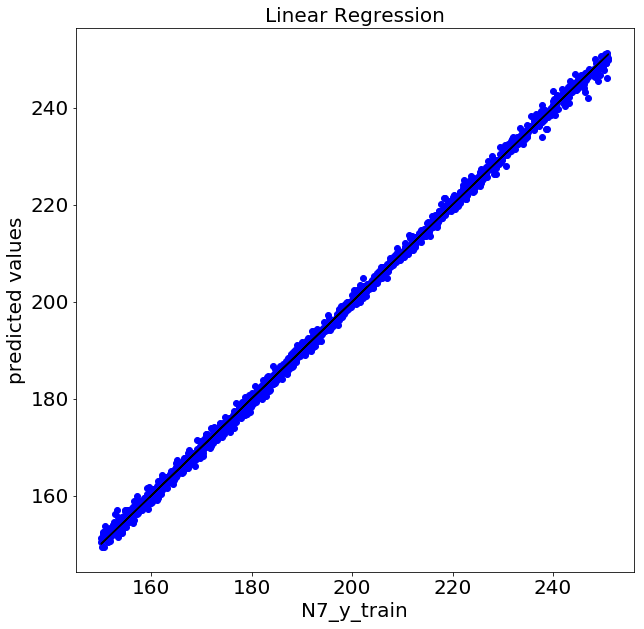

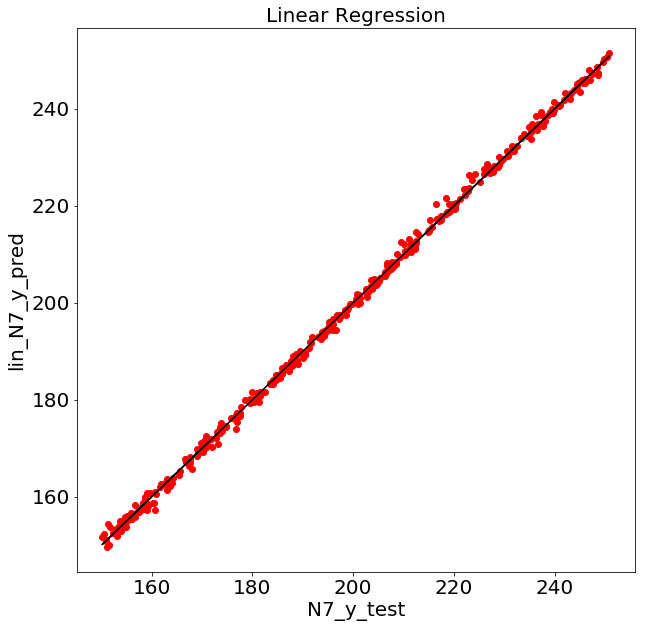

In [236]:
#Linear Regression
from sklearn.linear_model import LinearRegression
N7_lin_regressor=LinearRegression()
N7_lin_regressor.fit(N7_x_train,N7_y_train)
#Predicting y_test
lin_N7_y_pred=N7_lin_regressor.predict(N7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N7_y_train, N7_lin_regressor.predict(N7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N7_y_train, N7_lin_regressor.predict(N7_x_train)))
print('R2 score = %.2f' %r2_score(N7_y_test, lin_N7_y_pred))
print('MSE = %.2f' %mean_squared_error(N7_y_test, lin_N7_y_pred))
# Plot for training set

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N7_y_train',fontsize=20)
plt.ylabel('predicted values',fontsize=20)
plt.scatter(N7_y_train,N7_lin_regressor.predict(N7_x_train), color='b')
plt.plot(N7_y_train,N7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression',fontsize=20)
plt.xlabel('N7_y_test',fontsize=20)
plt.ylabel('lin_N7_y_pred',fontsize=20)
plt.scatter(N7_y_test,lin_N7_y_pred, color='r')
plt.plot(N7_y_test,N7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


In [147]:
o=lin_N7_y_pred.min()

np.argmin(lin_N7_y_pred)
print(lin_N7_y_pred[348])
print(N7_y_test.iloc[348])
print(lin_N7_y_pred[338])
print(N7_y_test.iloc[338])
#type(N7_y_test).

[165.02652413]
n_thickness    163.961
Name: 347, dtype: float64
[135.91494274]
n_thickness    169.286
Name: 1422, dtype: float64


In [150]:
dataset.iloc[347:348,:]
#Remove index 347 row

0             1             2             3             4  \
347 -0.000001 -9.467870e-07 -8.259986e-07 -7.182000e-07 -6.221563e-07   

                5             6             7             8             9  \
347 -5.369884e-07 -4.615887e-07 -3.951847e-07 -3.369184e-07 -2.859886e-07   

     ...        95        96        97       98       99      100       101  \
347  ...  0.549722  0.599349  0.650526  0.70319  0.75728  0.81273  0.869476   

     n_thickness  i_thickness  p_thickness  
347      163.961       13.001      229.413  

[1 rows x 105 columns]

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.63
MSE = 294.19


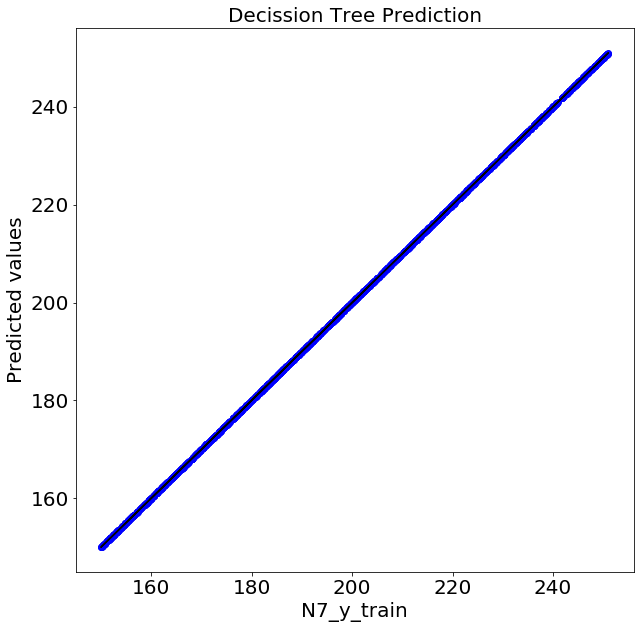

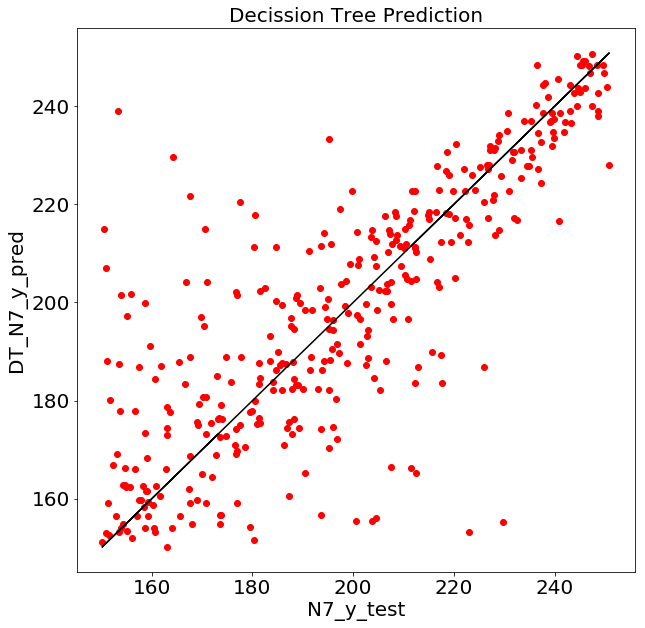

In [237]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
N7_DT_regressor = DecisionTreeRegressor(random_state=0)
N7_DT_regressor.fit(N7_x_train,N7_y_train)
#prdicting y_test
DT_N7_y_pred = N7_DT_regressor.predict(N7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N7_y_train, N7_DT_regressor.predict(N7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N7_y_train, N7_DT_regressor.predict(N7_x_train)))
print('R2 score = %.2f' %r2_score(N7_y_test, DT_N7_y_pred))
print('MSE = %.2f' %mean_squared_error(N7_y_test, DT_N7_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N7_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(N7_y_train,N7_DT_regressor.predict(N7_x_train), color='b')
plt.plot(N7_y_train,N7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction',fontsize=20)
plt.xlabel('N7_y_test',fontsize=20)
plt.ylabel('DT_N7_y_pred',fontsize=20)
plt.scatter(N7_y_test,DT_N7_y_pred, color='r')
plt.plot(N7_y_test,N7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.97
MSE on train set= 22.85
R2 score = 0.80
MSE = 162.26


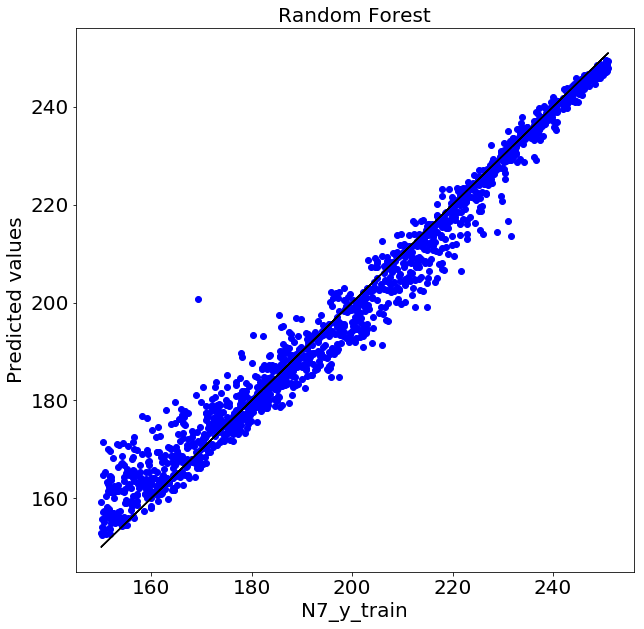

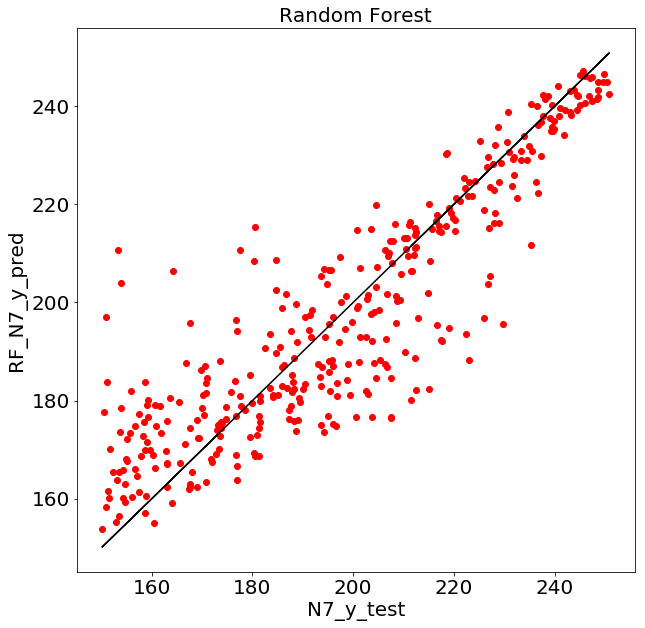

In [238]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
N7_RF_regressor= RandomForestRegressor(n_estimators=300)
N7_RF_regressor.fit(N7_x_train,N7_y_train)
#predicting y_test
RF_N7_y_pred= N7_RF_regressor.predict(N7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(N7_y_train, N7_RF_regressor.predict(N7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(N7_y_train, N7_RF_regressor.predict(N7_x_train)))
print('R2 score = %.2f' %r2_score(N7_y_test, RF_N7_y_pred))
print('MSE = %.2f' %mean_squared_error(N7_y_test, RF_N7_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N7_y_train',fontsize=20)
plt.ylabel('Predicted values',fontsize=20)
plt.scatter(N7_y_train,N7_RF_regressor.predict(N7_x_train), color='b')
plt.plot(N7_y_train,N7_y_train, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest',fontsize=20)
plt.xlabel('N7_y_test',fontsize=20)
plt.ylabel('RF_N7_y_pred',fontsize=20)
plt.scatter(N7_y_test,N7_RF_regressor.predict(N7_x_test), color='r')
plt.plot(N7_y_test,N7_y_test, color='black')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
####################

# TRAINING FOR P-TYPE

In [110]:
P1=pd.concat([s1,thickness_col['p_thickness']], axis=1) # Data for only -2 voltage# axis=1 to make sure that no duplicate items are created and columns added to columns but not as rows.
P2=pd.concat([s2,thickness_col['p_thickness']], axis=1)# Data for (-2,-1) voltages
P3=pd.concat([s3,thickness_col['p_thickness']], axis=1)# Data for (-1,0) voltages
P4=pd.concat([s4,thickness_col['p_thickness']], axis=1)# Data for (-2,0) voltages
P5=pd.concat([s5,thickness_col['p_thickness']], axis=1)# Data for (0,1) voltages
P6=pd.concat([s6,thickness_col['p_thickness']], axis=1)# Data for (1,2) voltages
P7=pd.concat([s7,thickness_col['p_thickness']], axis=1)# Data for (0,2) voltages
P8=pd.concat([s8,thickness_col['p_thickness']], axis=1)# Data for (-2,2) voltages

In [111]:
# For (-2,2) voltages

# Creating Matrix of features and dependent variables
P8_x=np.log(abs(P8.iloc[:,P8.columns != 'p_thickness']))
P8_y=i8.iloc[:,-1:]# Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P8_x_train, P8_x_test, P8_y_train, P8_y_test = train_test_split(P8_x,P8_y,test_size=0.2, random_state=0)


R2 score on train set= 1.00
MSE on train set= 0.03
R2 score on test set= 1.00
MSE on test set= 0.03


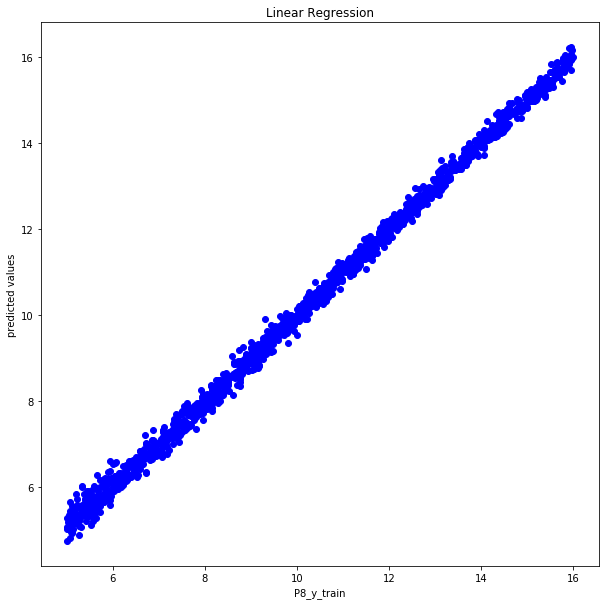

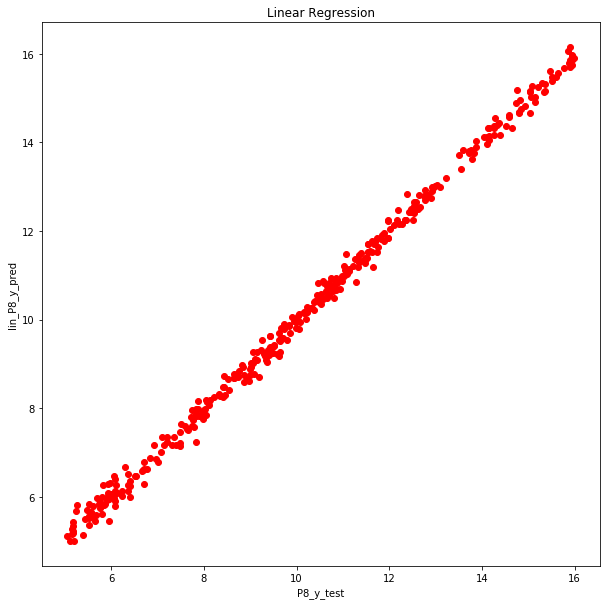

In [112]:
# Linear Regression

from sklearn.linear_model import LinearRegression
P8_lin_regressor=LinearRegression()
P8_lin_regressor.fit(P8_x_train,P8_y_train)
#Predicting y_test
lin_P8_y_pred=P8_lin_regressor.predict(P8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P8_y_train, P8_lin_regressor.predict(P8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P8_y_train, P8_lin_regressor.predict(P8_x_train)))
print('R2 score on test set= %.2f' %r2_score(P8_y_test, lin_P8_y_pred))
print('MSE on test set= %.2f' %mean_squared_error(P8_y_test, lin_P8_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P8_y_train')
plt.ylabel('predicted values')
plt.scatter(P8_y_train,P8_lin_regressor.predict(P8_x_train), color='b')
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P8_y_test')
plt.ylabel('lin_P8_y_pred')
plt.scatter(P8_y_test,lin_P8_y_pred, color='r')
plt.show()


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 0.99
MSE = 0.06


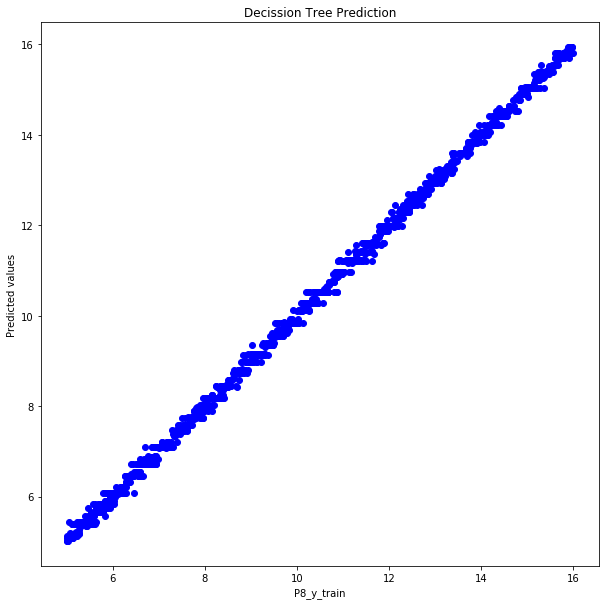

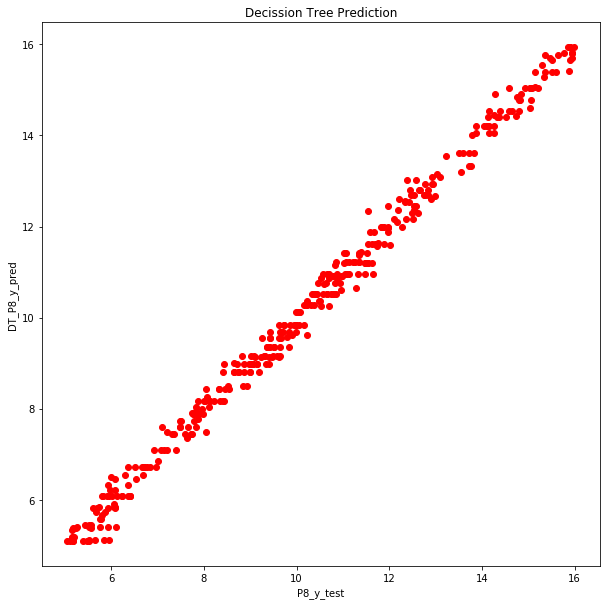

In [113]:
####DECISION TREE
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
P8_DT_regressor = DecisionTreeRegressor(max_depth=8,random_state=0)
P8_DT_regressor.fit(P8_x_train,P8_y_train)
#prdicting y_test
DT_P8_y_pred = P8_DT_regressor.predict(P8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P8_y_train, P8_DT_regressor.predict(P8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P8_y_train, P8_DT_regressor.predict(P8_x_train)))
print('R2 score = %.2f' %r2_score(P8_y_test, DT_P8_y_pred))
print('MSE = %.2f' %mean_squared_error(P8_y_test, DT_P8_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('P8_y_train')
plt.ylabel('Predicted values')
plt.scatter(P8_y_train,P8_DT_regressor.predict(P8_x_train), color='b')
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('P8_y_test')
plt.ylabel('DT_P8_y_pred')
plt.scatter(P8_y_test,DT_P8_y_pred, color='r')

plt.show()


/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 1.00
MSE on train set= 0.01
R2 score = 1.00
MSE = 0.04


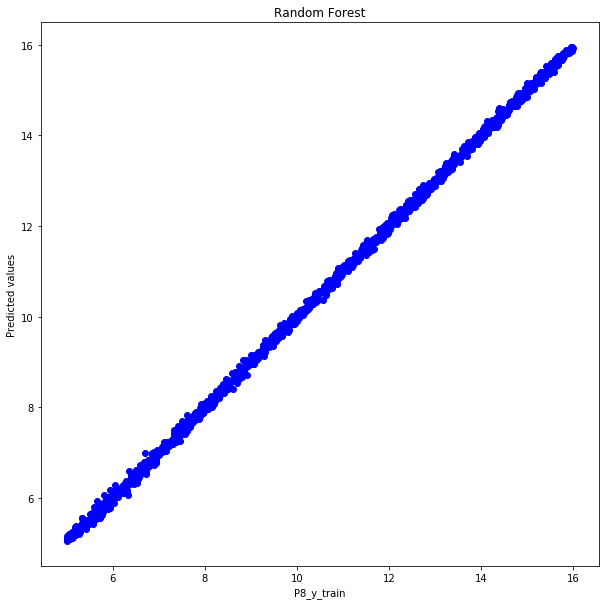

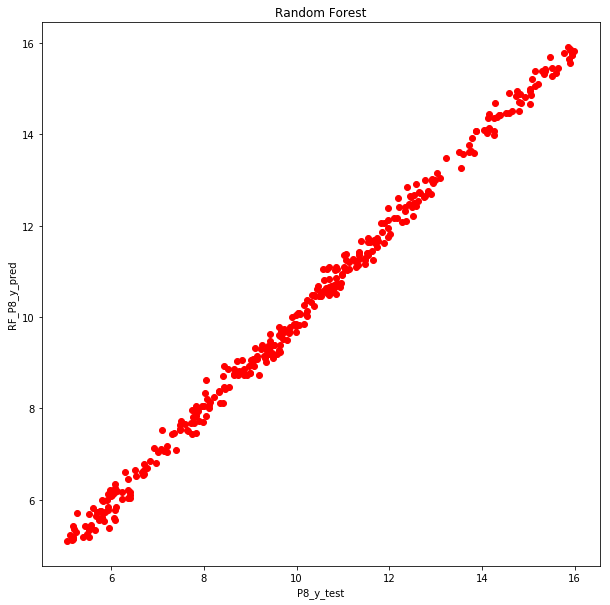

In [114]:
#####Random Forest
from sklearn.ensemble import RandomForestRegressor
P8_RF_regressor= RandomForestRegressor(n_estimators=300)
P8_RF_regressor.fit(P8_x_train,P8_y_train)
#predicting y_test
RF_P8_y_pred= P8_RF_regressor.predict(P8_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P8_y_train, P8_RF_regressor.predict(P8_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P8_y_train, P8_RF_regressor.predict(P8_x_train)))
print('R2 score = %.2f' %r2_score(P8_y_test, RF_P8_y_pred))
print('MSE = %.2f' %mean_squared_error(P8_y_test, RF_P8_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('P8_y_train')
plt.ylabel('Predicted values')
plt.scatter(P8_y_train,P8_RF_regressor.predict(P8_x_train), color='b')
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('P8_y_test')
plt.ylabel('RF_P8_y_pred')
plt.scatter(P8_y_test,P8_RF_regressor.predict(P8_x_test), color='r')
plt.show()

In [115]:
# Training for only -2 voltage# axis=1 to make sure that no duplicate items are created and columns added to columns but not as rows.


# Creating Matrix of features and dependent variables
P1_x=np.log(abs(P1.iloc[:,P1.columns != 'p_thickness'])) 
P1_y=P1.iloc[:,-1:] # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P1_x_train, P1_x_test, P1_y_train, P1_y_test = train_test_split(P1_x,P1_y,test_size=0.2, random_state=0)



R2 score on train set= 0.00
MSE on train set= 814.94
R2 score = 0.00
MSE = 888.24


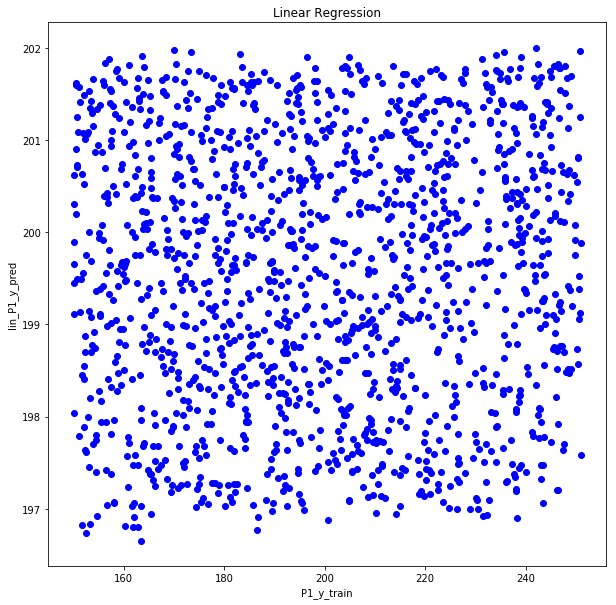

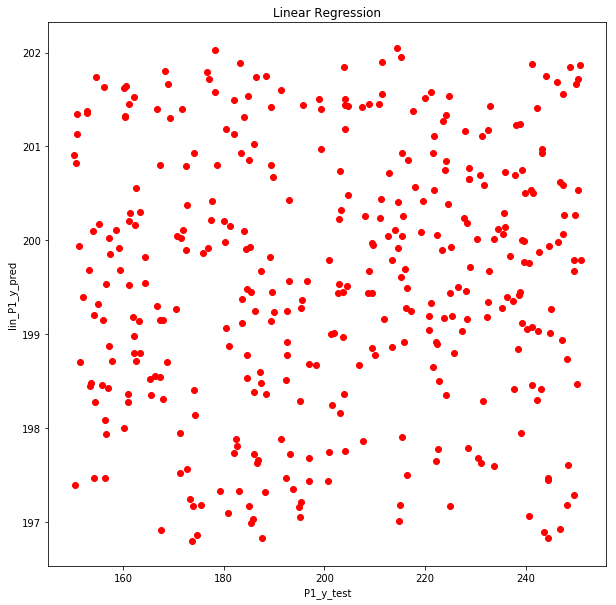

In [116]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P1_lin_regressor=LinearRegression()
P1_lin_regressor.fit(P1_x_train,P1_y_train)

lin_P1_y_pred=P1_lin_regressor.predict(P1_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P1_y_train, P1_lin_regressor.predict(P1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P1_y_train, P1_lin_regressor.predict(P1_x_train)))
print('R2 score = %.2f' %r2_score(P1_y_test, lin_P1_y_pred))
print('MSE = %.2f' %mean_squared_error(P1_y_test, lin_P1_y_pred))

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P1_y_train')
plt.ylabel('lin_P1_y_pred')
plt.scatter(P1_y_train,P1_lin_regressor.predict(P1_x_train), color='b')
plt.show() 


#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P1_y_test')
plt.ylabel('lin_P1_y_pred')
plt.scatter(P1_y_test,lin_P1_y_pred, color='r')
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.94
MSE = 1722.93


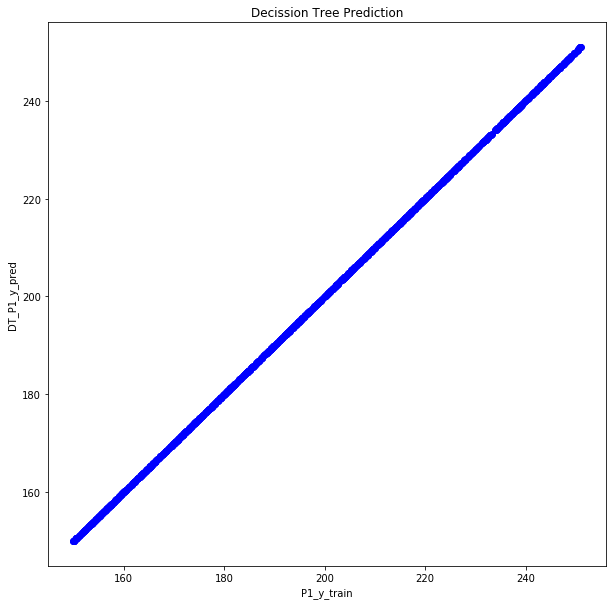

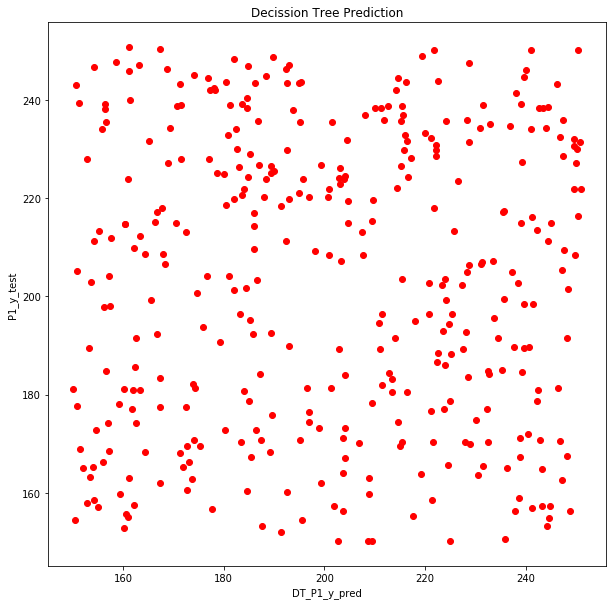

In [117]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P1_DT_regressor = DecisionTreeRegressor(random_state=0)
P1_DT_regressor.fit(P1_x_train,P1_y_train)

DT_P1_y_pred = P1_DT_regressor.predict(P1_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P1_y_train, P1_DT_regressor.predict(P1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P1_y_train, P1_DT_regressor.predict(P1_x_train)))
print('R2 score = %.2f' %r2_score(P1_y_test, DT_P1_y_pred))
print('MSE = %.2f' %mean_squared_error(P1_y_test, DT_P1_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('DT_P1_y_pred')
plt.xlabel('P1_y_train')
plt.scatter(P1_y_train,P1_DT_regressor.predict(P1_x_train), color='b')

plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('DT_P1_y_pred')
plt.ylabel('P1_y_test')
plt.scatter(P1_y_test,DT_P1_y_pred, color='r')

plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.81
MSE on train set= 158.59
R2 score = -0.45
MSE = 1287.29


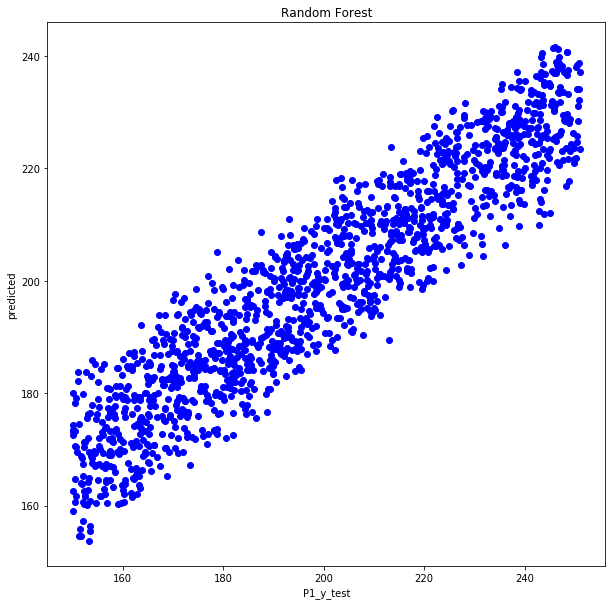

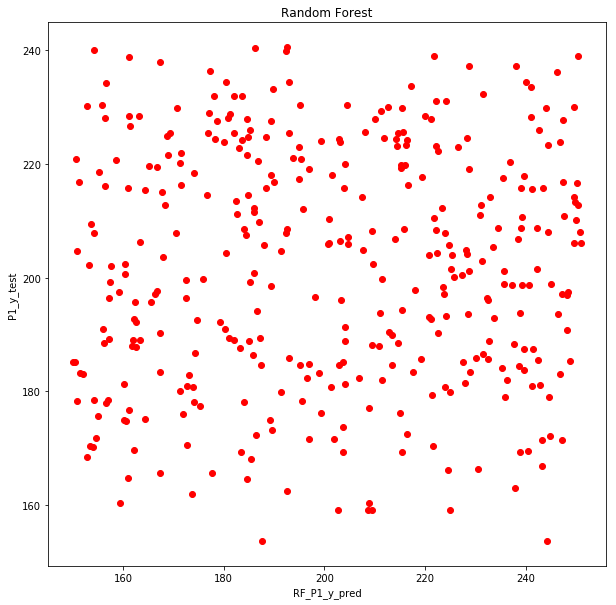

In [118]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P1_RF_regressor= RandomForestRegressor(n_estimators=300)
P1_RF_regressor.fit(P1_x_train,P1_y_train)

RF_P1_y_pred= P1_RF_regressor.predict(P1_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P1_y_train, P1_RF_regressor.predict(P1_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P1_y_train, P1_RF_regressor.predict(P1_x_train)))
print('R2 score = %.2f' %r2_score(P1_y_test, RF_P1_y_pred))
print('MSE = %.2f' %mean_squared_error(P1_y_test, RF_P1_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('predicted')
plt.xlabel('P1_y_test')
plt.scatter(P1_y_train,P1_RF_regressor.predict(P1_x_train), color='b')
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('RF_P1_y_pred')
plt.ylabel('P1_y_test')
plt.scatter(P1_y_test,P1_RF_regressor.predict(P1_x_test), color='r')
plt.show()


In [120]:
# Training for (-2,-1) voltages


# Creating Matrix of features and dependent variables
P2_x=np.log(abs(P2.iloc[:,P2.columns != 'p_thickness']  ))     
P2_y=P2.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P2_x_train, P2_x_test, P2_y_train, P2_y_test = train_test_split(P2_x,P2_y,test_size=0.2, random_state=0)



R2 score on train set= 0.04
MSE on train set= 784.19
R2 score = -0.00
MSE = 888.71


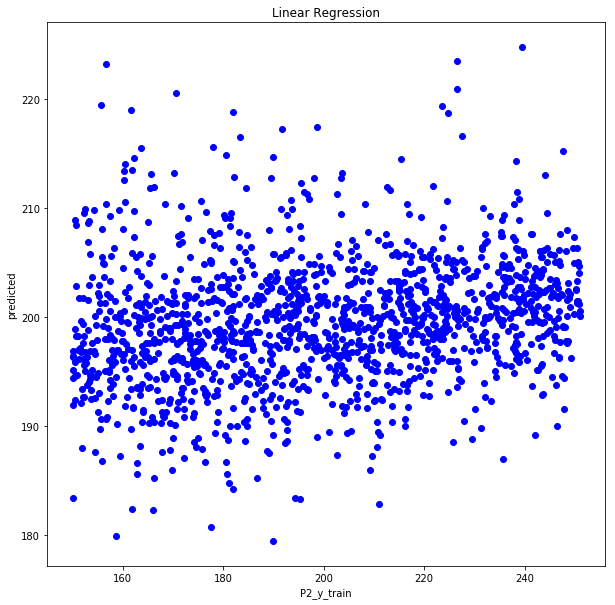

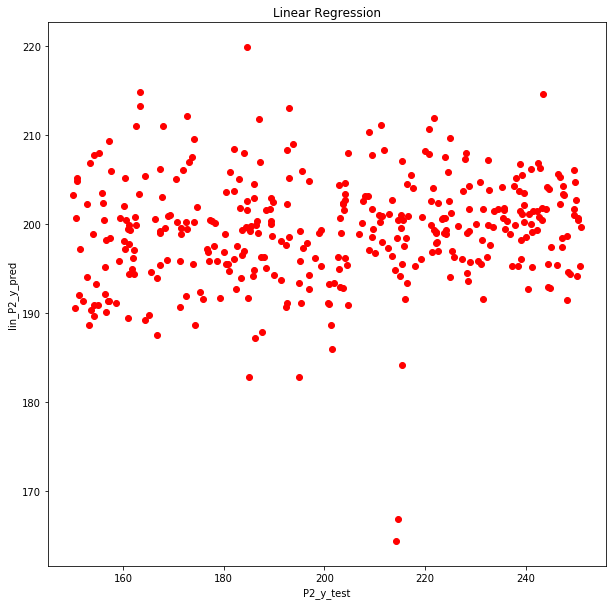

In [121]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P2_lin_regressor=LinearRegression()
P2_lin_regressor.fit(P2_x_train,P2_y_train)

lin_P2_y_pred=P2_lin_regressor.predict(P2_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P2_y_train, P2_lin_regressor.predict(P2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P2_y_train, P2_lin_regressor.predict(P2_x_train)))
print('R2 score = %.2f' %r2_score(P2_y_test, lin_P2_y_pred))
print('MSE = %.2f' %mean_squared_error(P2_y_test, lin_P2_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P2_y_train')
plt.ylabel('predicted')
plt.scatter(P2_y_train,P2_lin_regressor.predict(P2_x_train), color='b')
plt.show() 

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P2_y_test')
plt.ylabel('lin_P2_y_pred')
plt.scatter(P2_y_test,lin_P2_y_pred, color='r')
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.95
MSE = 1730.37


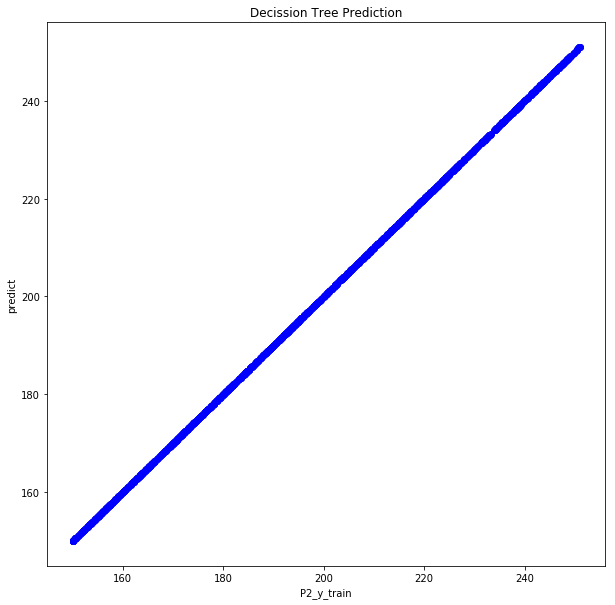

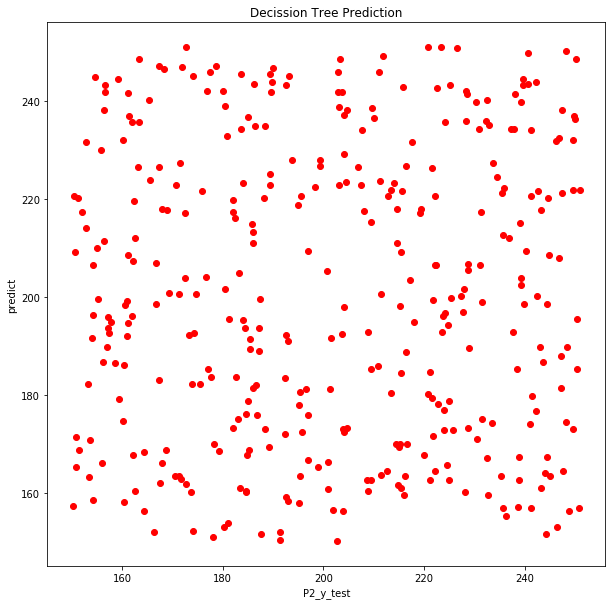

In [122]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P2_DT_regressor = DecisionTreeRegressor(random_state=0)
P2_DT_regressor.fit(P2_x_train,P2_y_train)

DT_P2_y_pred = P2_DT_regressor.predict(P2_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P2_y_train, P2_DT_regressor.predict(P2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P2_y_train, P2_DT_regressor.predict(P2_x_train)))
print('R2 score = %.2f' %r2_score(P2_y_test, DT_P2_y_pred))
print('MSE = %.2f' %mean_squared_error(P2_y_test, DT_P2_y_pred))


#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('predict')
plt.xlabel('P2_y_train')
plt.scatter(P2_y_train,P2_DT_regressor.predict(P2_x_train), color='b')

plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('predict')
plt.xlabel('P2_y_test')
plt.scatter(P2_y_test,P2_DT_regressor.predict(P2_x_test), color='r')

plt.show()




/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.84
MSE on train set= 128.82
R2 score = -0.10
MSE = 976.70


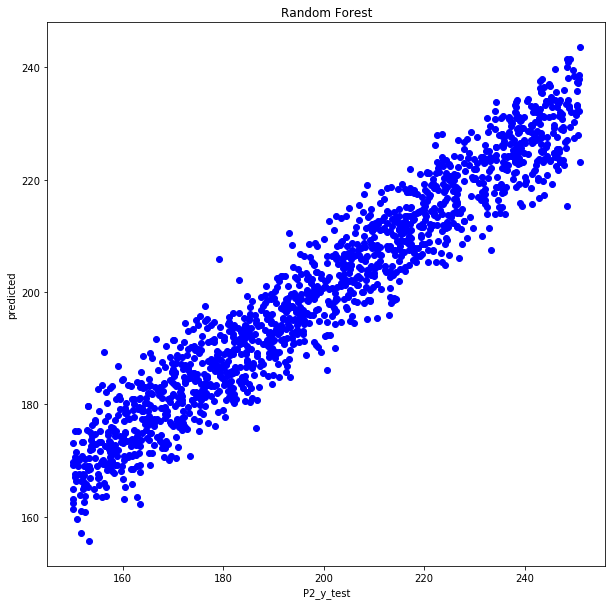

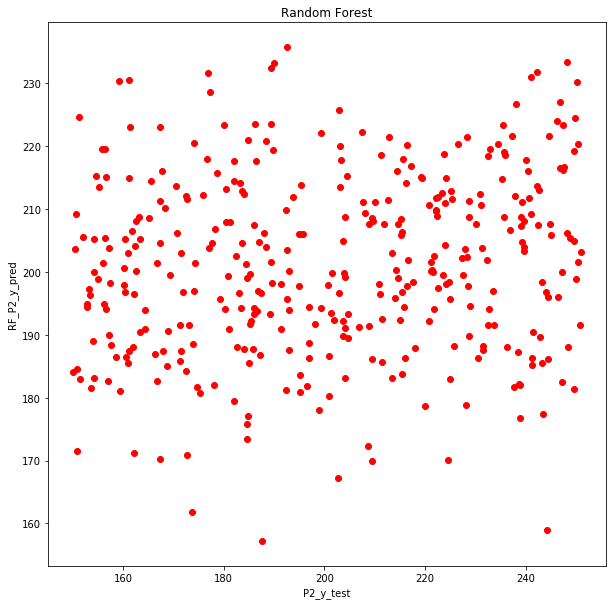

In [124]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P2_RF_regressor= RandomForestRegressor(n_estimators=300)
P2_RF_regressor.fit(P2_x_train,P2_y_train)

RF_P2_y_pred= P2_RF_regressor.predict(P2_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P2_y_train, P2_RF_regressor.predict(P2_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P2_y_train, P2_RF_regressor.predict(P2_x_train)))
print('R2 score = %.2f' %r2_score(P2_y_test, RF_P2_y_pred))
print('MSE = %.2f' %mean_squared_error(P2_y_test, RF_P2_y_pred))

#Plot train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('predicted')
plt.xlabel('P2_y_test')
plt.scatter(P2_y_train,P2_RF_regressor.predict(P2_x_train), color='b')
plt.show()

#Plot test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('RF_P2_y_pred')
plt.xlabel('P2_y_test')
plt.scatter(P2_y_test,P2_RF_regressor.predict(P2_x_test), color='r')
plt.show()


In [125]:
# Training for (-1,0) voltages


# Creating Matrix of features and dependent variables
P3_x=np.log(abs(P3.iloc[:,P3.columns != 'p_thickness'])) 
P3_y=P3.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P3_x_train, P3_x_test, P3_y_train, P3_y_test = train_test_split(P3_x,P3_y,test_size=0.2, random_state=0)



R2 score on train set= 0.03
MSE on train set= 791.87
R2 score = 0.01
MSE = 880.91


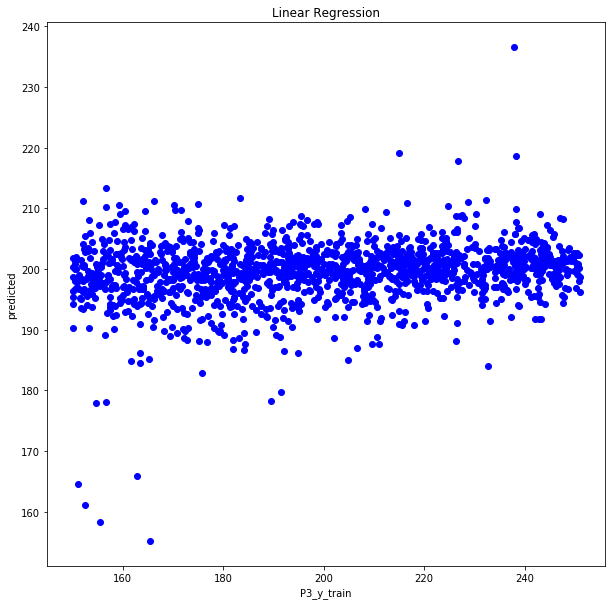

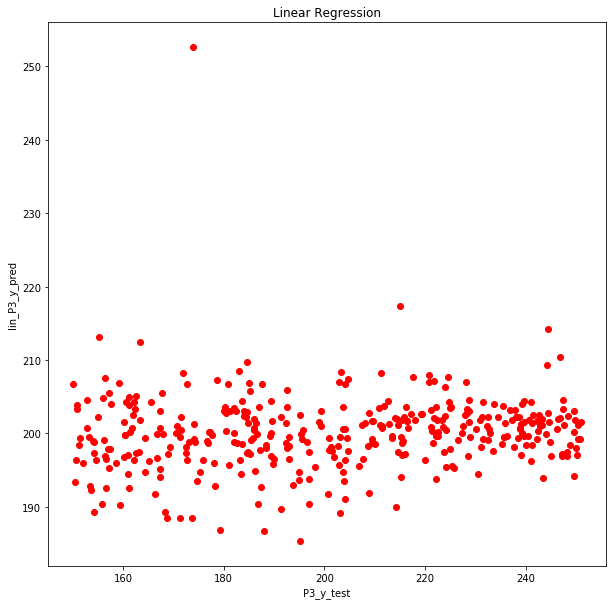

In [126]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P3_lin_regressor=LinearRegression()
P3_lin_regressor.fit(P3_x_train,P3_y_train)

lin_P3_y_pred=P3_lin_regressor.predict(P3_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P3_y_train, P3_lin_regressor.predict(P3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P3_y_train, P3_lin_regressor.predict(P3_x_train)))
print('R2 score = %.2f' %r2_score(P3_y_test, lin_P3_y_pred))
print('MSE = %.2f' %mean_squared_error(P3_y_test, lin_P3_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P3_y_train')
plt.ylabel('predicted')
plt.scatter(P3_y_train,P3_lin_regressor.predict(P3_x_train), color='b')
plt.show() 

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P3_y_test')
plt.ylabel('lin_P3_y_pred')
plt.scatter(P3_y_test,lin_P3_y_pred, color='r')
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.80
MSE = 1596.13


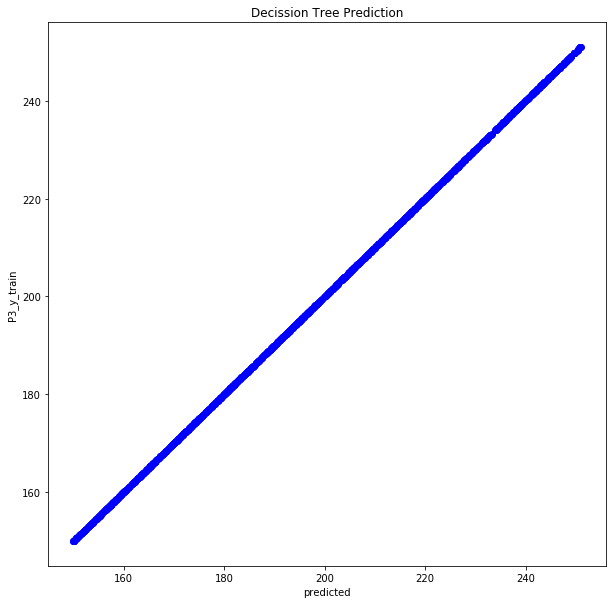

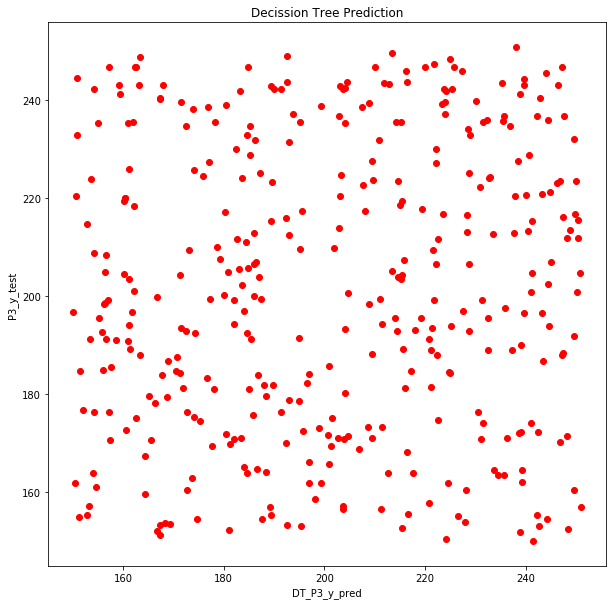

In [127]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P3_DT_regressor = DecisionTreeRegressor(random_state=0)
P3_DT_regressor.fit(P3_x_train,P3_y_train)

DT_P3_y_pred = P3_DT_regressor.predict(P3_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P3_y_train, P3_DT_regressor.predict(P3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P3_y_train, P3_DT_regressor.predict(P3_x_train)))
print('R2 score = %.2f' %r2_score(P3_y_test, DT_P3_y_pred))
print('MSE = %.2f' %mean_squared_error(P3_y_test, DT_P3_y_pred))


#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('predicted')
plt.ylabel('P3_y_train')
plt.scatter(P3_y_train,P3_DT_regressor.predict(P3_x_train), color='b')

plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('DT_P3_y_pred')
plt.ylabel('P3_y_test')
plt.scatter(P3_y_test,DT_P3_y_pred, color='r')

plt.show()





/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.86
MSE on train set= 116.42
R2 score = -0.08
MSE = 961.93


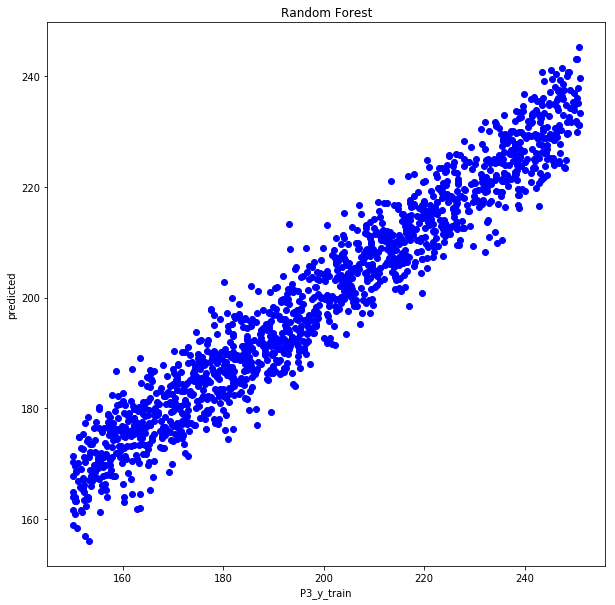

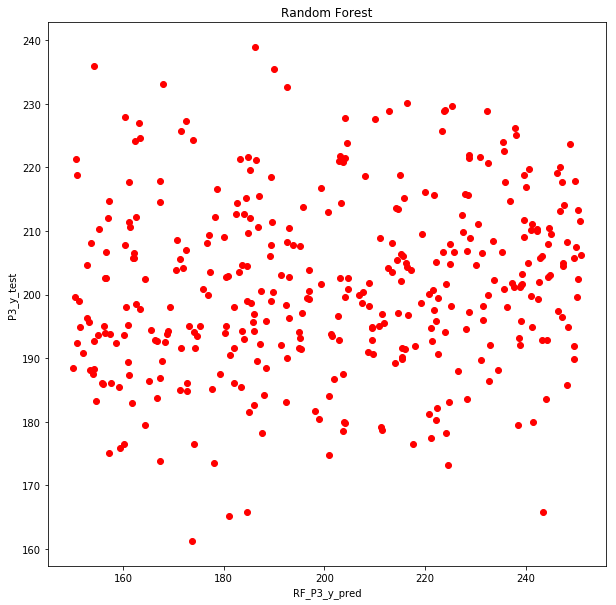

In [128]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P3_RF_regressor= RandomForestRegressor(n_estimators=300)
P3_RF_regressor.fit(P3_x_train,P3_y_train)

RF_P3_y_pred= P3_RF_regressor.predict(P3_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P3_y_train, P3_RF_regressor.predict(P3_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P3_y_train, P3_RF_regressor.predict(P3_x_train)))
print('R2 score = %.2f' %r2_score(P3_y_test, RF_P3_y_pred))
print('MSE = %.2f' %mean_squared_error(P3_y_test, RF_P3_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('predicted')
plt.xlabel('P3_y_train')
plt.scatter(P3_y_train,P3_RF_regressor.predict(P3_x_train), color='b')
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('RF_P3_y_pred')
plt.ylabel('P3_y_test')
plt.scatter(P3_y_test,P3_RF_regressor.predict(P3_x_test), color='r')
plt.show()

In [129]:
# Training for (-2,0) voltages


# Creating Matrix of features and dependent variables
P4_x=np.log(abs(P4.iloc[:,P4.columns != 'p_thickness'])) 
P4_y=P4.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P4_x_train, P4_x_test, P4_y_train, P4_y_test = train_test_split(P4_x,P4_y,test_size=0.2, random_state=0)



R2 score on train set= 0.07
MSE on train set= 761.22
R2 score = -0.00
MSE = 891.10


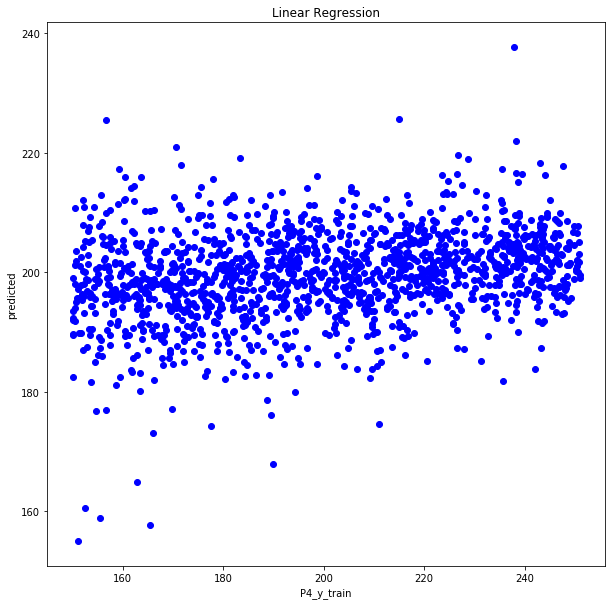

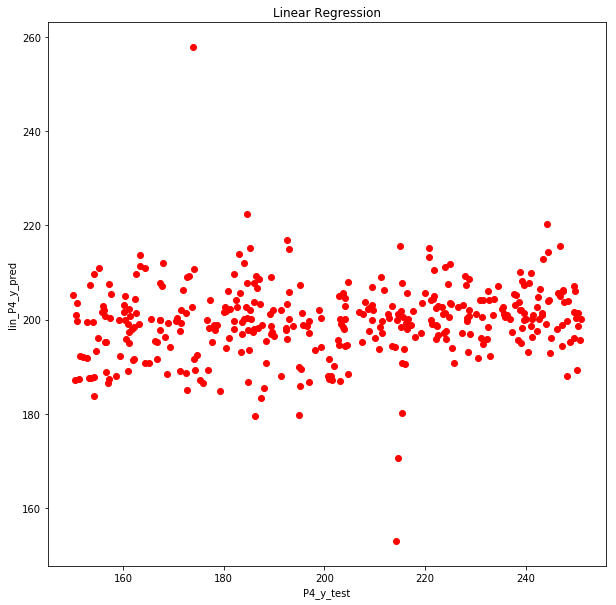

In [130]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P4_lin_regressor=LinearRegression()
P4_lin_regressor.fit(P4_x_train,P4_y_train)

lin_P4_y_pred=P4_lin_regressor.predict(P4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P4_y_train, P4_lin_regressor.predict(P4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P4_y_train, P4_lin_regressor.predict(P4_x_train)))
print('R2 score = %.2f' %r2_score(P4_y_test, lin_P4_y_pred))
print('MSE = %.2f' %mean_squared_error(P4_y_test, lin_P4_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P4_y_train')
plt.ylabel('predicted')
plt.scatter(P4_y_train,P4_lin_regressor.predict(P4_x_train), color='b')
plt.show() 
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P4_y_test')
plt.ylabel('lin_P4_y_pred')
plt.scatter(P4_y_test,lin_P4_y_pred, color='r')
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = -0.46
MSE = 1297.23


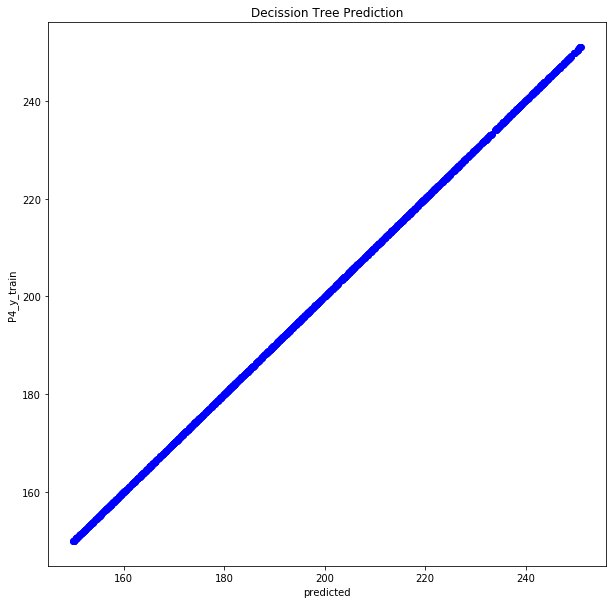

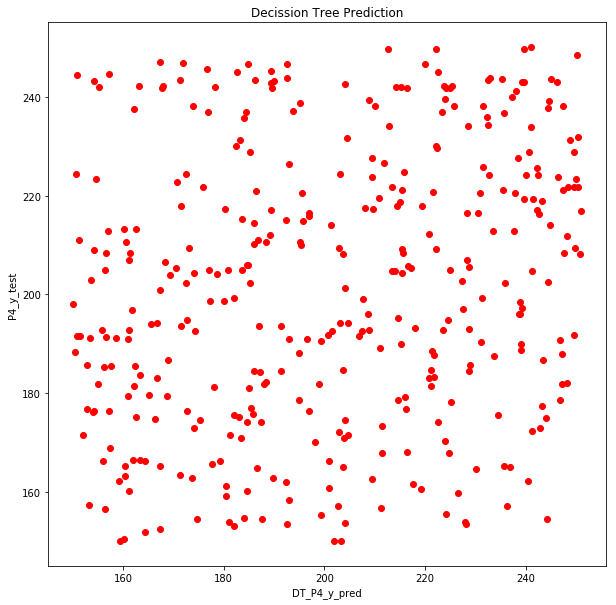

In [131]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P4_DT_regressor = DecisionTreeRegressor(random_state=0)
P4_DT_regressor.fit(P4_x_train,P4_y_train)

DT_P4_y_pred = P4_DT_regressor.predict(P4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P4_y_train, P4_DT_regressor.predict(P4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P4_y_train, P4_DT_regressor.predict(P4_x_train)))
print('R2 score = %.2f' %r2_score(P4_y_test, DT_P4_y_pred))
print('MSE = %.2f' %mean_squared_error(P4_y_test, DT_P4_y_pred))

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('predicted')
plt.ylabel('P4_y_train')
plt.scatter(P4_y_train,P4_DT_regressor.predict(P4_x_train), color='b')

plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('DT_P4_y_pred')
plt.ylabel('P4_y_test')
plt.scatter(P4_y_test,DT_P4_y_pred, color='r')

plt.show()




/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.86
MSE on train set= 110.90
R2 score = -0.03
MSE = 912.89


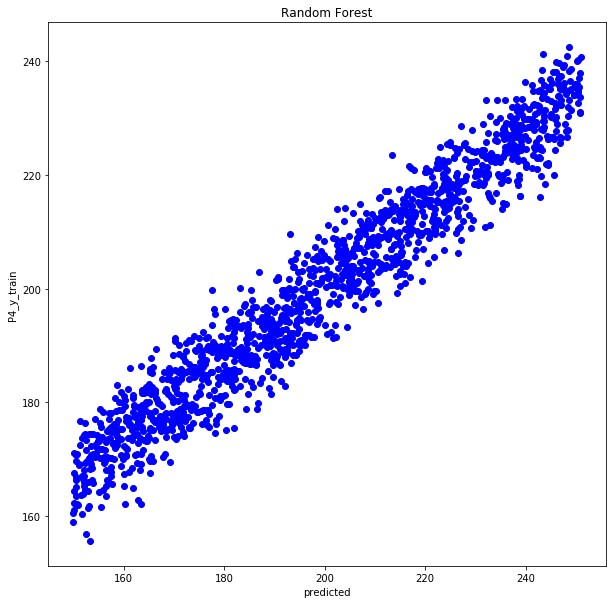

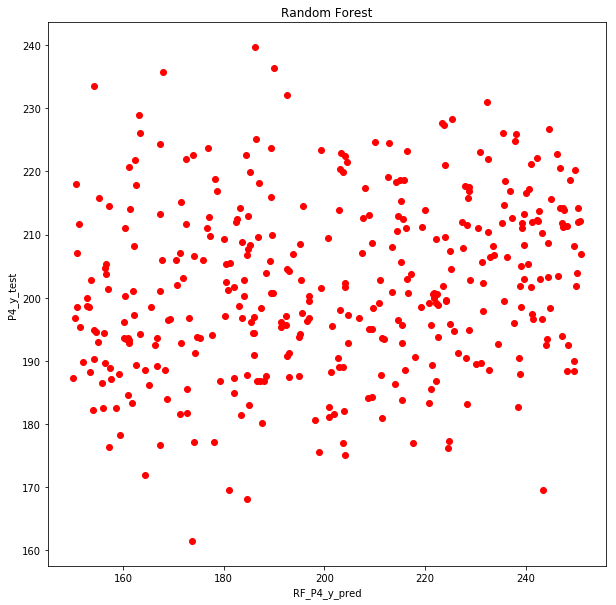

In [132]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P4_RF_regressor= RandomForestRegressor(n_estimators=300)
P4_RF_regressor.fit(P4_x_train,P4_y_train)

RF_P4_y_pred= P4_RF_regressor.predict(P4_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P4_y_train, P4_RF_regressor.predict(P4_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P4_y_train, P4_RF_regressor.predict(P4_x_train)))
print('R2 score = %.2f' %r2_score(P4_y_test, RF_P4_y_pred))
print('MSE = %.2f' %mean_squared_error(P4_y_test, RF_P4_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('predicted')
plt.ylabel('P4_y_train')
plt.scatter(P4_y_train,P4_RF_regressor.predict(P4_x_train), color='b')
plt.show()
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('RF_P4_y_pred')
plt.ylabel('P4_y_test')
plt.scatter(P4_y_test,P4_RF_regressor.predict(P4_x_test), color='r')
plt.show()


In [133]:

# Training for (0,1) voltages


# Creating Matrix of features and dependent variables
P5_x=np.log(abs(P5.iloc[:,P5.columns != 'p_thickness'])) 
P5_y=P5.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P5_x_train, P5_x_test, P5_y_train, P5_y_test = train_test_split(P5_x,P5_y,test_size=0.2, random_state=0)



R2 score on train set= 0.82
MSE on train set= 147.41
R2 score = 0.87
MSE = 118.98


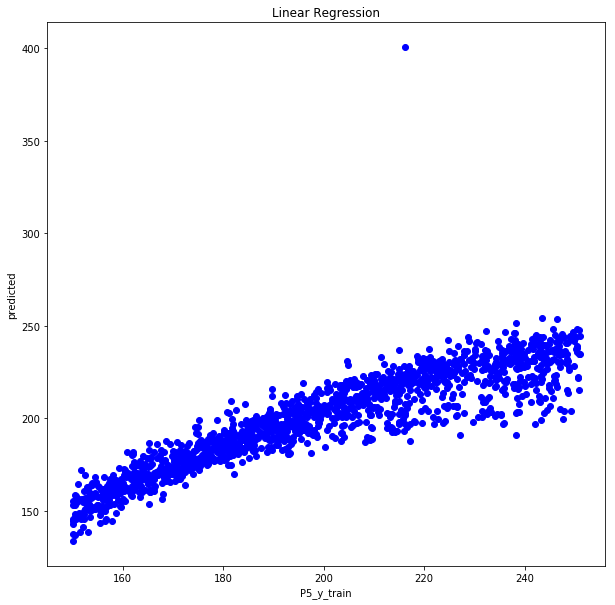

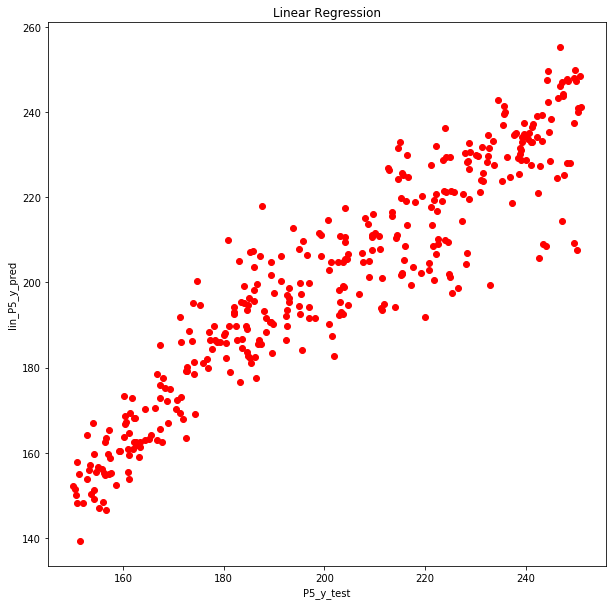

In [134]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P5_lin_regressor=LinearRegression()
P5_lin_regressor.fit(P5_x_train,P5_y_train)
lin_P5_y_pred=P5_lin_regressor.predict(P5_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P5_y_train, P5_lin_regressor.predict(P5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P5_y_train, P5_lin_regressor.predict(P5_x_train)))
print('R2 score = %.2f' %r2_score(P5_y_test, lin_P5_y_pred))
print('MSE = %.2f' %mean_squared_error(P5_y_test, lin_P5_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P5_y_train')
plt.ylabel('predicted')
plt.scatter(P5_y_train,P5_lin_regressor.predict(P5_x_train), color='b')
plt.show() 
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P5_y_test')
plt.ylabel('lin_P5_y_pred')
plt.scatter(P5_y_test,lin_P5_y_pred, color='r')
plt.show() 

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.68
MSE = 282.89


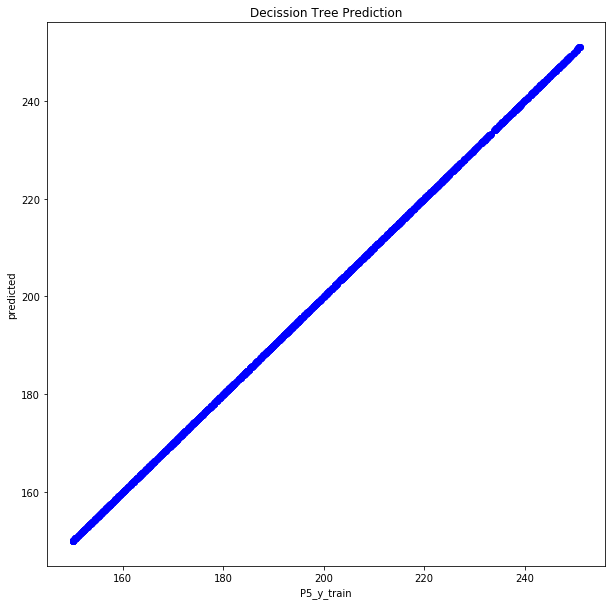

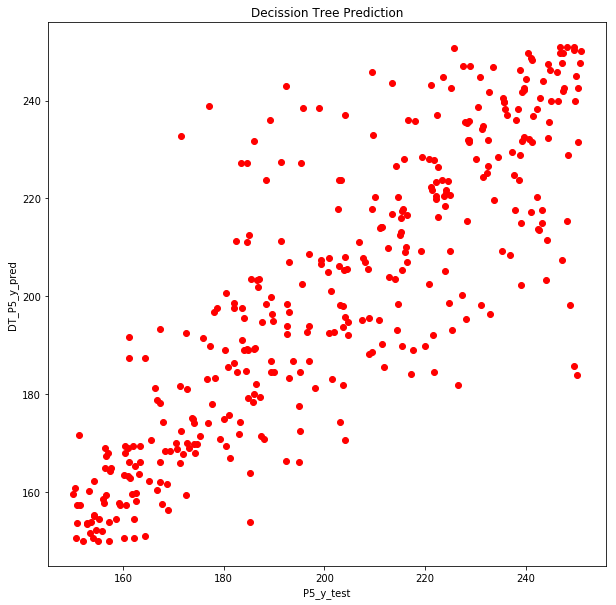

In [135]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P5_DT_regressor = DecisionTreeRegressor(random_state=0)
P5_DT_regressor.fit(P5_x_train,P5_y_train)

DT_P5_y_pred = P5_DT_regressor.predict(P5_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P5_y_train, P5_DT_regressor.predict(P5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P5_y_train, P5_DT_regressor.predict(P5_x_train)))
print('R2 score = %.2f' %r2_score(P5_y_test, DT_P5_y_pred))
print('MSE = %.2f' %mean_squared_error(P5_y_test, DT_P5_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('predicted')
plt.xlabel('P5_y_train')
plt.scatter(P5_y_train,P5_DT_regressor.predict(P5_x_train), color='b')

plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('DT_P5_y_pred')
plt.xlabel('P5_y_test')
plt.scatter(P5_y_test,DT_P5_y_pred, color='r')

plt.show()




/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.97
MSE on train set= 23.18
R2 score = 0.81
MSE = 167.11


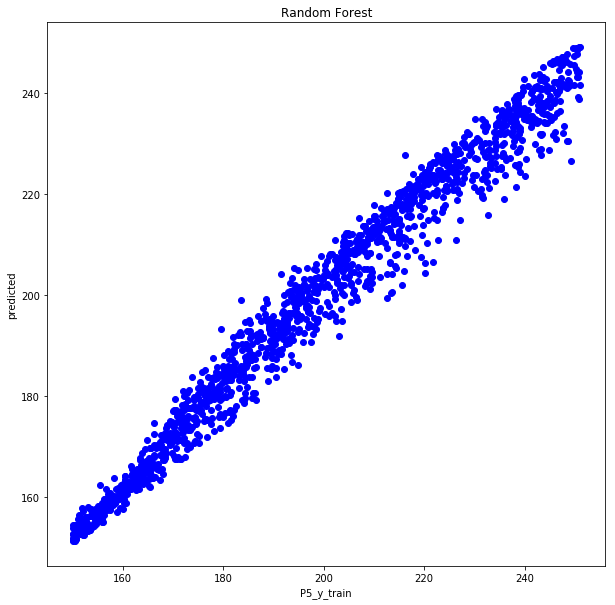

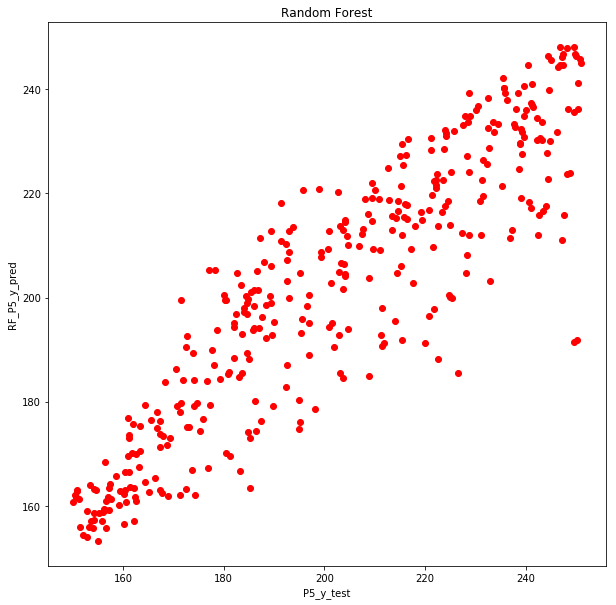

In [136]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P5_RF_regressor= RandomForestRegressor(n_estimators=300)
P5_RF_regressor.fit(P5_x_train,P5_y_train)

RF_P5_y_pred= P5_RF_regressor.predict(P5_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P5_y_train, P5_RF_regressor.predict(P5_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P5_y_train, P5_RF_regressor.predict(P5_x_train)))
print('R2 score = %.2f' %r2_score(P5_y_test, RF_P5_y_pred))
print('MSE = %.2f' %mean_squared_error(P5_y_test, RF_P5_y_pred))
#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('predicted')
plt.xlabel('P5_y_train')
plt.scatter(P5_y_train,P5_RF_regressor.predict(P5_x_train), color='b')
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('RF_P5_y_pred')
plt.xlabel('P5_y_test')
plt.scatter(P5_y_test,P5_RF_regressor.predict(P5_x_test), color='r')
plt.show()

In [110]:
# Training for (1,2) voltages

# Creating Matrix of features and dependent variables
P6_x=P6.iloc[:,P6.columns != 'p_thickness']
P6_y=P6.iloc[:,-1:].values # Including the thickness values.

# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P6_x_train, P6_x_test, P6_y_train, P6_y_test = train_test_split(P6_x,P6_y,test_size=0.2, random_state=0)



R2 score on train set= 1.00
MSE on train set= 1.77
R2 score = -332.50
MSE = 291482.18


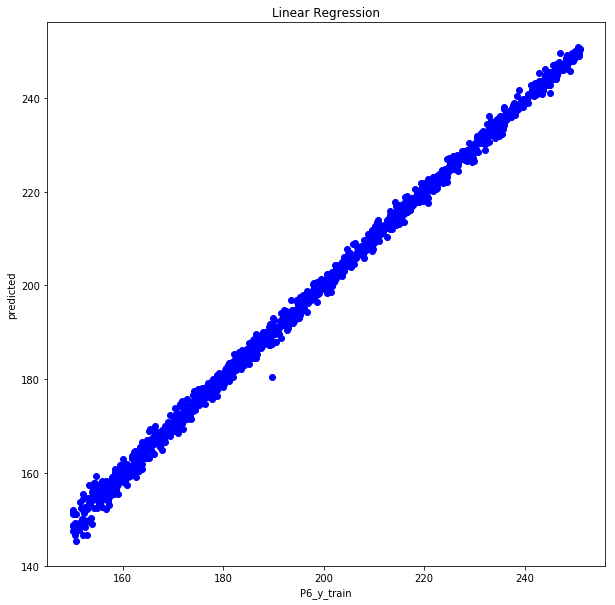

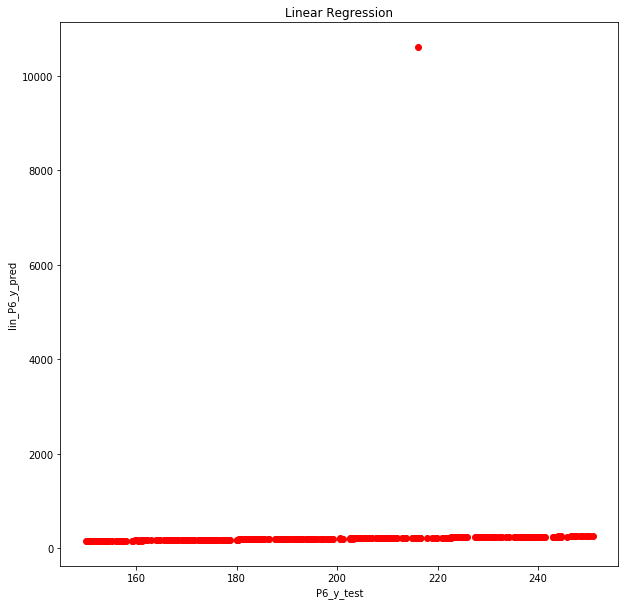

In [111]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P6_lin_regressor=LinearRegression()
P6_lin_regressor.fit(P6_x_train,P6_y_train)

lin_P6_y_pred=P6_lin_regressor.predict(P6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P6_y_train, P6_lin_regressor.predict(P6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P6_y_train, P6_lin_regressor.predict(P6_x_train)))
print('R2 score = %.2f' %r2_score(P6_y_test, lin_P6_y_pred))
print('MSE = %.2f' %mean_squared_error(P6_y_test, lin_P6_y_pred))

import matplotlib.pyplot as plt

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P6_y_train')
plt.ylabel('predicted')
plt.scatter(P6_y_train,P6_lin_regressor.predict(P6_x_train), color='b')
plt.show() 
#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P6_y_test')
plt.ylabel('lin_P6_y_pred')
plt.scatter(P6_y_test,lin_P6_y_pred, color='r')
plt.show() 




R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.68
MSE = 282.12


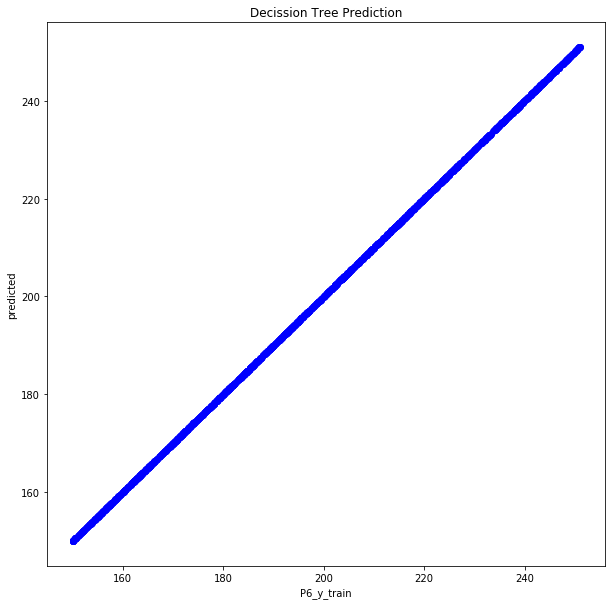

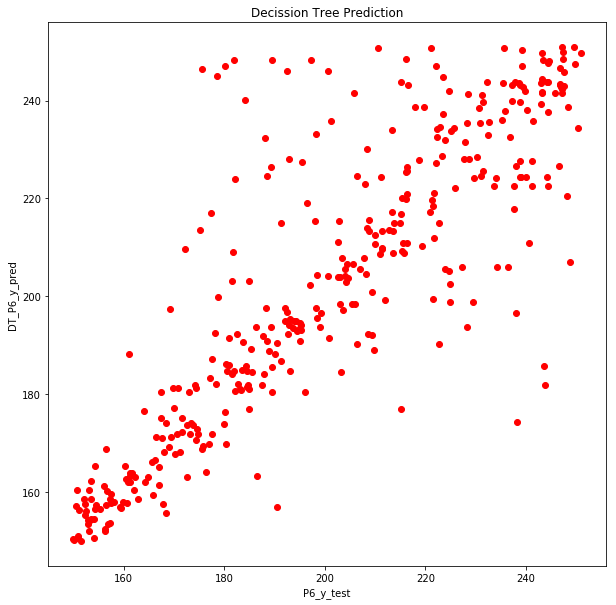

In [112]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
P6_DT_regressor = DecisionTreeRegressor(random_state=0)
P6_DT_regressor.fit(P6_x_train,P6_y_train)

DT_P6_y_pred = P6_DT_regressor.predict(P6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P6_y_train, P6_DT_regressor.predict(P6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P6_y_train, P6_DT_regressor.predict(P6_x_train)))
print('R2 score = %.2f' %r2_score(P6_y_test, DT_P6_y_pred))
print('MSE = %.2f' %mean_squared_error(P6_y_test, DT_P6_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('predicted')
plt.xlabel('P6_y_train')
plt.scatter(P6_y_train,P6_DT_regressor.predict(P6_x_train), color='b')

plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.ylabel('DT_P6_y_pred')
plt.xlabel('P6_y_test')
plt.scatter(P6_y_test,DT_P6_y_pred, color='r')

plt.show()



/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.98
MSE on train set= 19.13
R2 score = 0.83
MSE = 145.18


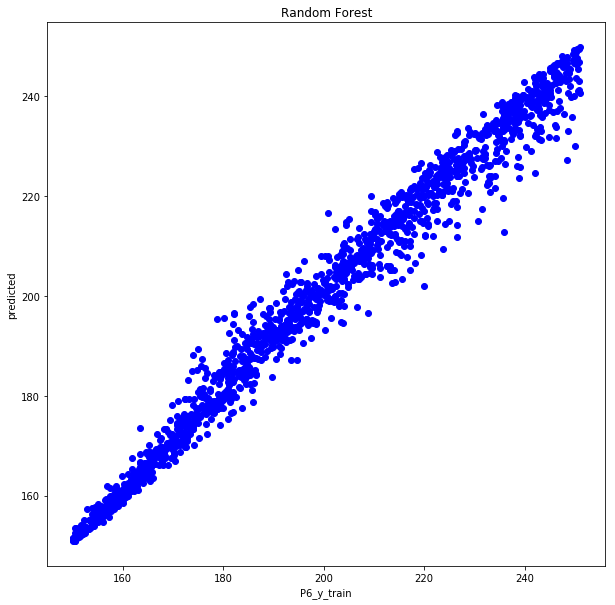

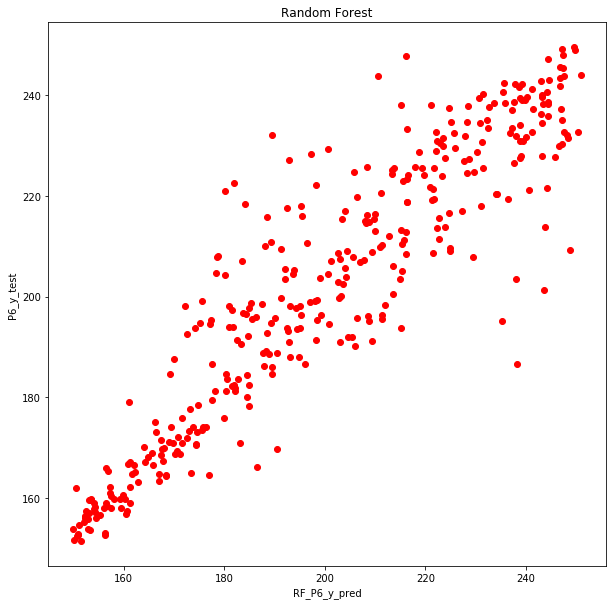

In [114]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P6_RF_regressor= RandomForestRegressor(n_estimators=300)
P6_RF_regressor.fit(P6_x_train,P6_y_train)

RF_P6_y_pred= P6_RF_regressor.predict(P6_x_test)

# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P6_y_train, P6_RF_regressor.predict(P6_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P6_y_train, P6_RF_regressor.predict(P6_x_train)))
print('R2 score = %.2f' %r2_score(P6_y_test, RF_P6_y_pred))
print('MSE = %.2f' %mean_squared_error(P6_y_test, RF_P6_y_pred))

#Plot for train set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.ylabel('predicted')
plt.xlabel('P6_y_train')
plt.scatter(P6_y_train,P6_RF_regressor.predict(P6_x_train), color='b')
plt.show()

#Plot for test set
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('RF_P6_y_pred')
plt.ylabel('P6_y_test')
plt.scatter(P6_y_test,P6_RF_regressor.predict(P6_x_test), color='r')

plt.show()



In [115]:
# Creating Matrix of features and dependent variables
P7_x=P7.iloc[:,P7.columns != 'p_thickness']
P7_y=P7.iloc[:,-1:]# only the thickness values.
# Splitting the s1 data into training set and test set
from sklearn.model_selection import train_test_split
P7_x_train, P7_x_test, P7_y_train, P7_y_test = train_test_split(P7_x,P7_y,test_size=0.2, random_state=0)

R2 score on train set= 1.00
MSE on train set= 1.77
R2 score = -332.50
MSE = 291482.18


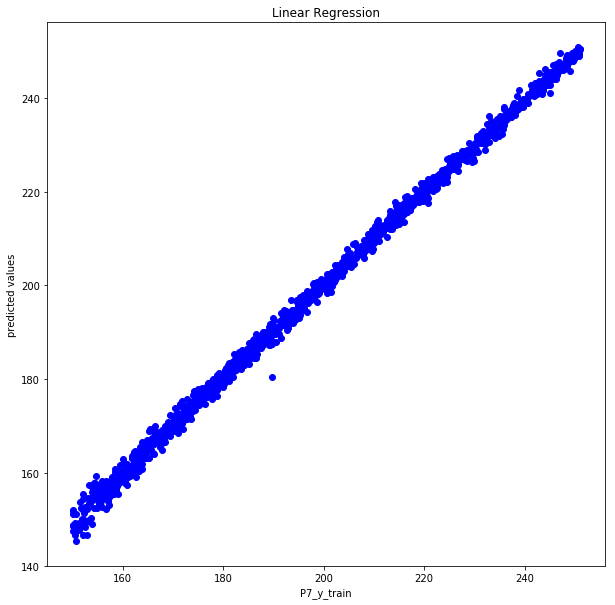

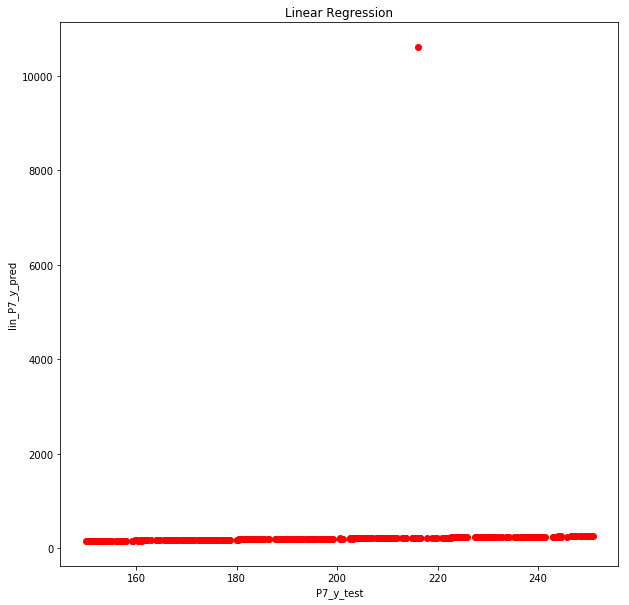

In [116]:
#Linear Regression
from sklearn.linear_model import LinearRegression
P7_lin_regressor=LinearRegression()
P7_lin_regressor.fit(P7_x_train,P7_y_train)
#Predicting y_test
lin_P7_y_pred=P7_lin_regressor.predict(P7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P7_y_train, P7_lin_regressor.predict(P7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P7_y_train, P7_lin_regressor.predict(P7_x_train)))
print('R2 score = %.2f' %r2_score(P7_y_test, lin_P7_y_pred))
print('MSE = %.2f' %mean_squared_error(P7_y_test, lin_P7_y_pred))
# Plot for training set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P7_y_train')
plt.ylabel('predicted values')
plt.scatter(P7_y_train,P7_lin_regressor.predict(P7_x_train), color='b')
plt.show()
# Plot for test set
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Linear Regression')
plt.xlabel('P7_y_test')
plt.ylabel('lin_P7_y_pred')
plt.scatter(P7_y_test,lin_P7_y_pred, color='r')
plt.show()

R2 score on train set= 1.00
MSE on train set= 0.00
R2 score = 0.68
MSE = 282.12


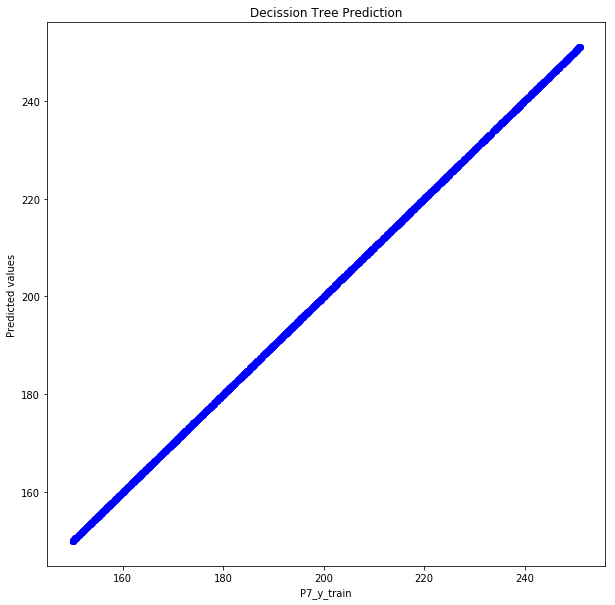

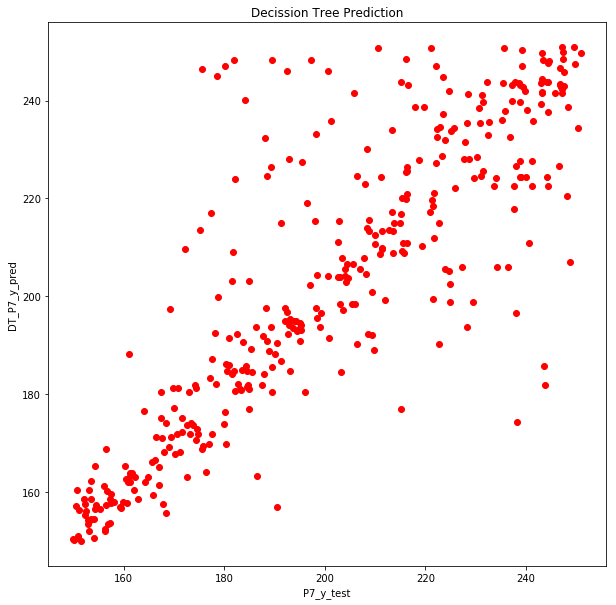

In [117]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
P7_DT_regressor = DecisionTreeRegressor(random_state=0)
P7_DT_regressor.fit(P7_x_train,P7_y_train)
#prdicting y_test
DT_P7_y_pred = P7_DT_regressor.predict(P7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P7_y_train, P7_DT_regressor.predict(P7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P7_y_train, P7_DT_regressor.predict(P7_x_train)))
print('R2 score = %.2f' %r2_score(P7_y_test, DT_P7_y_pred))
print('MSE = %.2f' %mean_squared_error(P7_y_test, DT_P7_y_pred))
#Plot for training results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('P7_y_train')
plt.ylabel('Predicted values')
plt.scatter(P7_y_train,P7_DT_regressor.predict(P7_x_train), color='b')
plt.show()
#Plot for test results.
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Decission Tree Prediction')
plt.xlabel('P7_y_test')
plt.ylabel('DT_P7_y_pred')
plt.scatter(P7_y_test,DT_P7_y_pred, color='r')
plt.show()

/home/012431692/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


R2 score on train set= 0.98
MSE on train set= 18.86
R2 score = 0.83
MSE = 152.77


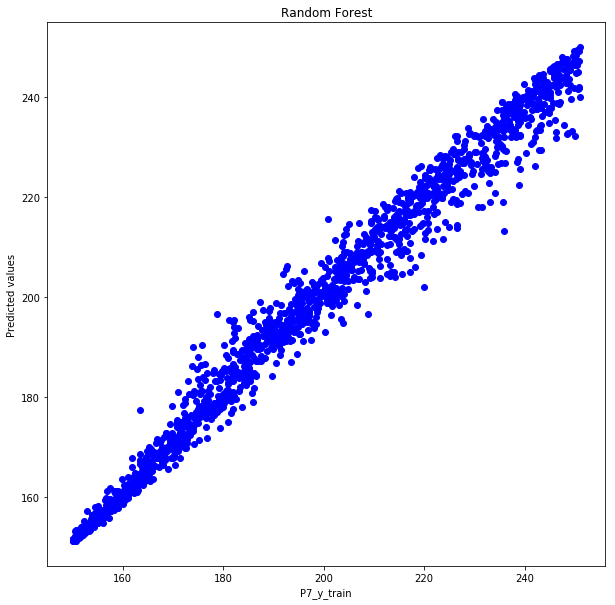

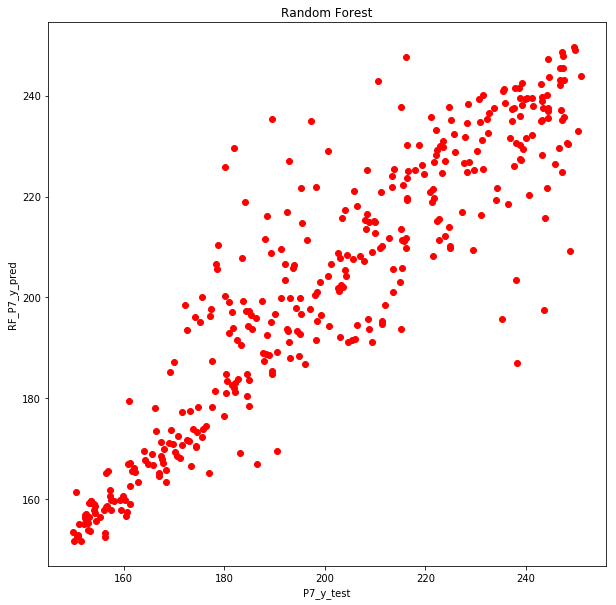

In [118]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
P7_RF_regressor= RandomForestRegressor(n_estimators=300)
P7_RF_regressor.fit(P7_x_train,P7_y_train)
#predicting y_test
RF_P7_y_pred= P7_RF_regressor.predict(P7_x_test)
# Metrics
from sklearn.metrics import mean_squared_error, r2_score
print('R2 score on train set= %.2f' %r2_score(P7_y_train, P7_RF_regressor.predict(P7_x_train)))
print('MSE on train set= %.2f' %mean_squared_error(P7_y_train, P7_RF_regressor.predict(P7_x_train)))
print('R2 score = %.2f' %r2_score(P7_y_test, RF_P7_y_pred))
print('MSE = %.2f' %mean_squared_error(P7_y_test, RF_P7_y_pred))
#Plot for train results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('P7_y_train')
plt.ylabel('Predicted values')
plt.scatter(P7_y_train,P7_RF_regressor.predict(P7_x_train), color='b')
plt.show()
#Plot for test results
fig=plt.figure(figsize=(10,10)) #For larger graph
plt.title('Random Forest')
plt.xlabel('P7_y_test')
plt.ylabel('RF_P7_y_pred')
plt.scatter(P7_y_test,P7_RF_regressor.predict(P7_x_test), color='r')
plt.show()

AttributeError: 'function' object has no attribute 'ravel'

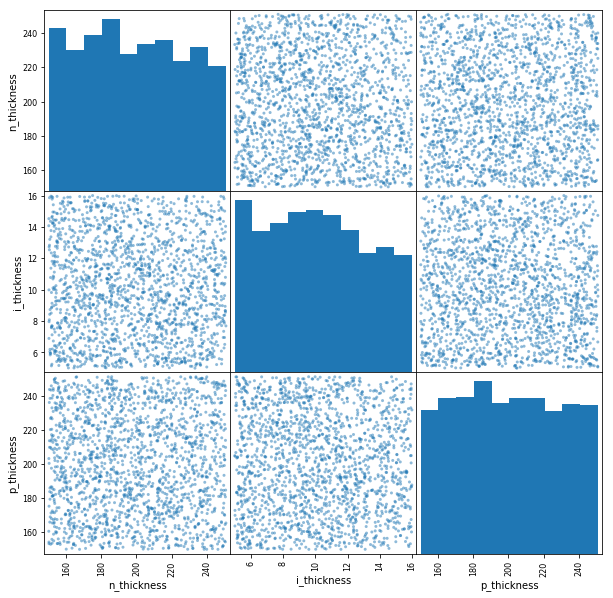

In [154]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset[['n_thickness','i_thickness','p_thickness']], figsize=(10,10))
for x in scatter_matrix.ravel():
    x.set_xlabel(ax.get_xlabel(), fontsize=10, rotation= 90)
    x.set_ylabel(ax.get_ylabel(), fontsize=10, rotation= 0)
plt.show()